In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import warnings; warnings.simplefilter('ignore')

# User Instructions
- There are provided functions that have been designed to increase the usability and functionality of the notebook
- The majority of data cleaning can be done using only the provided functions
- The user should use code cells under **'User Space'** to execute code
- There is **'SYSTEM CODE'** that will guide the parts of data analysis process and is provided for convenience in the 'User Space'
    - can be changed by user
- There is a sample dataset that is provided with it's analysis to show how the notebook should be used
- A version of the dataframe that is worked on thoughout the notebook is saved after each section (ex. reset_23)

### The sample dataset contains data from 2014 annual financial statements and financial indicators
- The second to last column contains the percent increase or decrease in price the following year
- The last column categorizes the stocks by whether the price went up or down the following year (0 for down and 1 for up)
- The first column contains the stock ticker symbol

# Table of Contents
1. [Data Gathering](#1)
2. [Data Cleaning](#2)  
    i.   [Rename Columns](#2.1)  
    ii.  [Change Datatypes](#2.2)  
    iii. [Remove Duplicate Values](#2.3)  
    iv.  [Handle Outliers](#2.4)  
    v.   [Handle Null Values](#2.5)  
    vi.  [Other](#2.6)  
3. [EDA](#3)   
4. [Analysis](#4)   
    i.  [Scale to Feature](#4.1)      
    ii. [Sector Analysis](#4.2)   
5. [Report](#5)

<a id=1></a>
# Data Gathering 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def read_file(file):
    '''Reads csv file then assigns it to global variable df.'''
    global df
    df = pd.read_csv(file)

### _**User Space**_

In [6]:
read_file('2014_Financial_Data.csv')

In [7]:
# SYSTEM CODE
reset_1 = df.copy()

<a id=2></a>
# Data Cleaning
### Basic Cleaning Operations 
1. renaming columns
2. changing datatypes
3. removing duplicate values 
4. handling outliers
5. filling in or removing null values
6. other less common tasks

### _User Space_

In [8]:
# SYSTEM CODE
rows, columns = df.shape
print(f'{rows} rows \n{columns} columns')

3808 rows 
225 columns


In [9]:
# displays all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
# SYSTEM CODE 
df.head()

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1       VIPS  3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
2         KR  9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
3        RAD  2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
4        GIS  1.790960e+10          0.0076     1.153980e+10  6.369800e+09   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0  0.000000e+00  2.146100e+10        2.146100e+10      1.391000e+10   
1  1.083303e+08  3.441414e+08        7.939267e+08      1.345959e+08   
2  0.000000e+00  1.519600e+10        1.751200e+10      2.725000e+09   
3  0.000000e+00  6.561162e+09        6.586482e+09      7.372520e+08   
4  0.000000e+00  3.474300e+09        3.412400e+09      2.957400e+09   

   Interest Expense  Earnings before Tax  Income Tax Expense  \
0      7.090000e+08         1.449400e+10        2.851000e+09   
1      1.214869e+07         1.753823e+08        3.955957e+07   
2      4.430000e+08         2.270000e+09        7.510000e+08   
3      4.245910e+08         2.502180e+08        8.040000e+05   
4      3.024000e+08         2.707700e+09        8.833000e+08   

   Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                      1.420000e+08                  -1.127000e+09   
1                     -1.431918e+07                   0.000000e+00   
2                      1.200000e+07                   0.000000e+00   
3                      0.000000e+00                   0.000000e+00   
4                      3.690000e+07                   0.000000e+00   

     Net Income  Preferred Dividends  Net Income Com     EPS  EPS Diluted  \
0  1.164300e+10                  0.0    1.164300e+10  4.1900        4.010   
1  1.358227e+08                  0.0    1.358227e+08  0.2396        0.226   
2  1.519000e+09                  0.0    1.519000e+09  1.4700        1.450   
3  2.494140e+08           33998000.0    2.154160e+08  4.6000        4.600   
4  1.824400e+09                  0.0    1.824400e+09  2.9000        2.830   

   Weighted Average Shs Out  Weighted Average Shs Out (Dil)  \
0              2.705960e+09                    2.705960e+09   
1                       NaN                    1.829362e+07   
2              1.033053e+09                    1.028000e+09   
3              4.832628e+07                    4.832628e+07   
4              6.144922e+08                    6.144922e+08   

   Dividend per Share  Gross Margin  EBITDA Margin  EBIT Margin  \
0               2.448        0.4754         0.2470       0.2043   
1               0.000        0.2487         0.0107       0.0502   
2               0.307        0.2057         0.0450       0.0276   
3               0.000        0.2869         0.0420       0.0264   
4               1.550        0.3557         0.2010       0.1681   

   Profit Margin  Free Cash Flow margin        EBITDA          EBIT  \
0         0.1560                 0.1359  1.834400e+10  1.520300e+10   
1         0.0058                 0.0704  2.456858e+08  1.875310e+08   
2         0.0150                 0.0126  4.416000e+09  2.713000e+09   
3         0.0080                 0.0144  1.078550e+09  6.748090e+08   
4         0.1020                 0.1052  3.595500e+09  3.010100e+09   

   Consolidated Income  Earnings Before Tax Margin  Net Profit Margin  \
0         1.178500e+10                      0.1948             0.1565   
1         1.215036e+08                      0.0470             0.0364   
2         1.531000e+09                      0.0231             0.0154   
3         2.494140e+08                      0.0098             0.0098   
4         1.861300e+09                      0.1512             0.1019   

   Cash and cash equivalents  Short-term investments  \
0               8.558000e+09            2.128000e+09   
1               7.735149e+08            6.083852e+08   
2               4.010000e+0

<a id=2.1></a>
### 1. Rename Columns
- A column 'Ticker' most be named to identify individual stocks and for all the functions in the workbook to work as well as a 'Percent_Change'
- Dependent variables should be known or identified. 
- Independent variables should be known or identified. 

In [11]:
reset_21 = df.copy()

In [12]:
def rename(curr_name, new_name):
    '''Takes in the the current name of a column and then renames it to the given new name.'''
    df.rename(columns = {curr_name: new_name}, inplace= True) 

### _**User Space**_

In [13]:
rename('Unnamed: 0', 'Ticker')
rename('2015 PRICE VAR [%]', 'Percent_Change')

<a id=2.2></a>
### 2. Change Datatypes

In [14]:
reset_22 = df.copy()

In [15]:
def change_col_datatype(col, datatype): 
    '''Takes in column and changes its datatype.'''
    df[col].astype(datatype)

### _**User Space**_

In [16]:
# SYSTEM CODE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Columns: 225 entries, Ticker to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 6.5+ MB


In [17]:
# SYSTEM CODE
df.dtypes

Ticker                                         object
Revenue                                       float64
Revenue Growth                                float64
Cost of Revenue                               float64
Gross Profit                                  float64
R&D Expenses                                  float64
SG&A Expense                                  float64
Operating Expenses                            float64
Operating Income                              float64
Interest Expense                              float64
Earnings before Tax                           float64
Income Tax Expense                            float64
Net Income - Non-Controlling int              float64
Net Income - Discontinued ops                 float64
Net Income                                    float64
Preferred Dividends                           float64
Net Income Com                                float64
EPS                                           float64
EPS Diluted                 

<a id=2.3></a>
### 3. Remove duplicate values 

In [18]:
reset_23 = df.copy()

In [19]:
def drop_dup():
    '''
    Checks for duplicate Tickers and if there are two or more of the same ticker both are dropped.
    Checks for duplicate rows and drops any duplicates following the first. 
    '''
    df_copy = df.copy()
    
    if df_copy.duplicated().any():
        df_copy.drop_duplicates(inplace=True)
        print('Duplicate rows have been dropped')
    else: 
        print('There were no duplicate rows.')
    if df_copy.Ticker.duplicated().any(): 
        df_copy.drop_duplicates('Ticker', keep=False, inplace=True)
        print('All duplicate Tickers have been dropped.')
    else: 
        print('There were no duplicate Ticker symbols.')      
    
    return df_copy

### _User Space_

In [20]:
# SYSTEM CODE
df = drop_dup()

There were no duplicate rows.
There were no duplicate Ticker symbols.


<a id=2.4></a>
### 4. Handle Outliers
- Only erronous data should be removed 
- Just because data does not fall within an expected range does not mean that it should be removed if it is correct
- Boxplots should be used to determine the distribution of the data
    - If the data is skewed then the 'clean_IQR' is recommended
    - If the data points that need to be removed are known then 'clean_quantiles' can be used to remove them using the correct percentiles
- If there are any features that should be excluded when finding outliers and removing rows based on those outliers use 'df_exclude' before the other functions

In [21]:
reset_24 = df.copy()

In [22]:
def boxplot_dis(col):
    '''
    Takes a the name of a column and returns two boxplots of that data. 
    One boxplot that includes outliers and another that does not.
    '''
    col_copy = df[col]
    col_copy.dropna(inplace = True)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    plt.suptitle(col, fontsize=20)
    ax1.boxplot(col_copy)
    ax2.boxplot(col_copy, showfliers=False)
    ax1.set_title('With Outliers')
    ax2.set_title('Without Outliers')
    plt.show()

In [23]:
# run before clean_IQR or clean_quantiles
def df_exclude(removal_list=False, include_list=False): 
    '''
    Takes a list to either include or remove columns. 
    The list is then used to create a global variable which is assigned a dataframe that includes or excludes the specified columns.
    If the function is run without any arguements the global variable 'df_x' will be deleted.
    '''
    global df_x
    
    if removal_list != False and include_list==False: 
        df_x = df.drop(removal_list, axis=1)    
    
    if include_list != False and removal_list==False: 
        df_x = df[include_list]
        
    if include_list != False and removal_list != False: 
        print("Function can only take either a list to remove columns or a list to include columns.")
        
    if removal_list == False and include_list == False:
        del df_x
        print('The variable df_x has been deleted.')

In [24]:
def clean_IQR(IQR_coeff=1.5):
    '''Takes a coefficient for IQR. Cleans the dataframe of outliers by excluding any rows that fall outside of the interquartile range(IQR) times the coefficient given.'''
    global df
    
    if 'df_x' in globals(): 
        df_temp = df_x
    else: 
        df_temp = df

    Q1 = df_temp.quantile(0.25)
    Q3 = df_temp.quantile(0.75)
    IQR = Q3 - Q1
    
    if (IQR == 0).any(): 
        print("ERROR: There is a variable/s that have a IQR of 0. Increasing the IQR coefficient will not increase the range for these variables. Remove these variables or try different method to remove outliers.")
        print(f'\nThe variables that have IQR of 0 are: \n\n{IQR[IQR==0]}')
        return df
    
    bound_var = IQR_coeff
    lower_bound = Q1 - IQR * bound_var
    upper_bound = Q3 + IQR * bound_var 
    
    no_outliers = ~((df < lower_bound) | (df > upper_bound)).any(axis=1)
    
    num_dropped = no_outliers[no_outliers==False].count()
    print(f'Dropped {num_dropped} out of {df.shape[0]} rows.')
   
    return df[no_outliers]

In [25]:
def clean_quantiles(low=0.02, high=0.98):   
    '''
    Takes in a low percent cut off and a high percent cut off. 
    They are then used to find the correct quantiles to exclude values(outliers) that are higher or lower then the cut offs.
    A dataframe that excludes those values and the row that value is in is returned.
    '''
    if 'df_x' in globals(): 
        df_temp = df_x
    else: 
        df_temp = df

    lower_bound = df_temp.quantile(low)
    upper_bound = df_temp.quantile(high)
    
    no_outliers = ~((df < lower_bound) | (df > upper_bound)).any(axis=1)
    
    num_dropped = no_outliers[no_outliers==False].count()
    print(f'Dropped {num_dropped} out of {df.shape[0]} rows.')
    
    return df[no_outliers]

### _User Space_

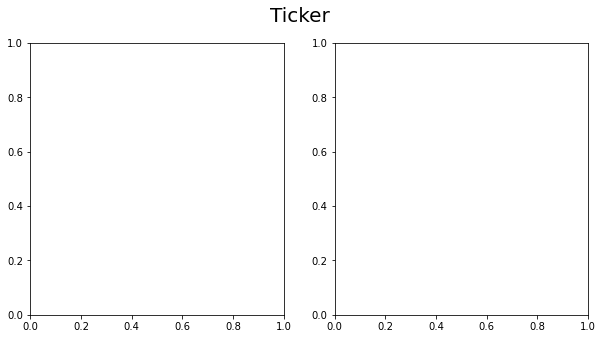

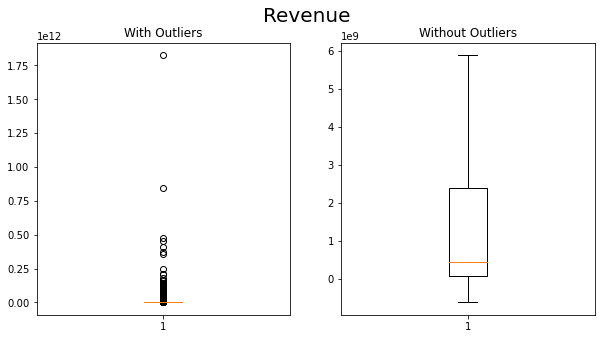

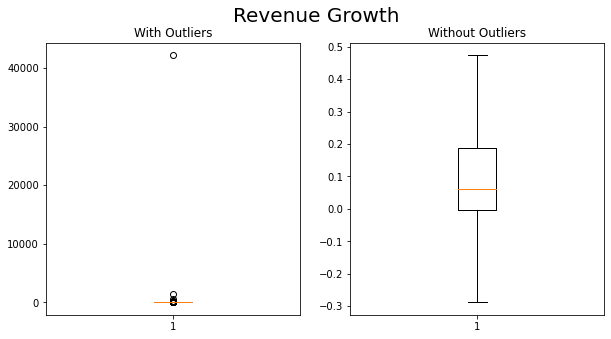

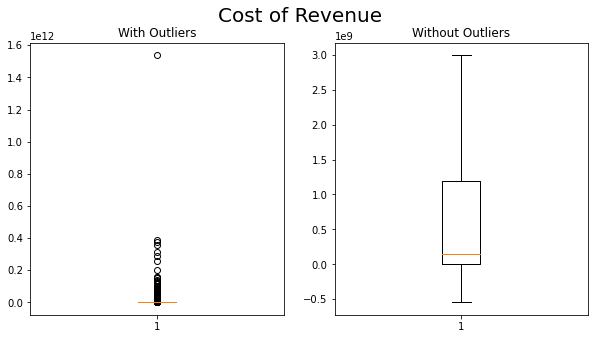

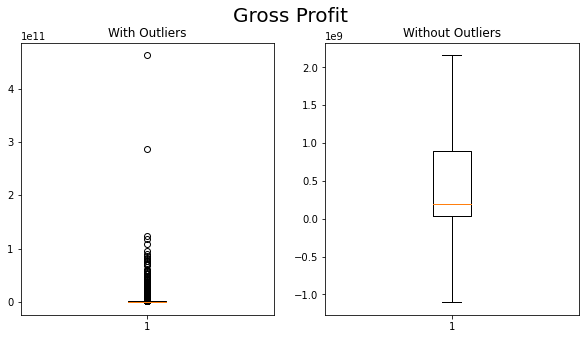

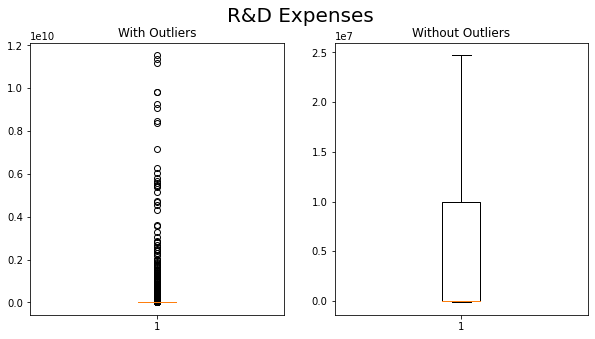

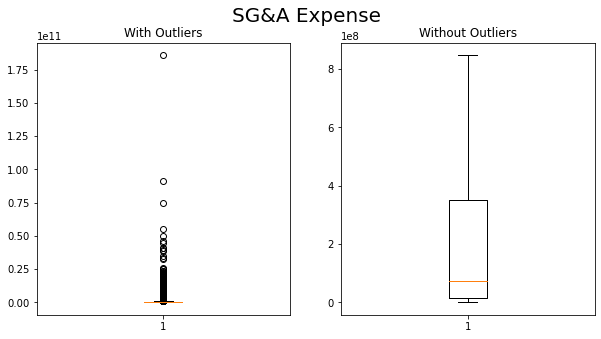

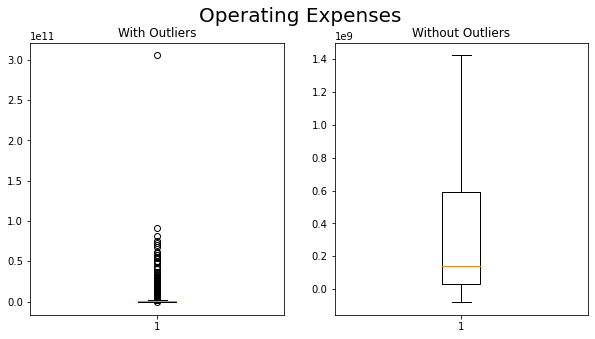

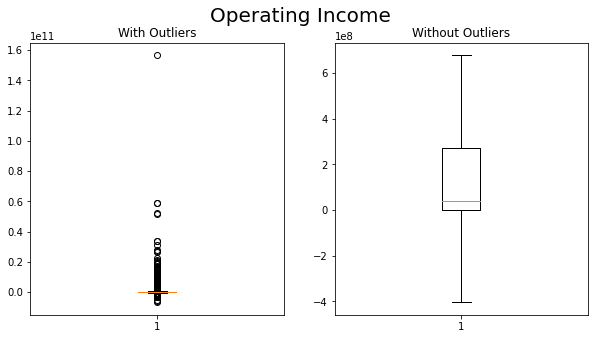

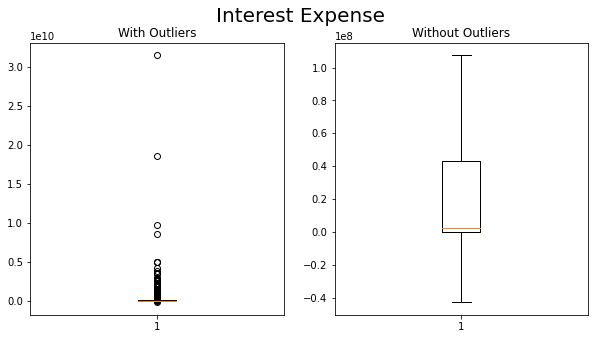

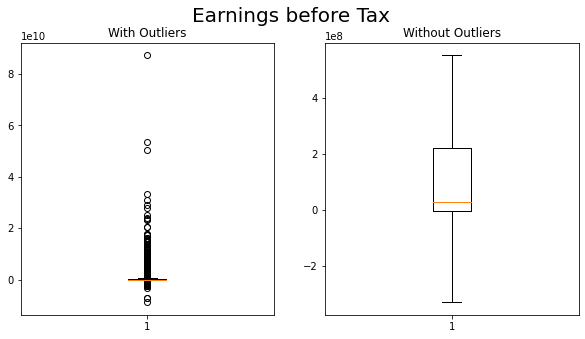

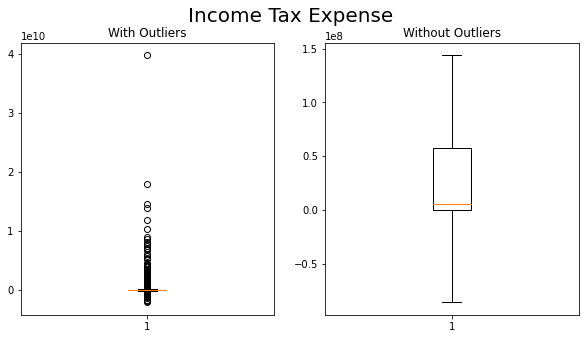

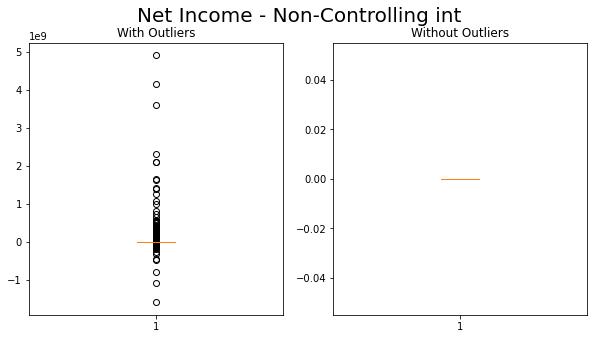

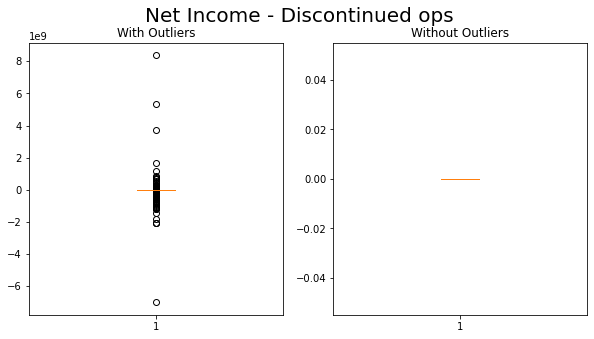

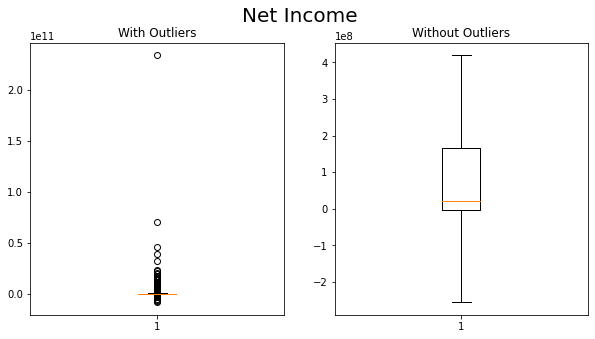

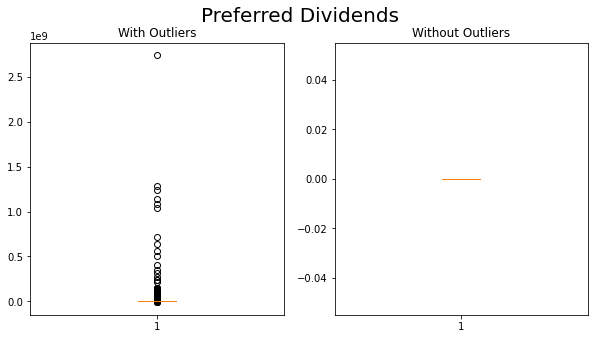

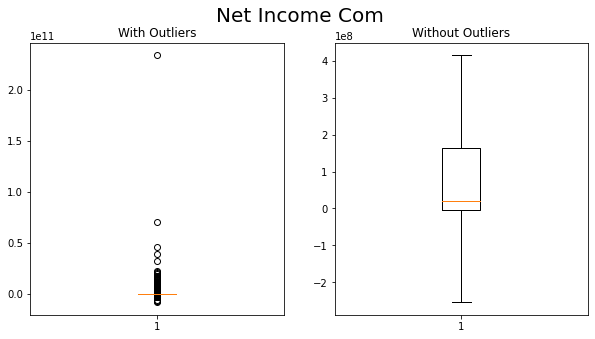

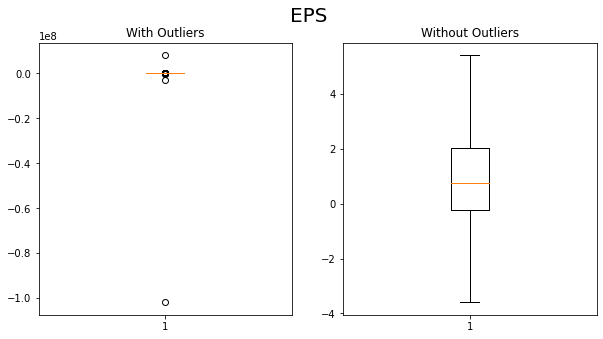

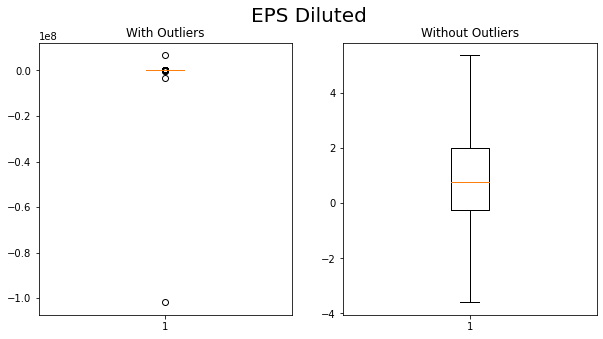

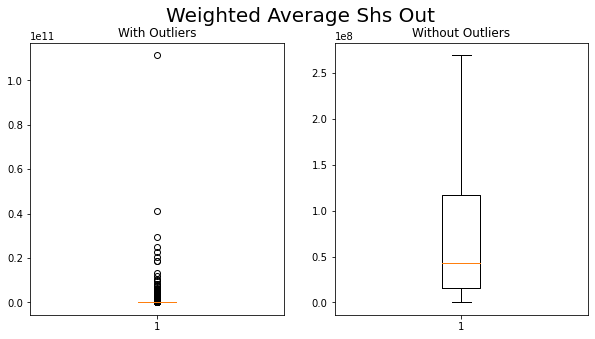

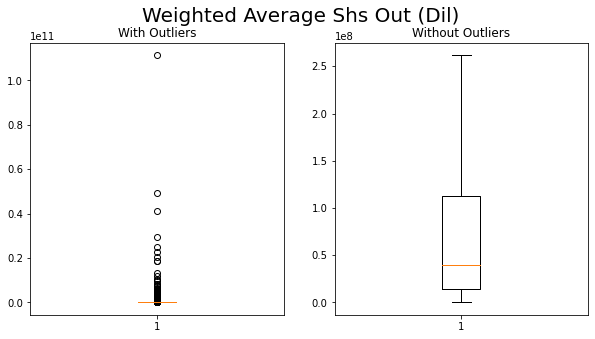

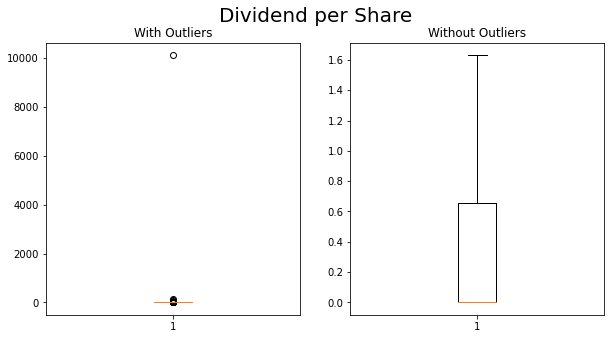

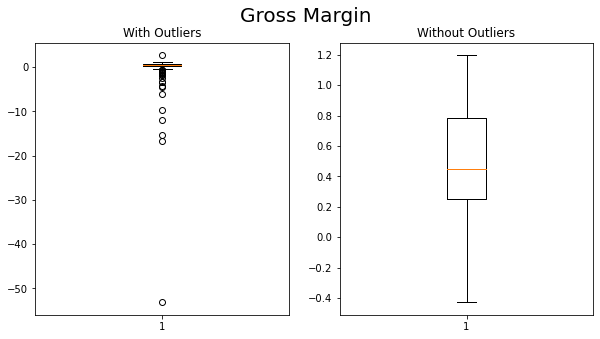

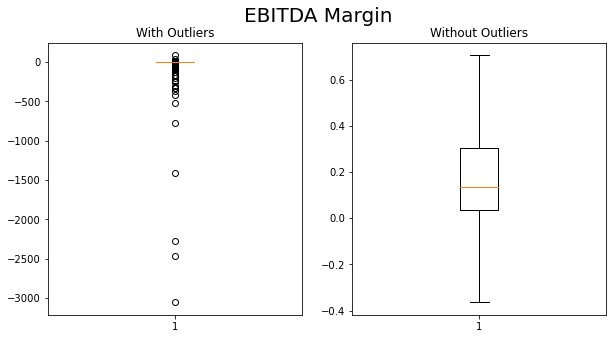

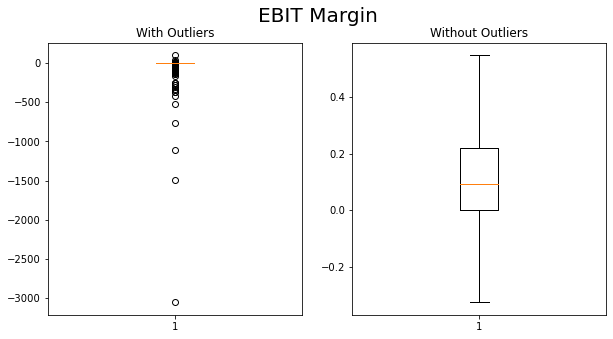

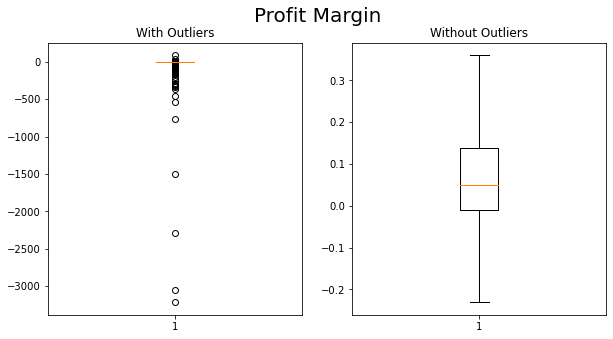

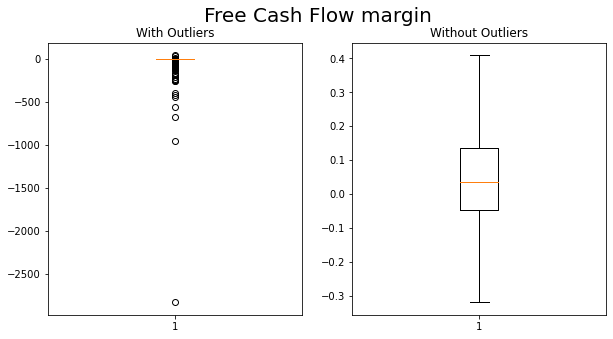

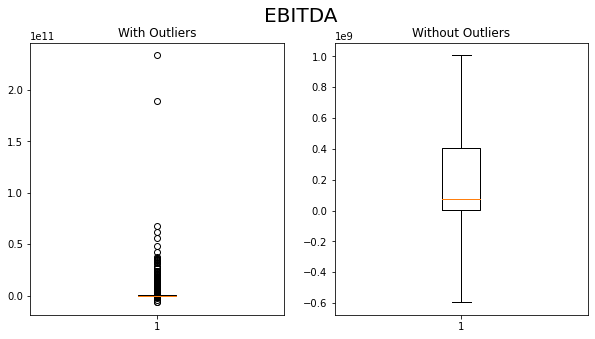

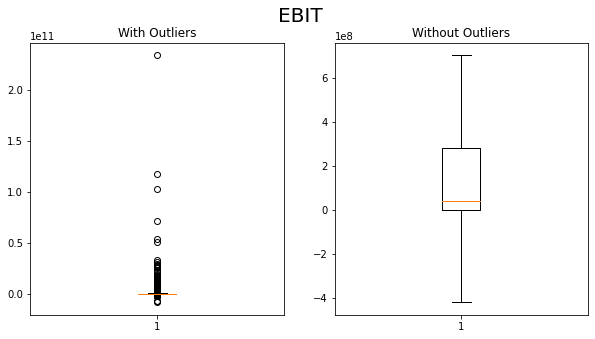

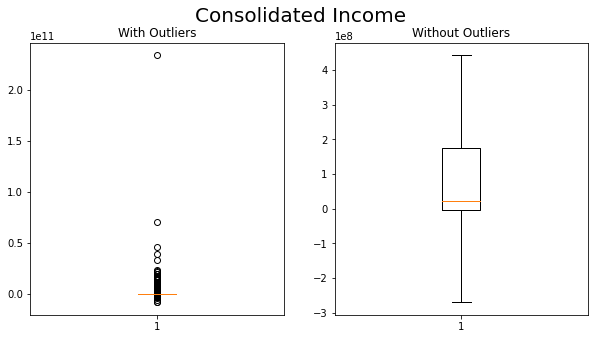

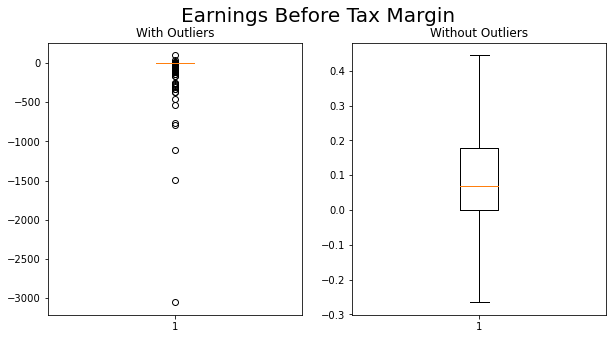

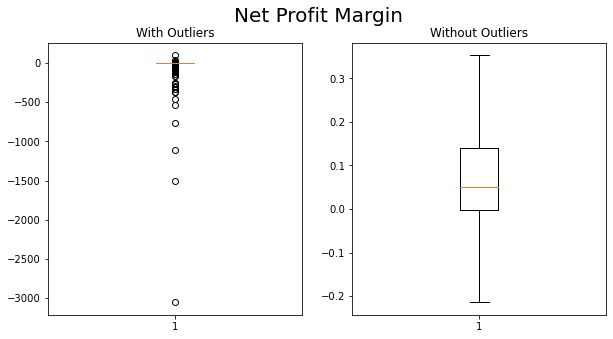

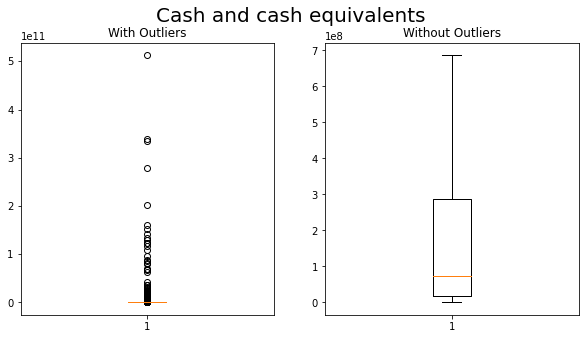

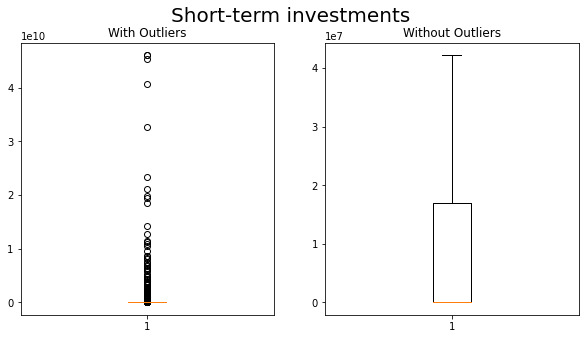

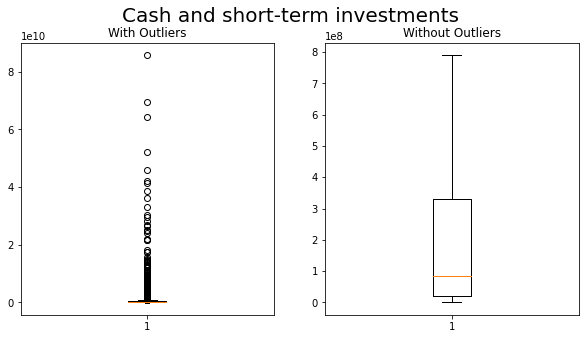

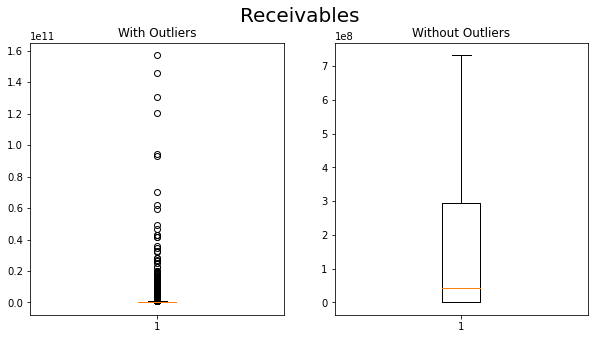

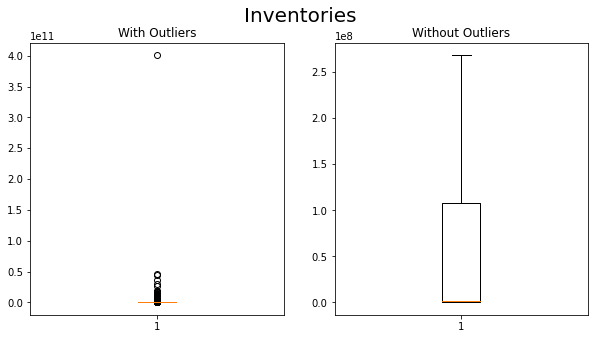

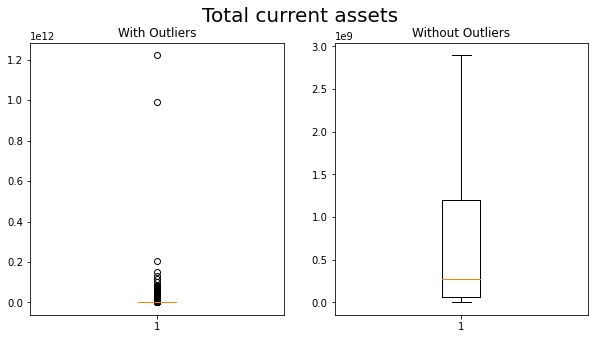

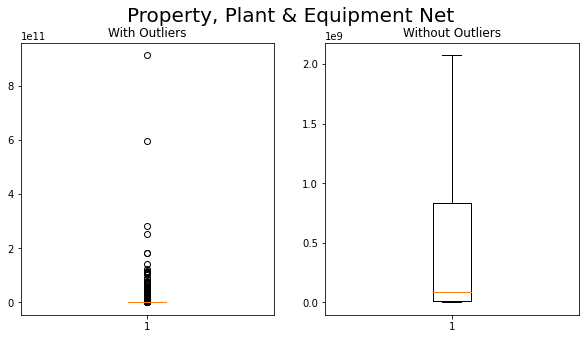

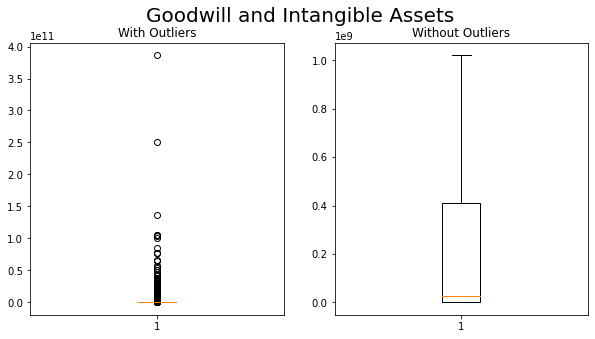

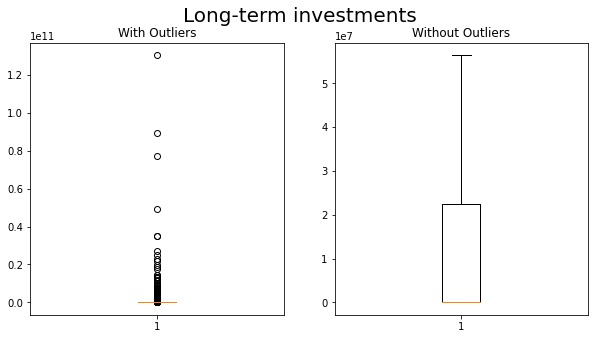

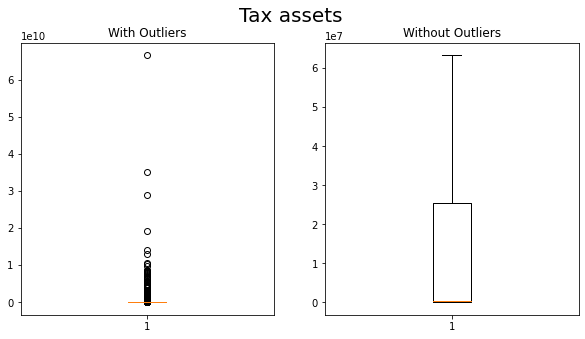

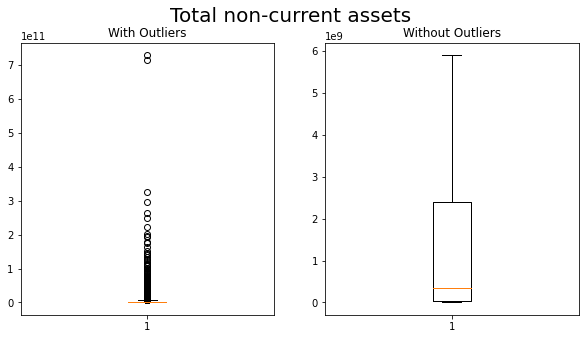

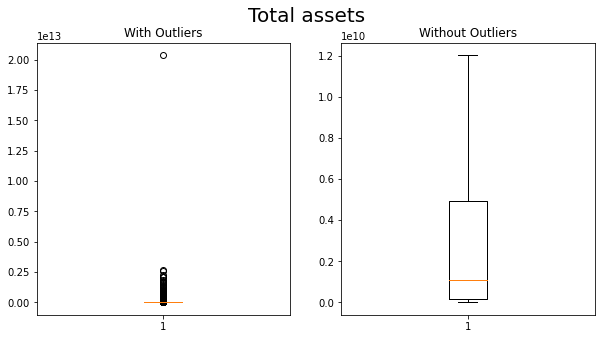

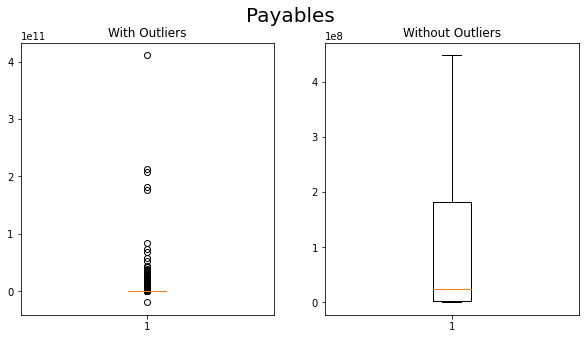

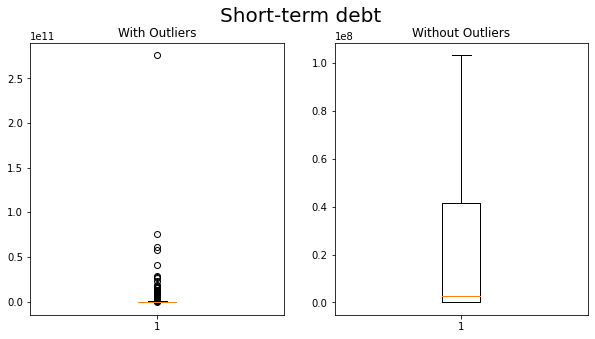

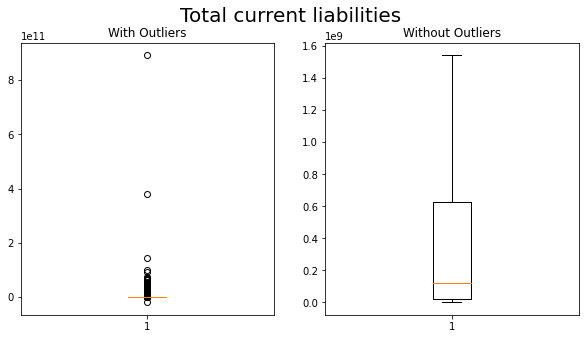

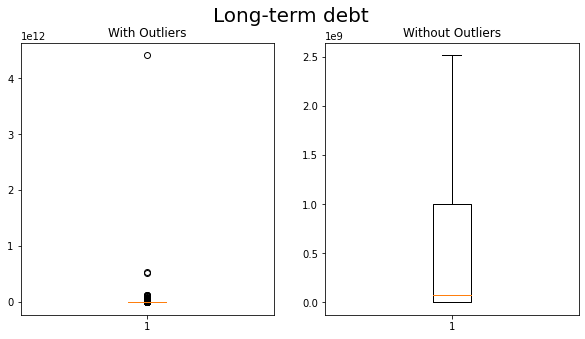

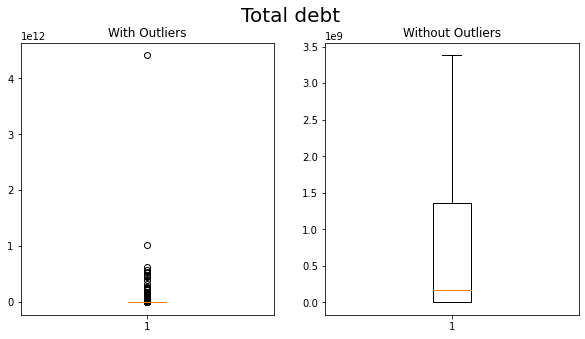

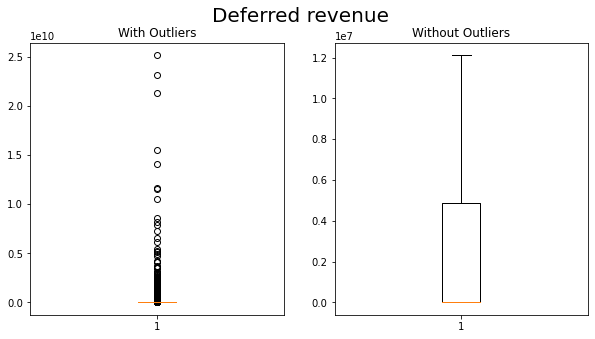

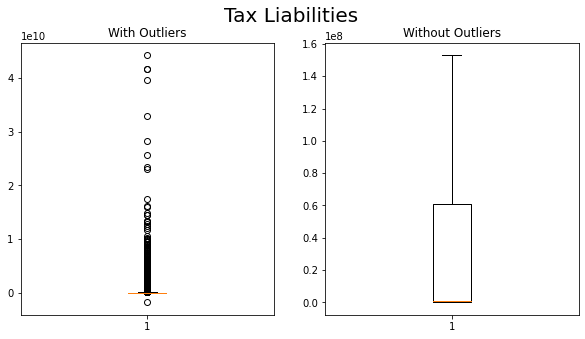

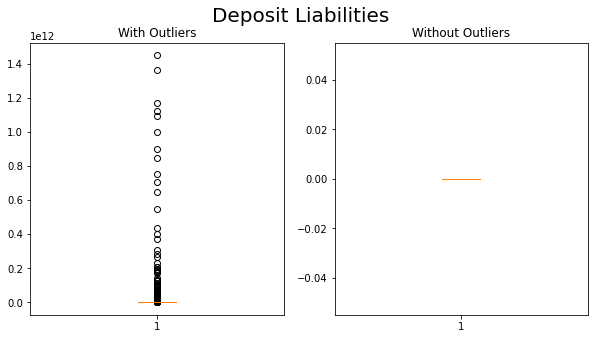

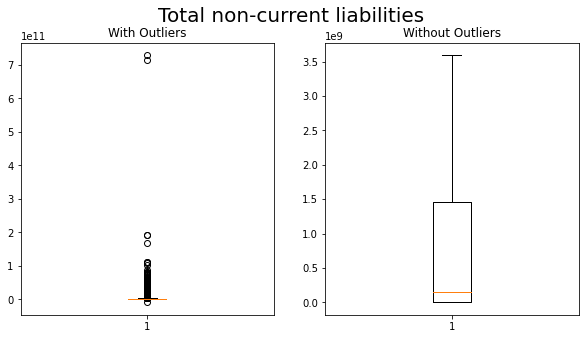

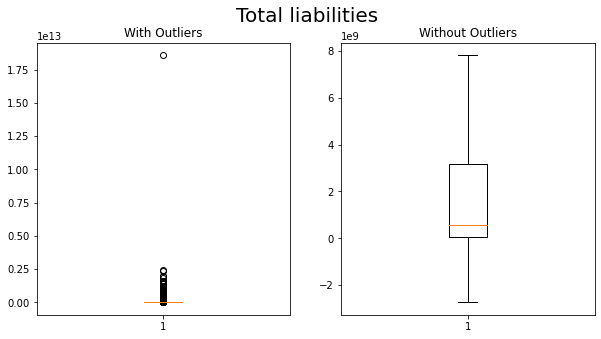

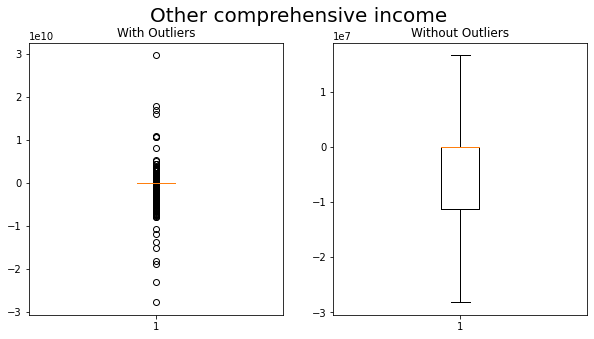

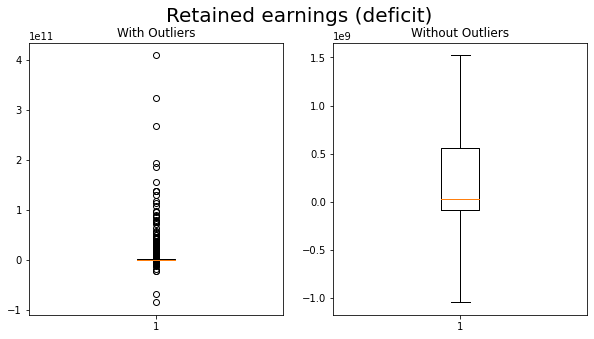

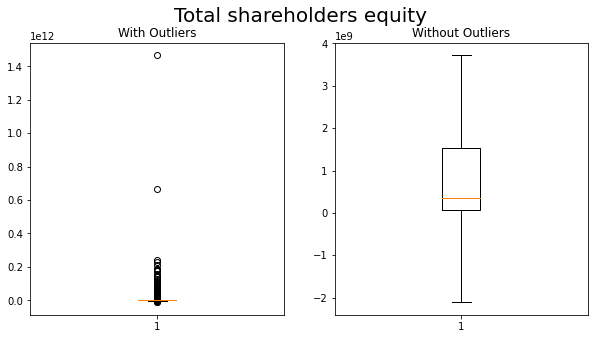

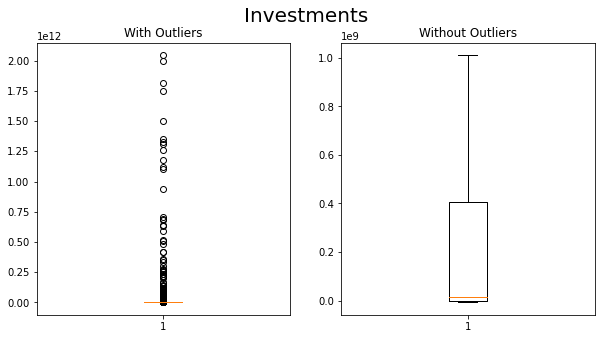

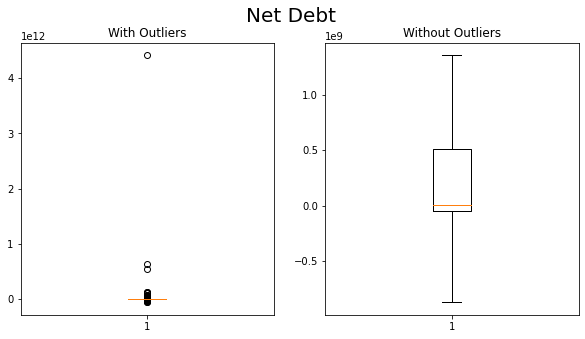

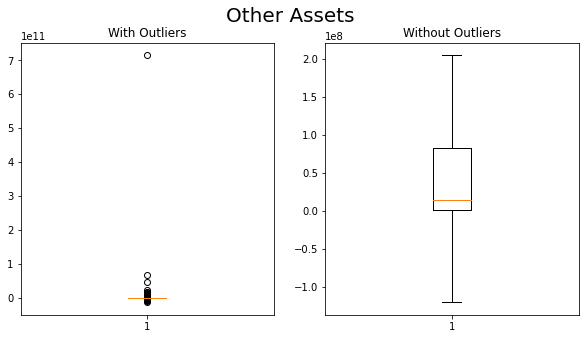

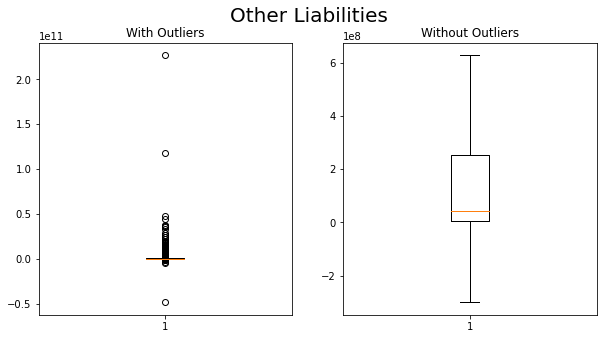

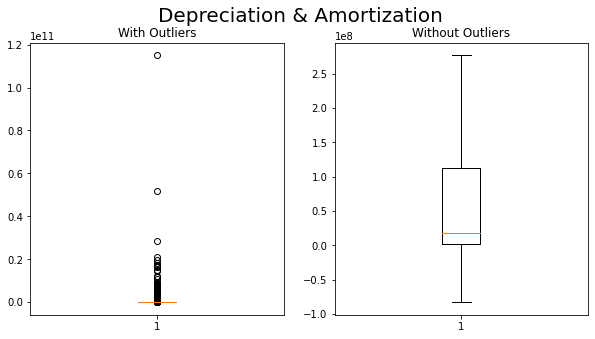

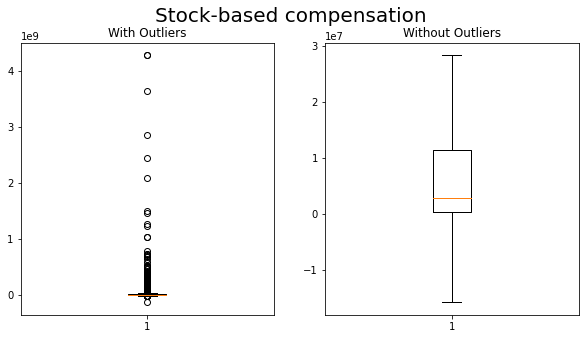

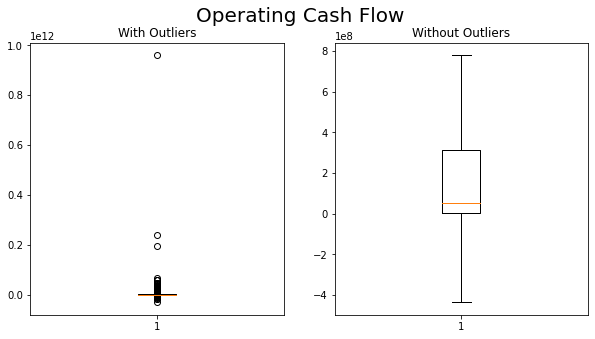

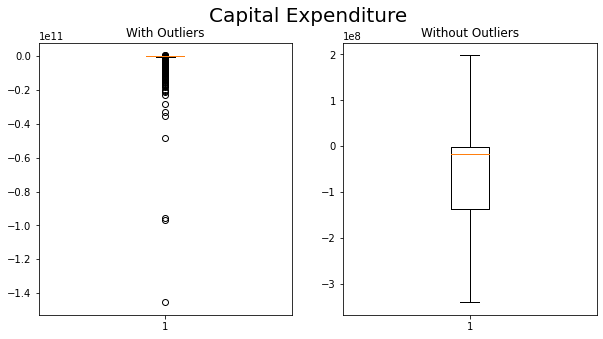

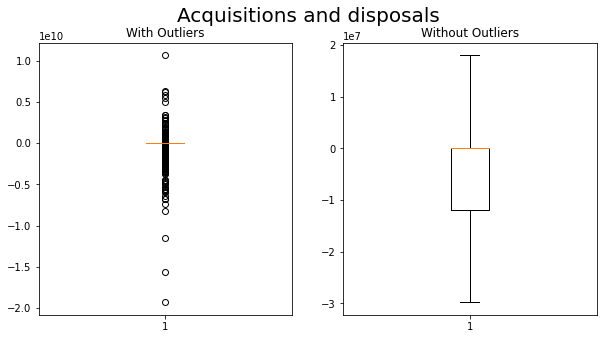

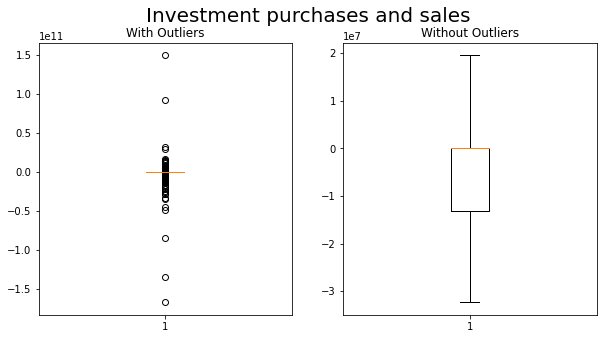

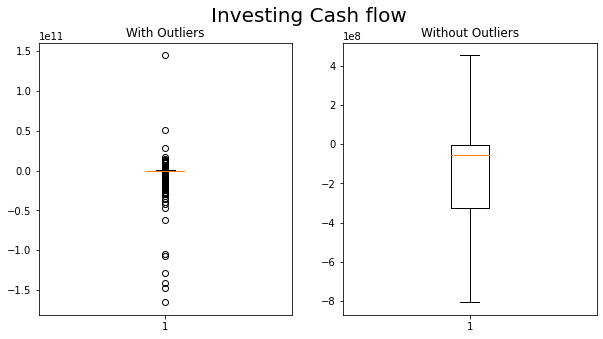

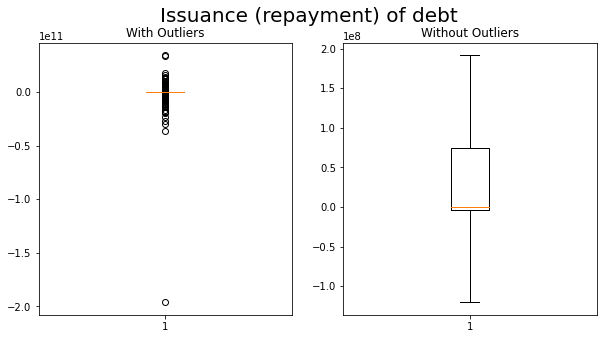

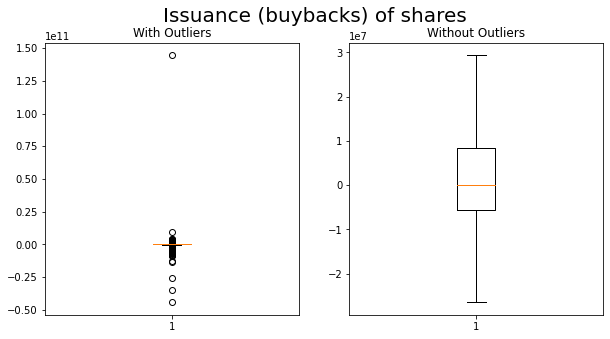

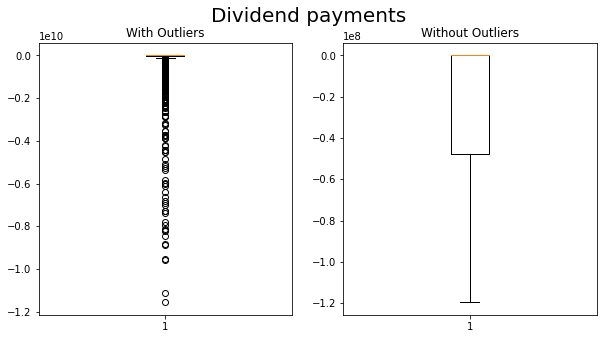

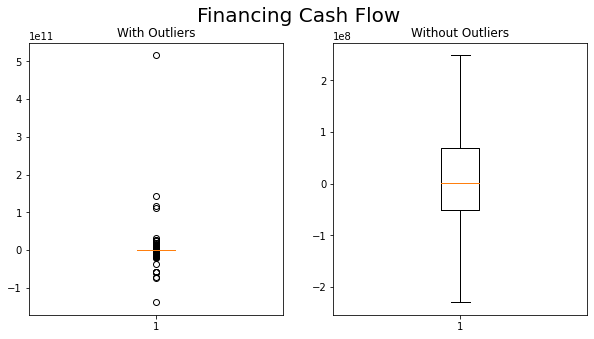

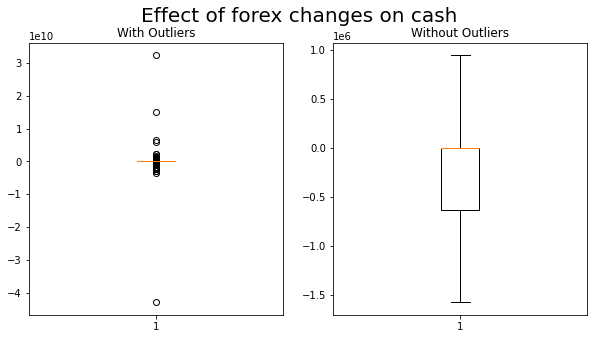

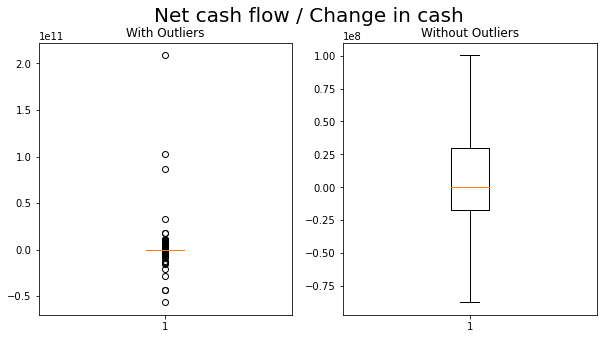

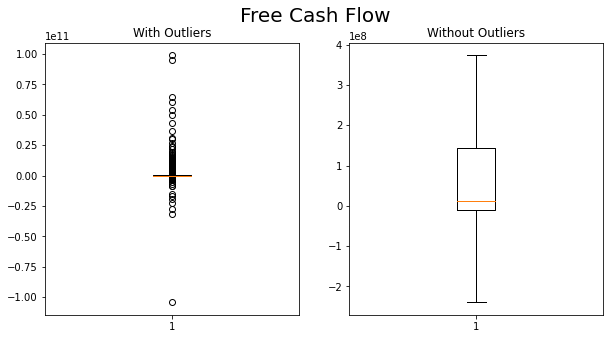

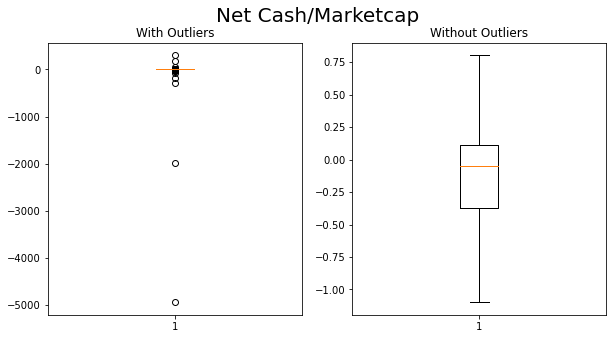

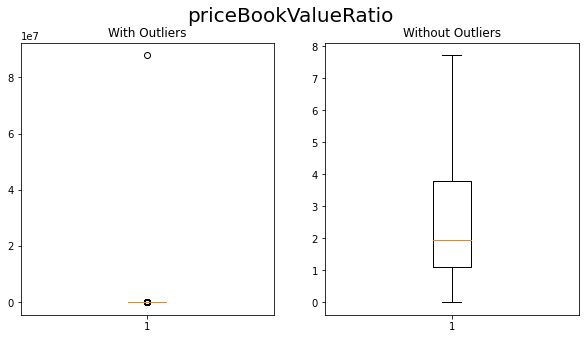

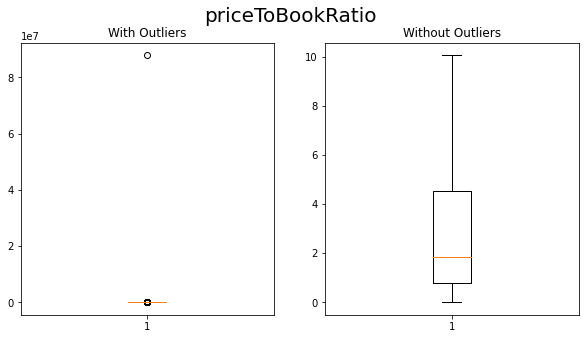

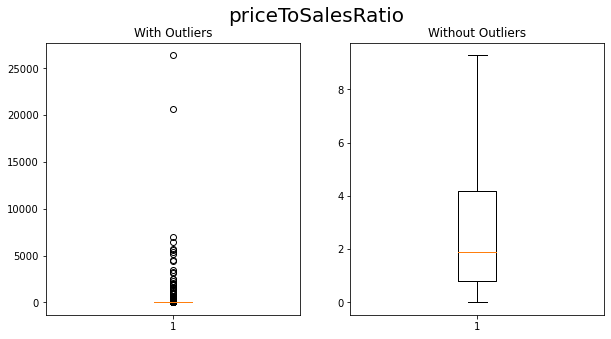

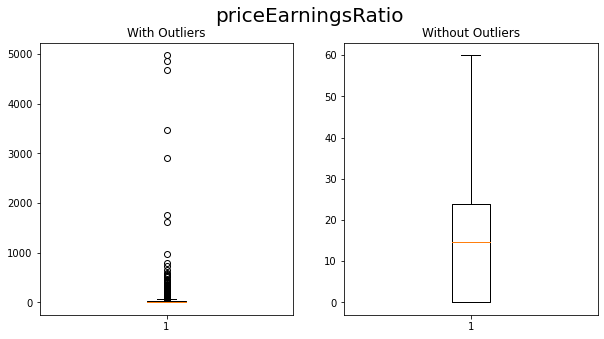

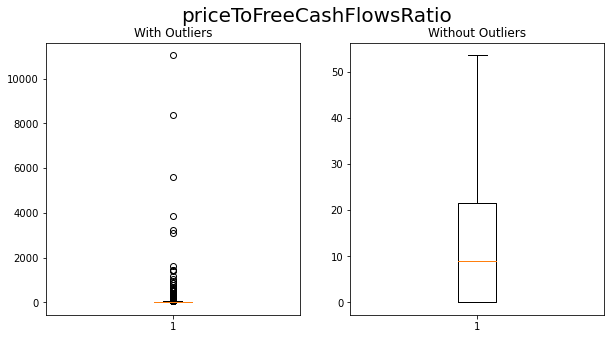

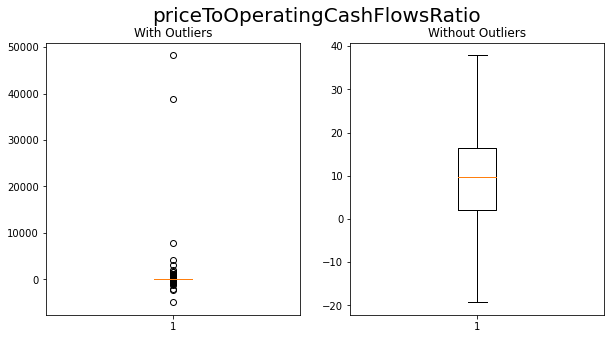

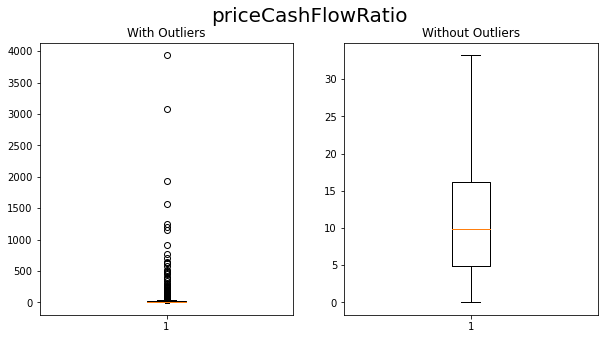

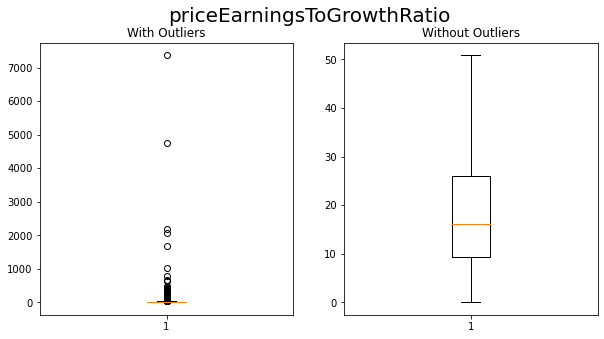

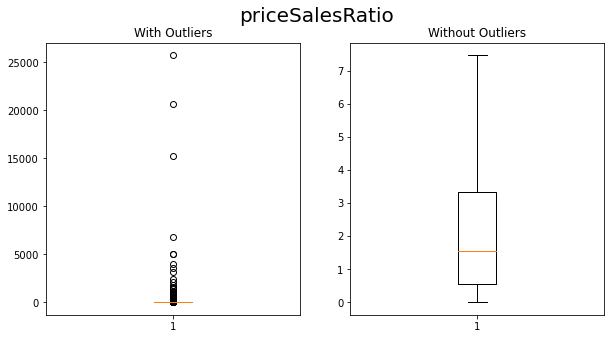

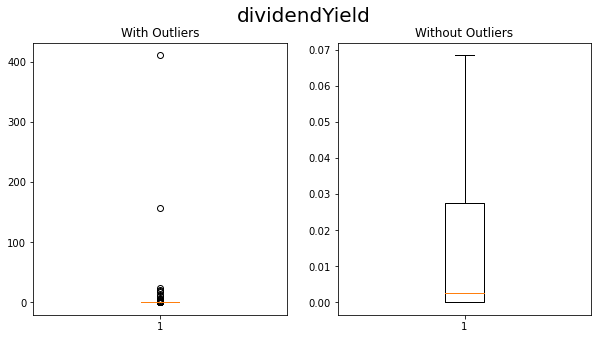

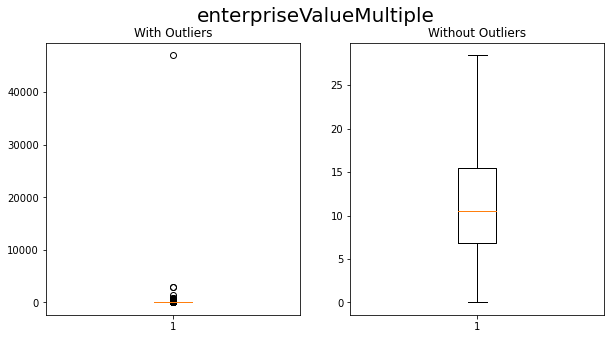

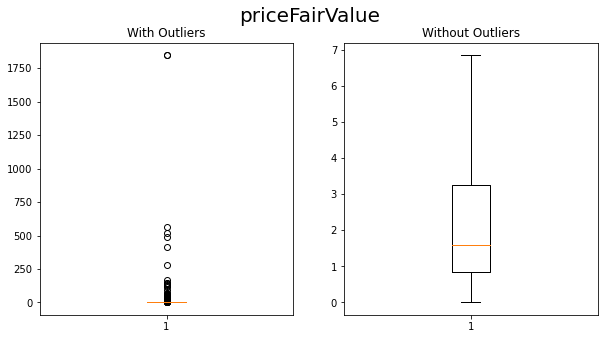

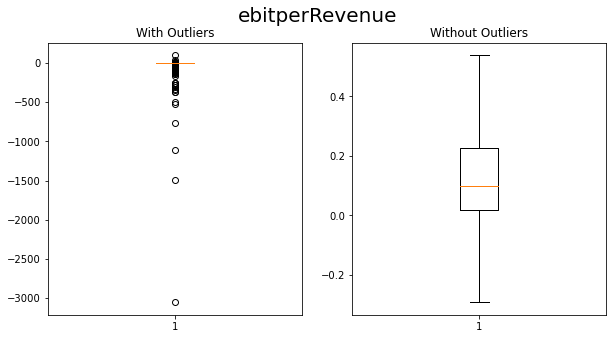

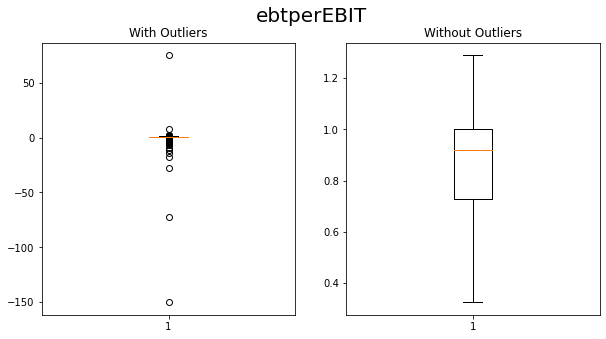

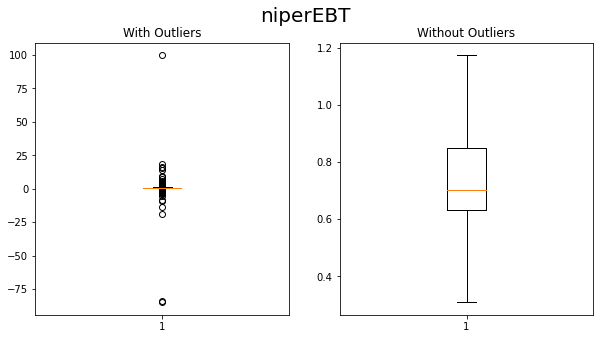

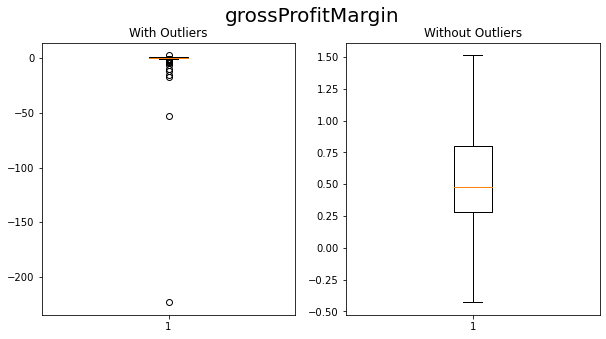

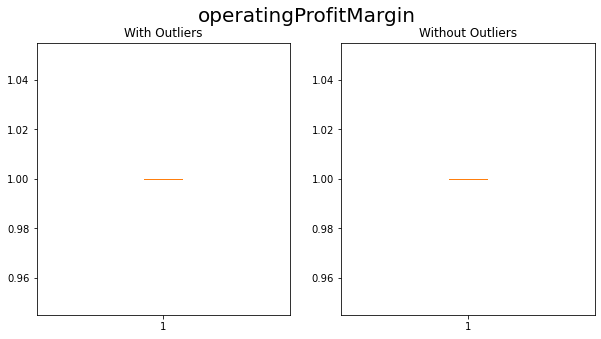

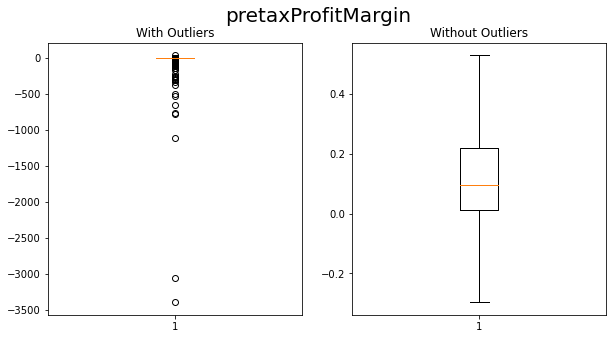

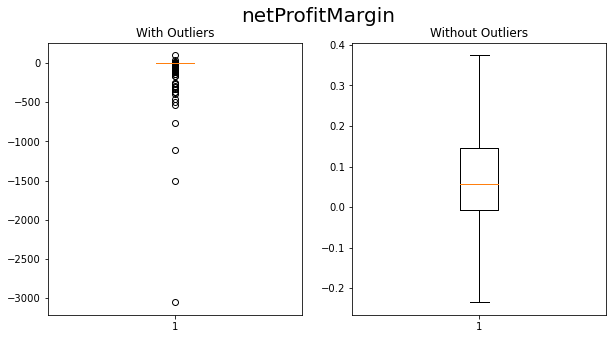

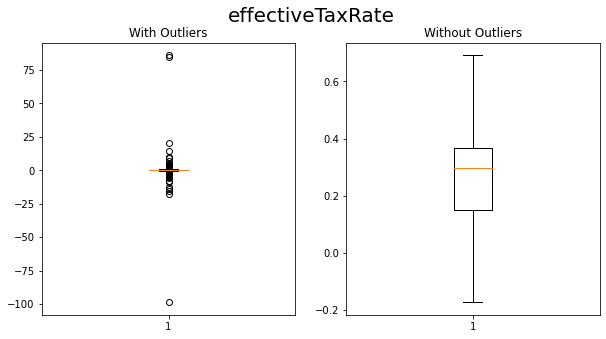

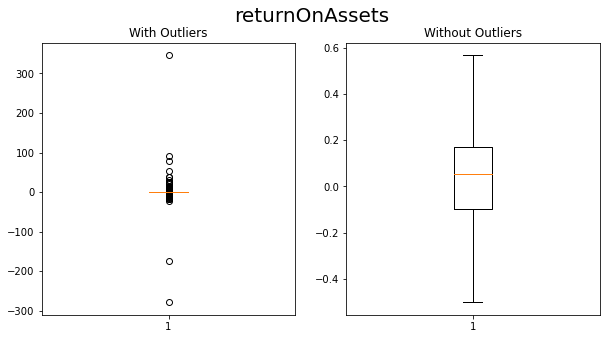

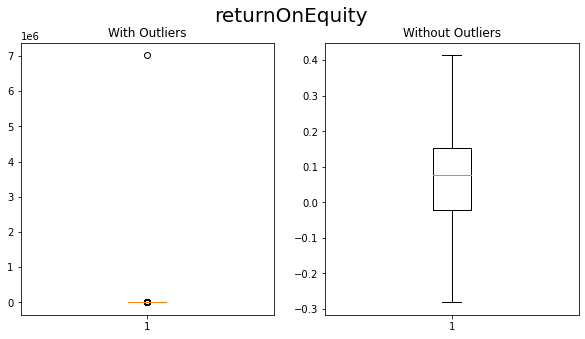

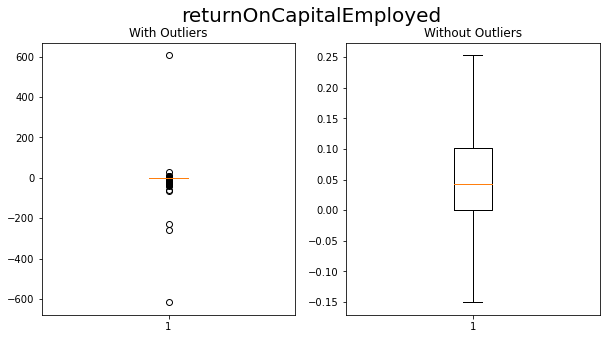

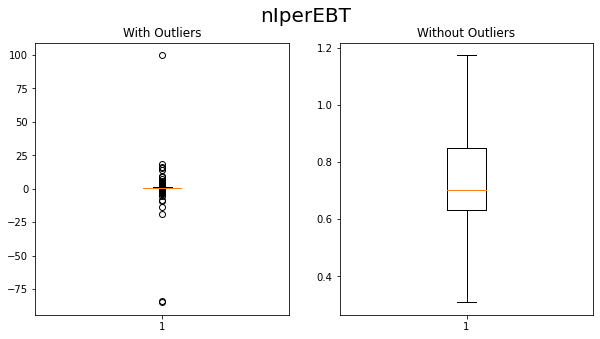

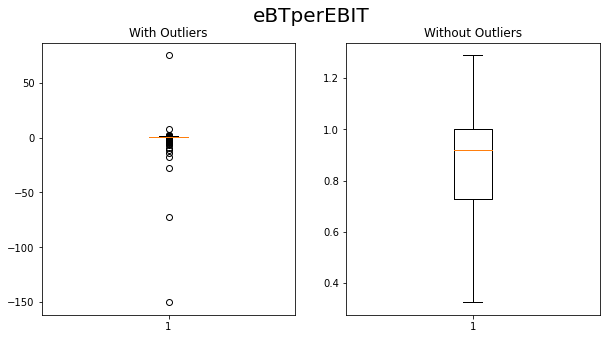

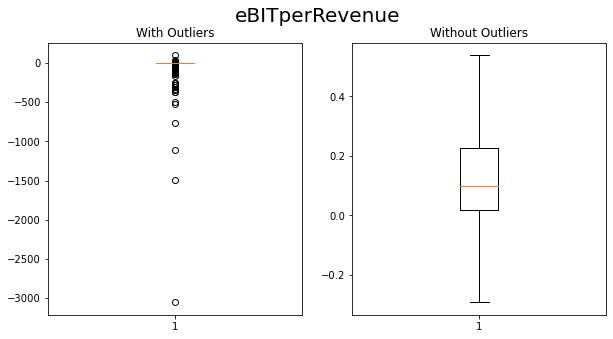

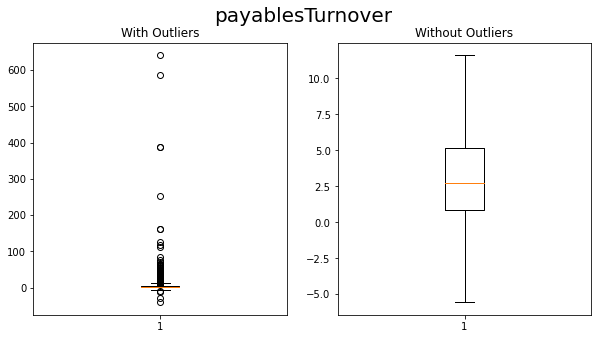

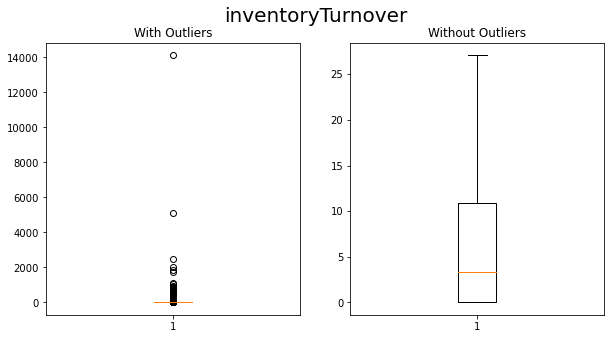

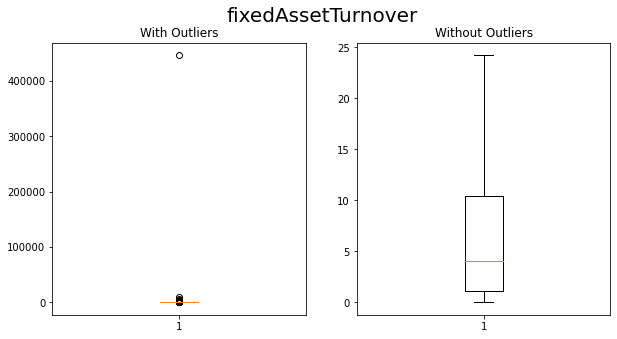

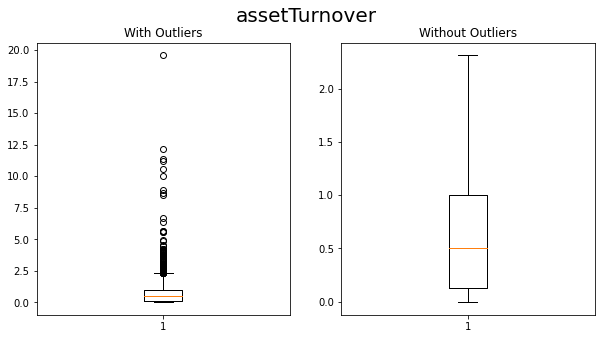

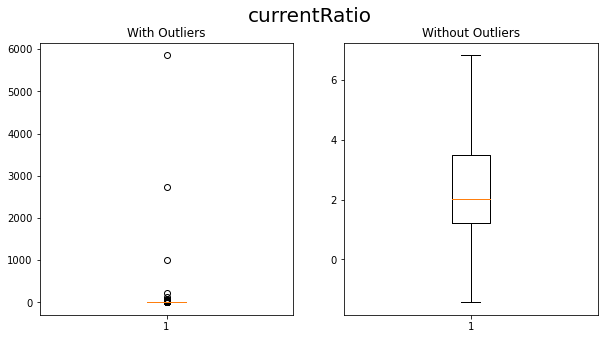

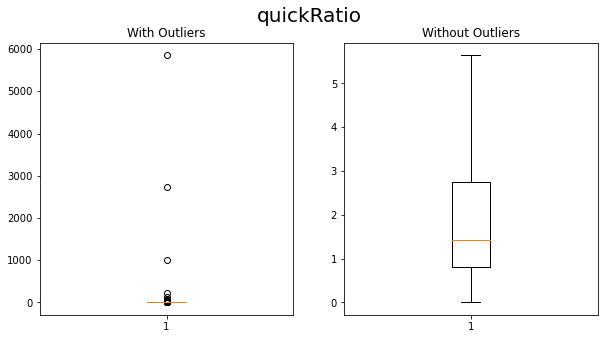

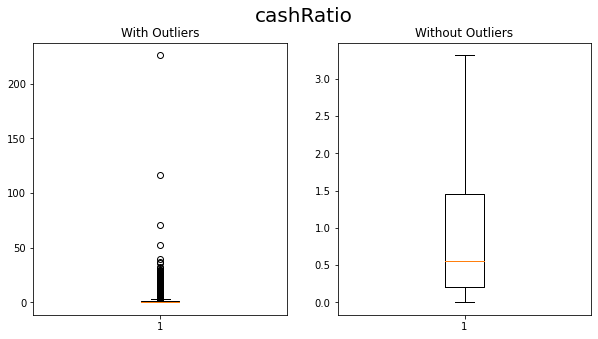

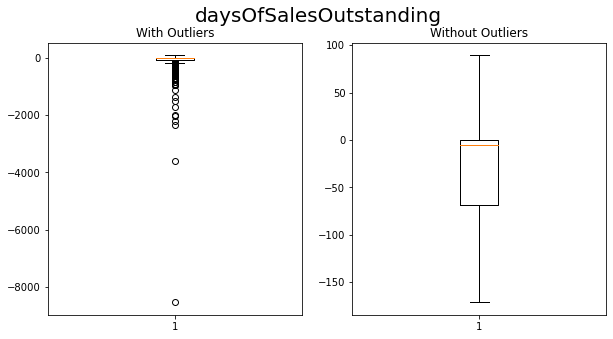

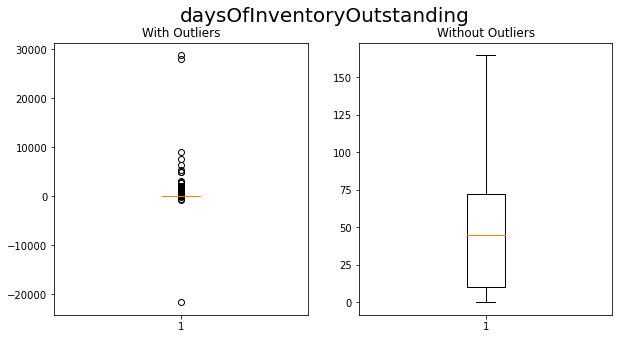

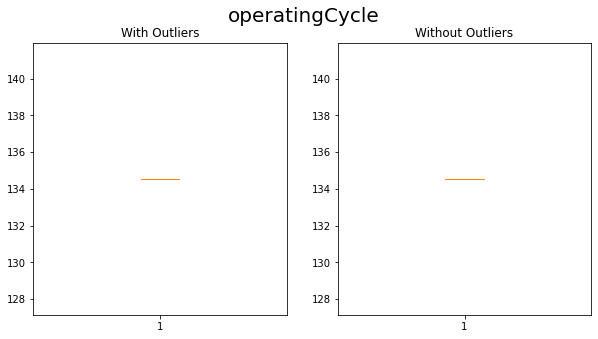

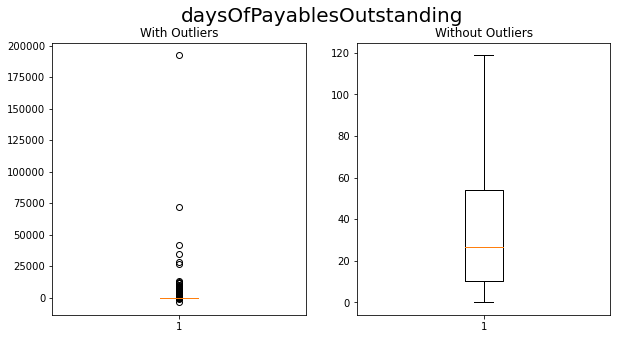

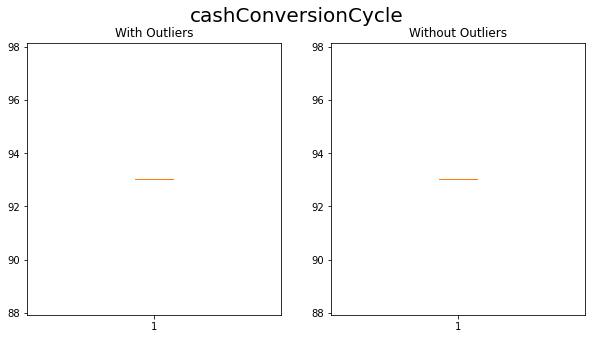

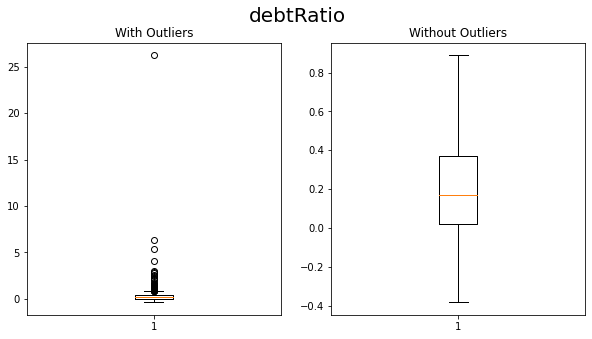

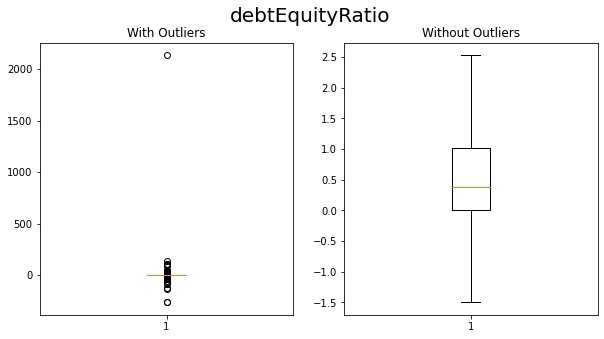

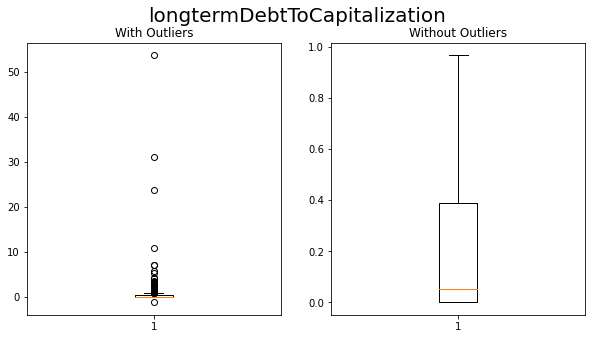

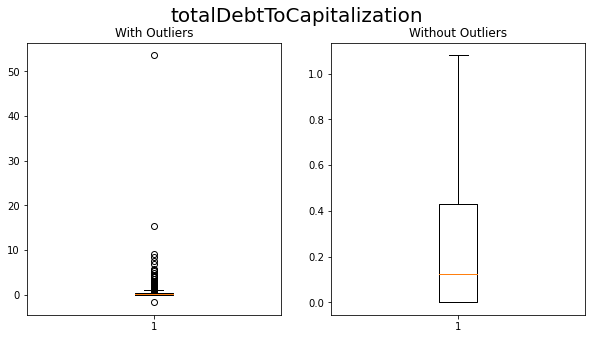

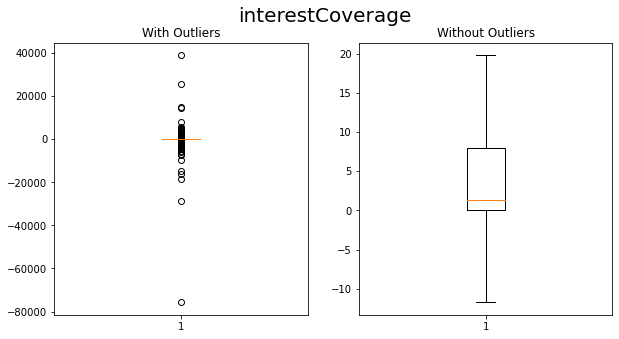

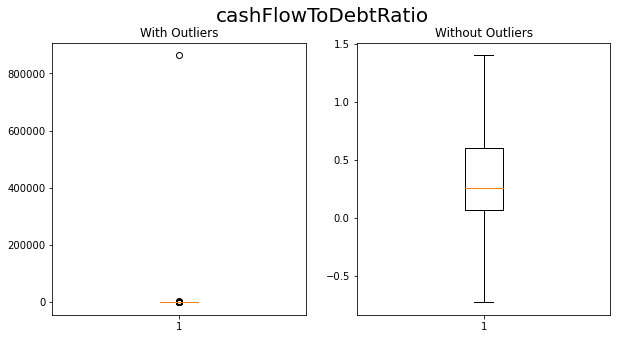

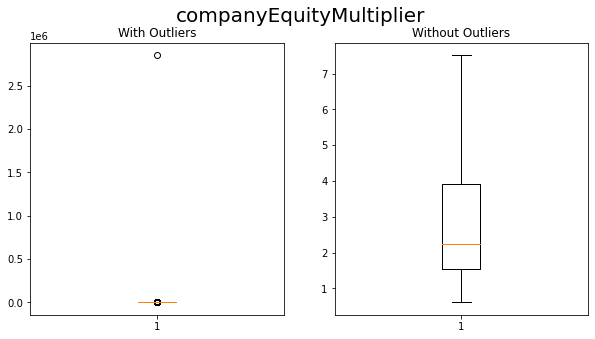

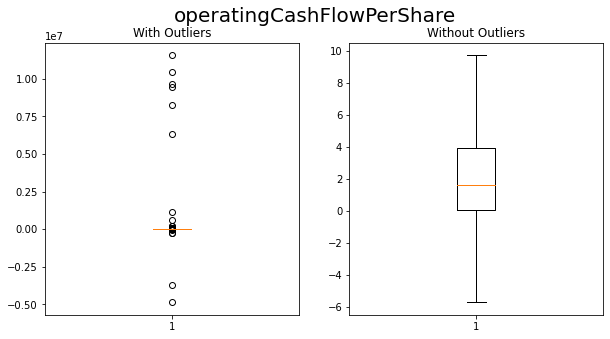

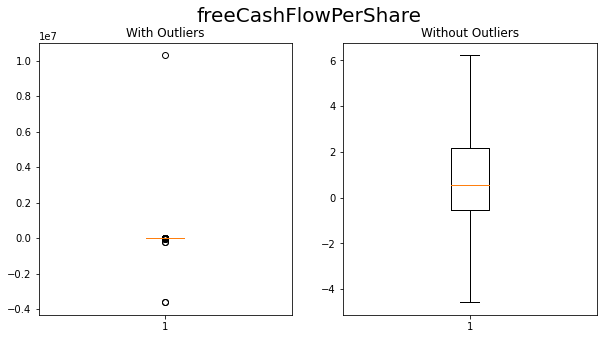

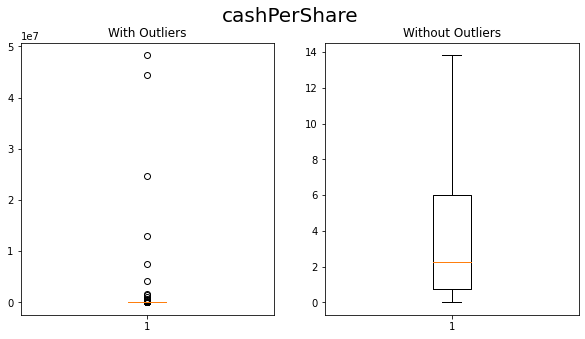

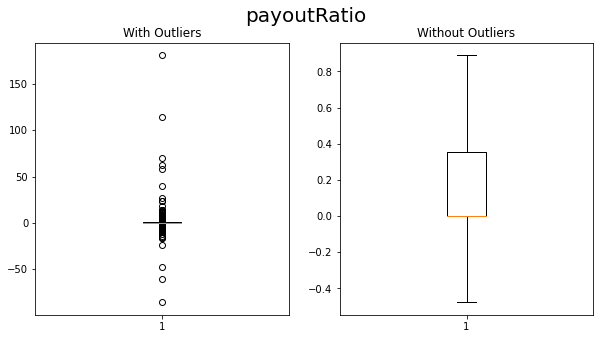

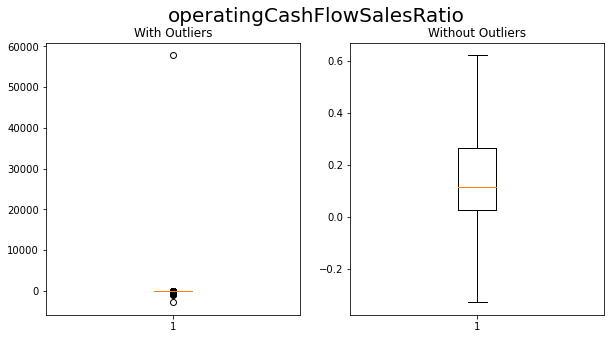

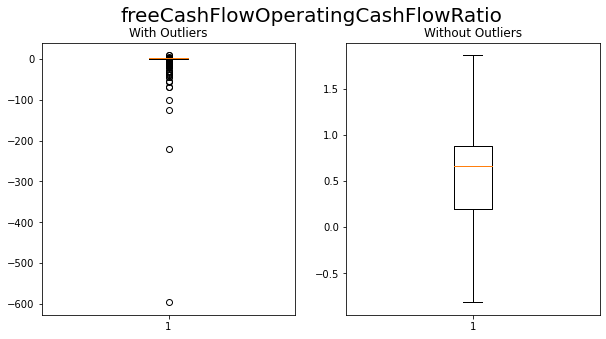

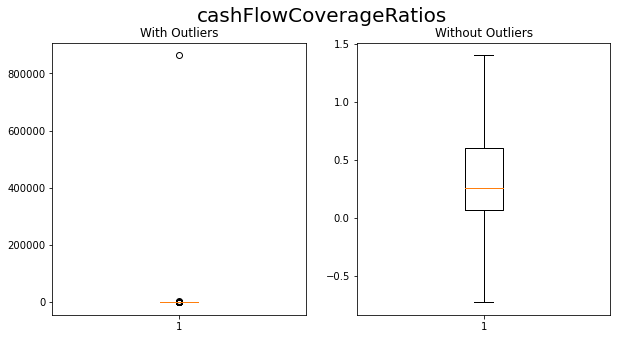

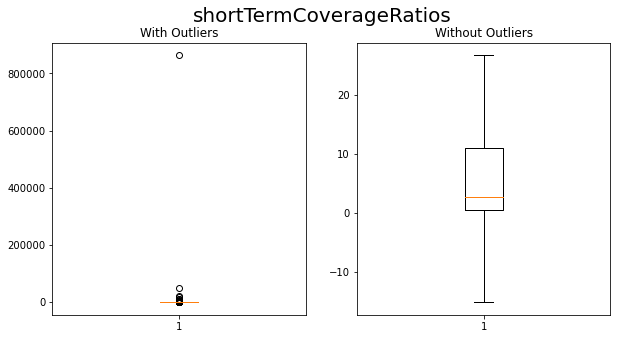

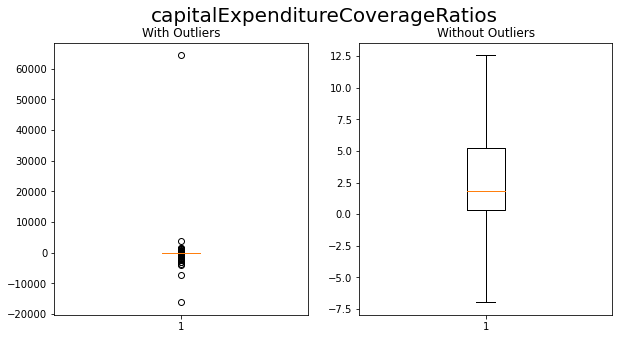

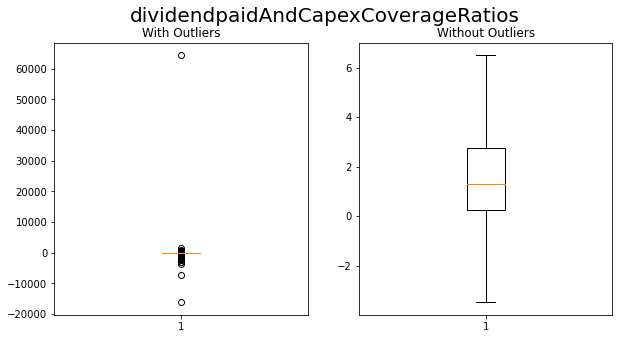

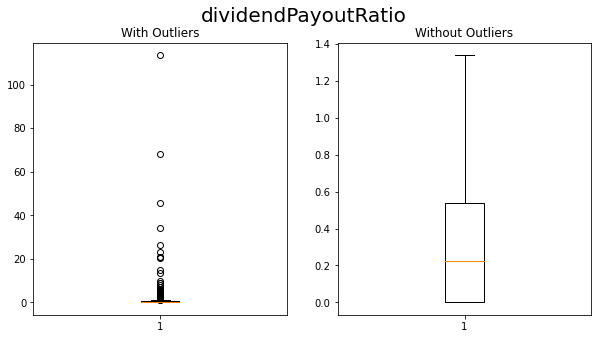

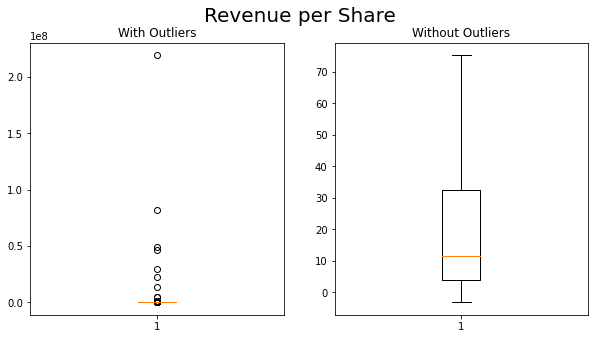

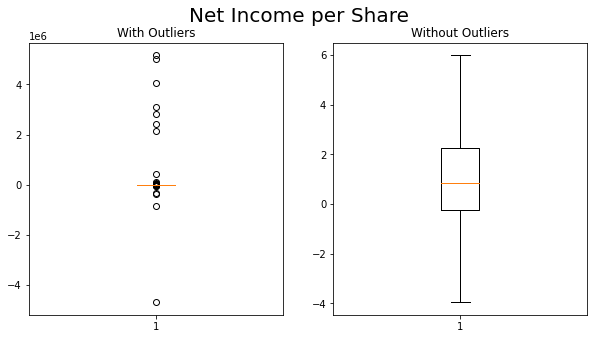

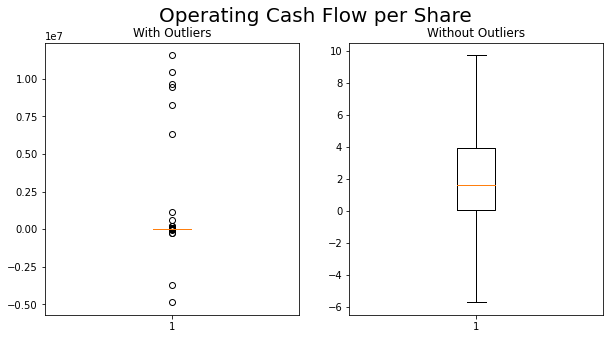

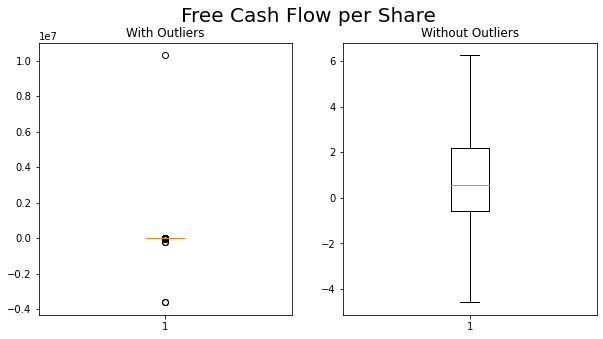

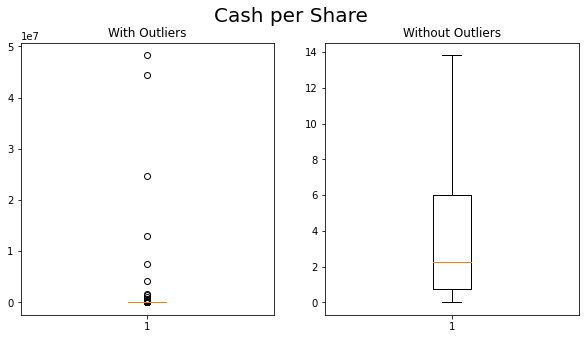

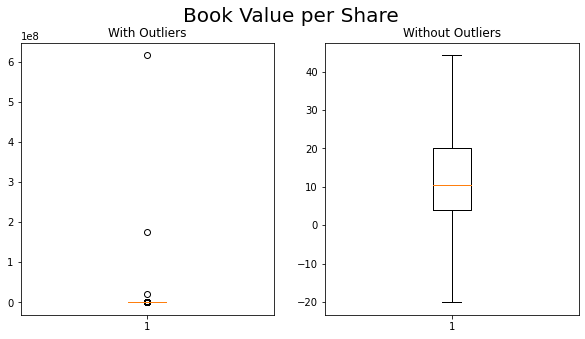

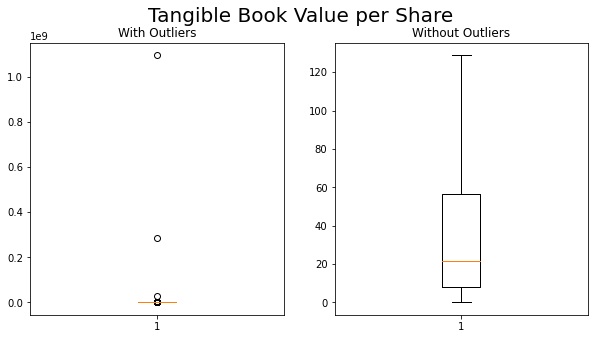

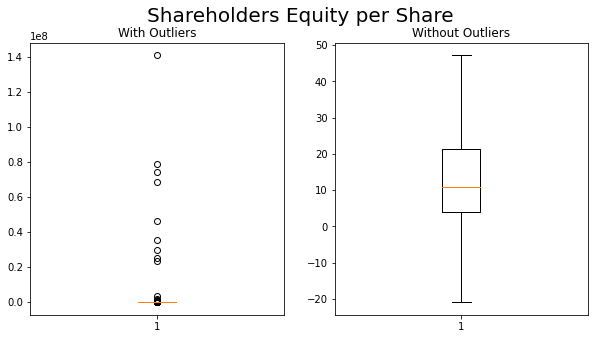

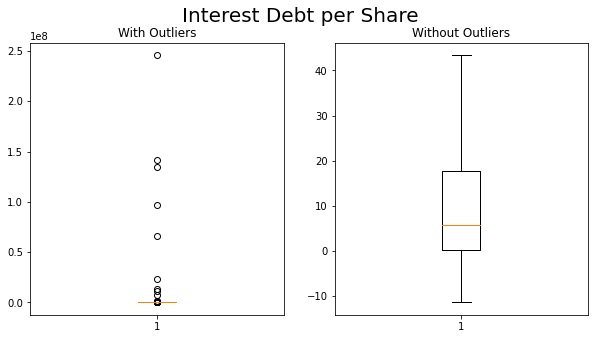

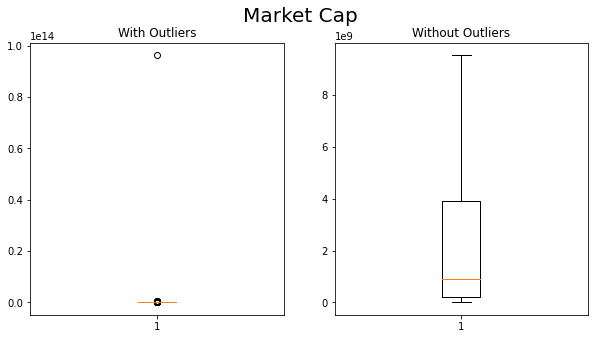

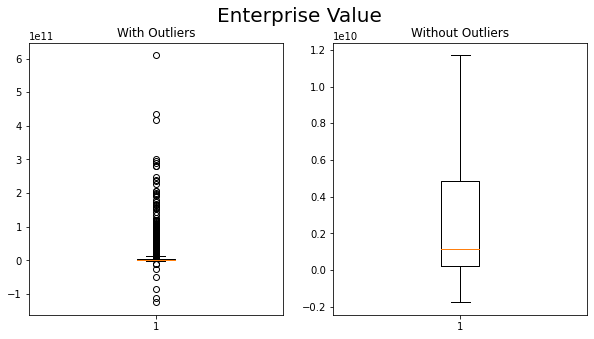

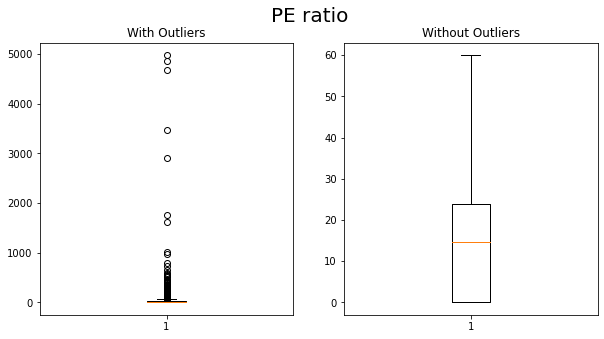

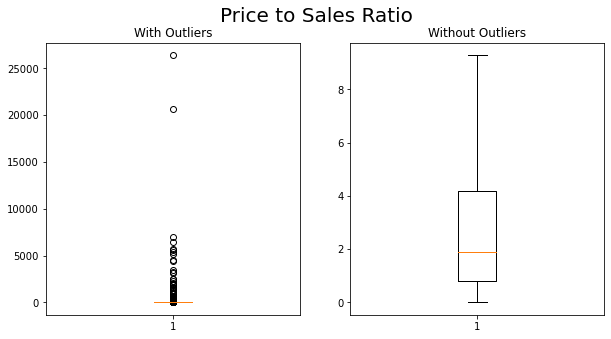

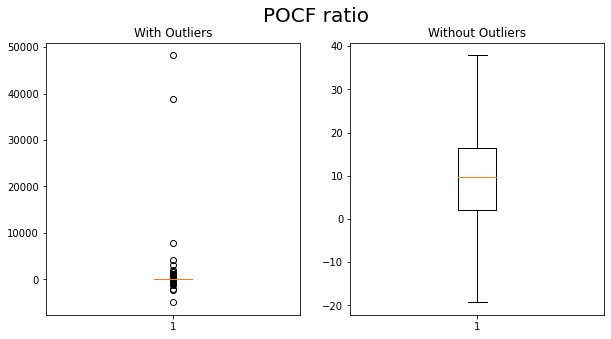

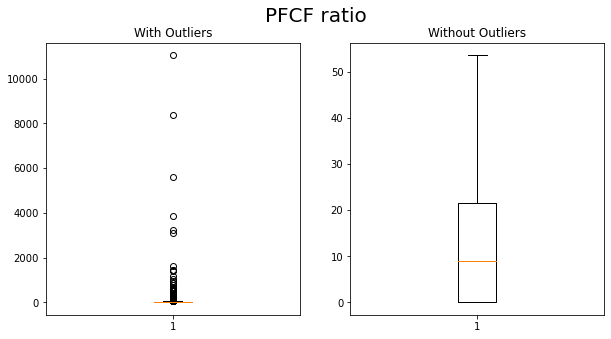

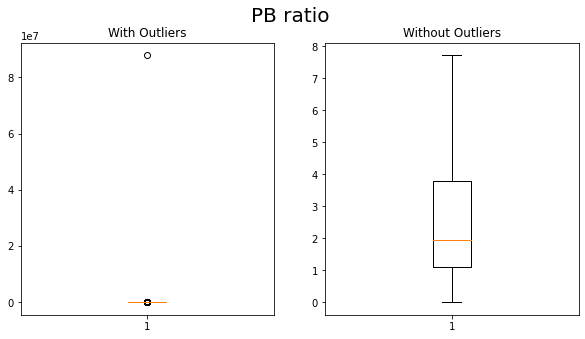

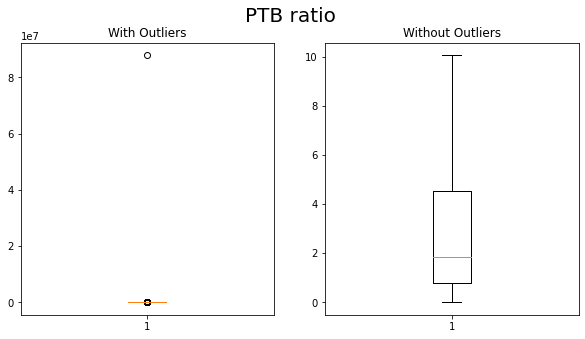

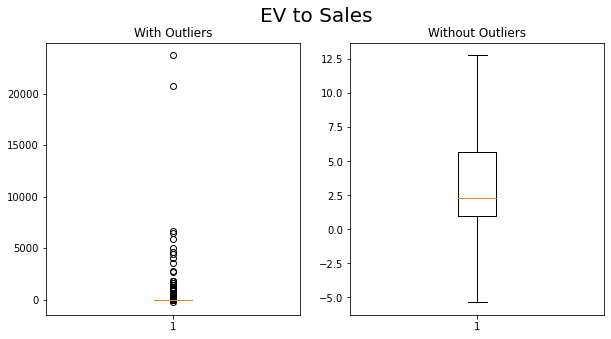

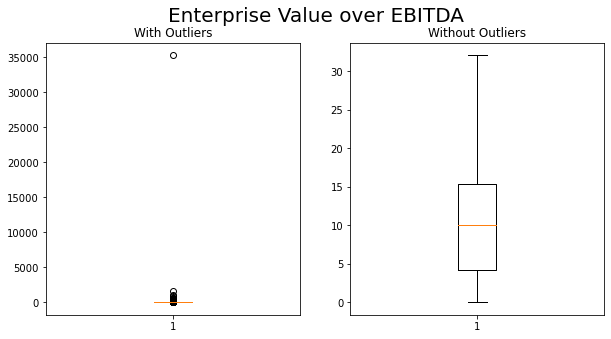

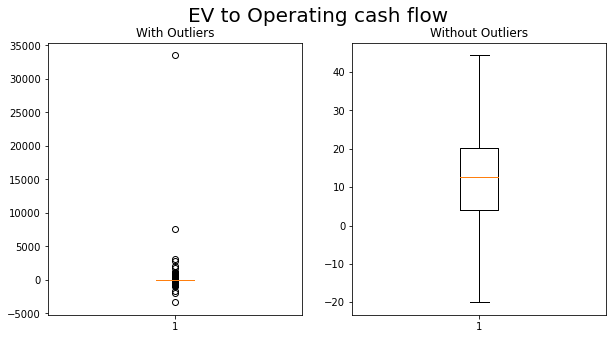

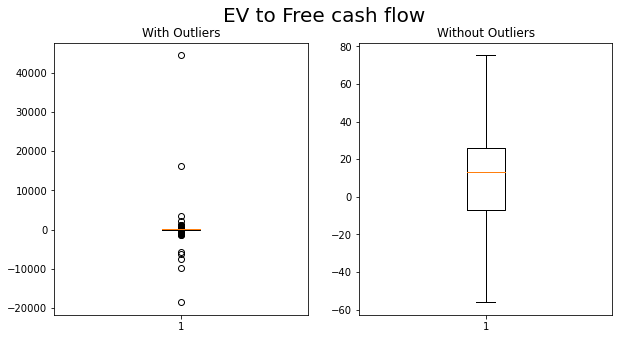

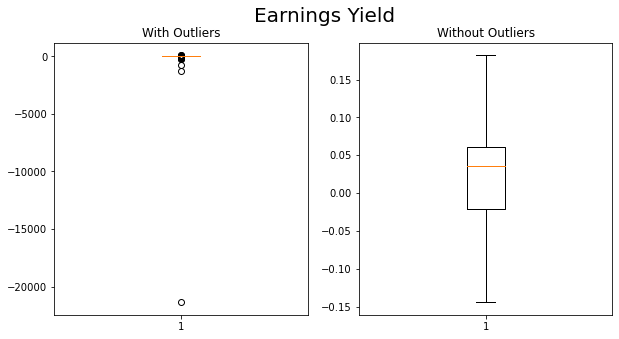

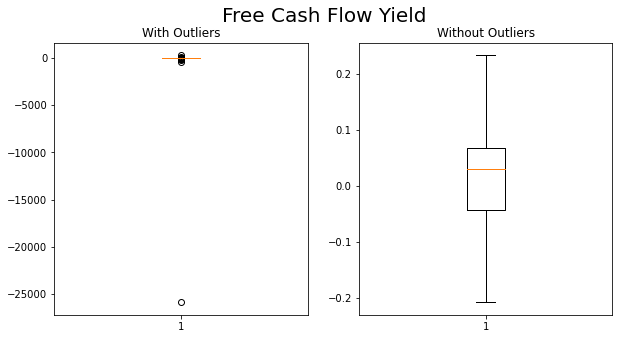

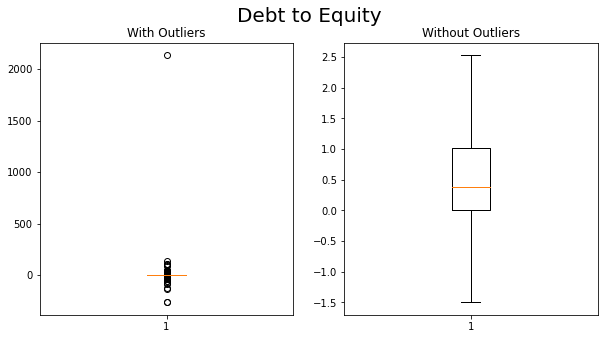

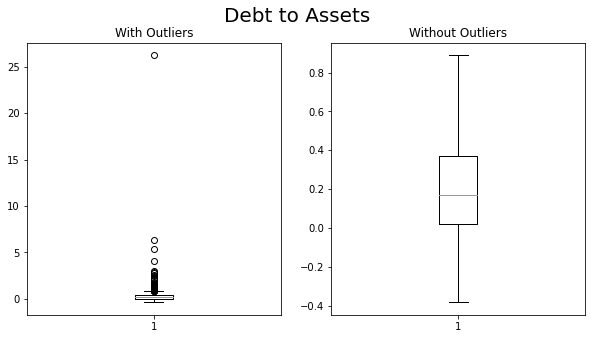

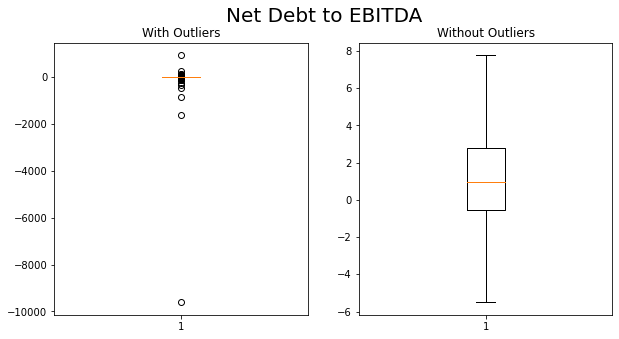

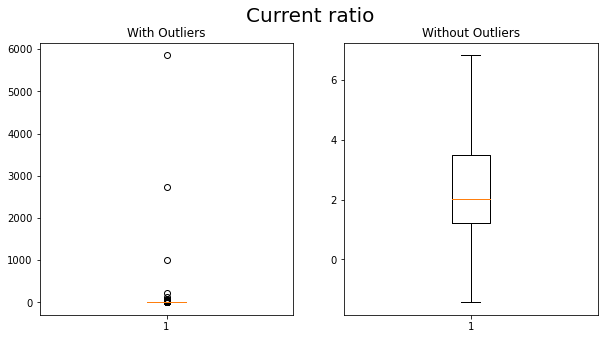

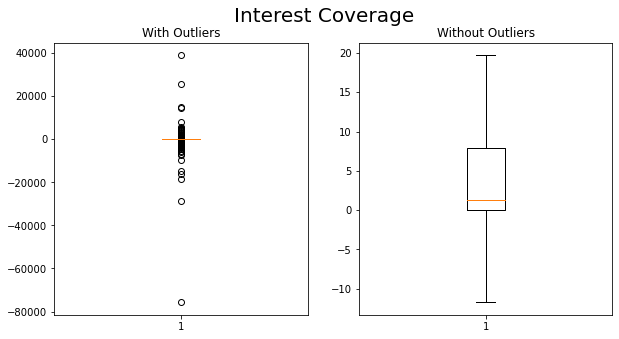

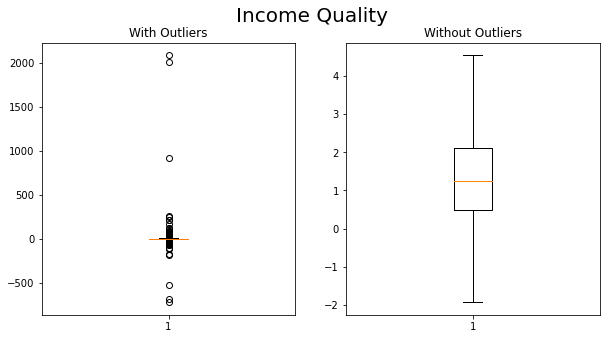

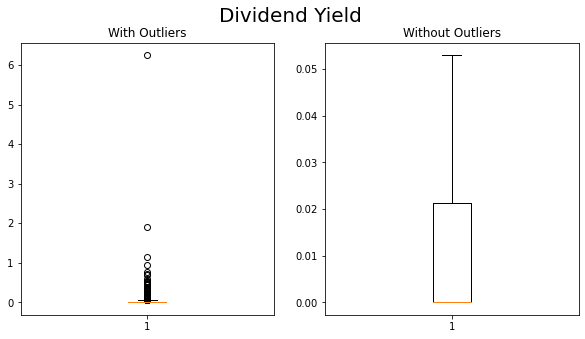

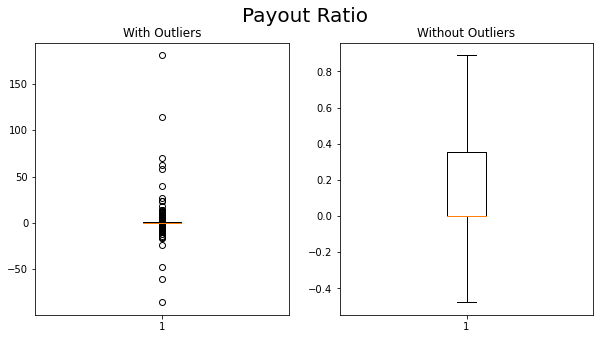

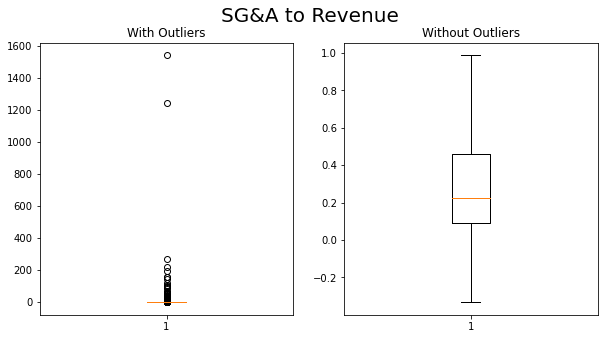

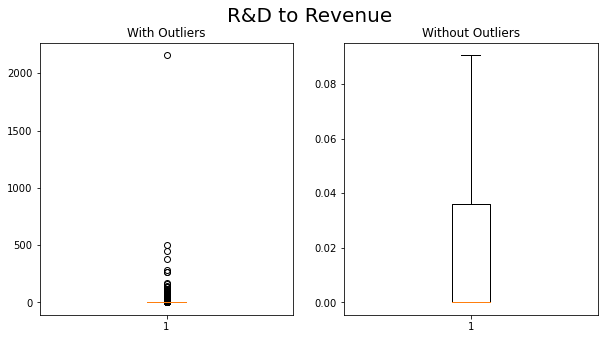

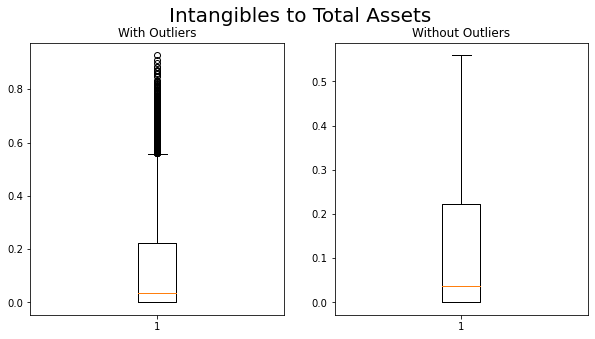

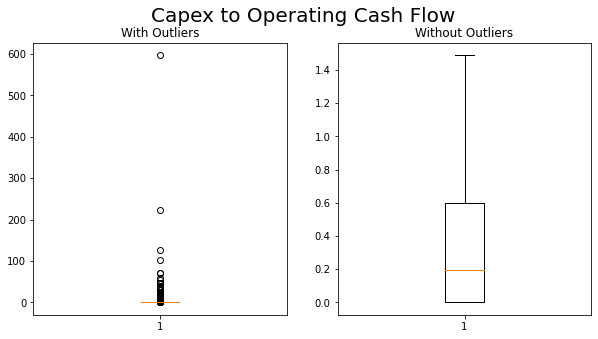

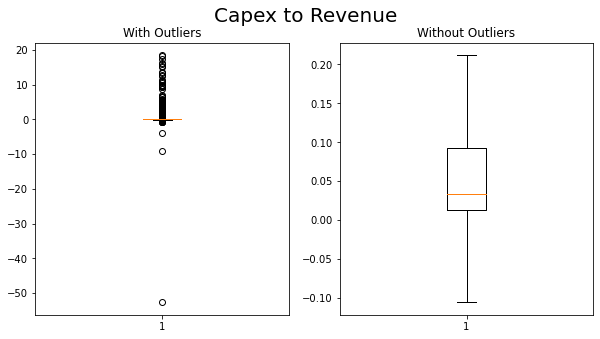

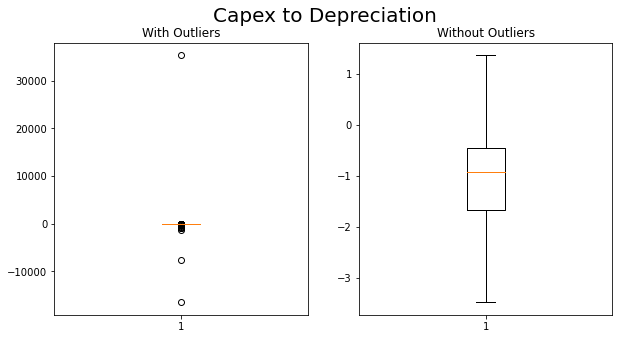

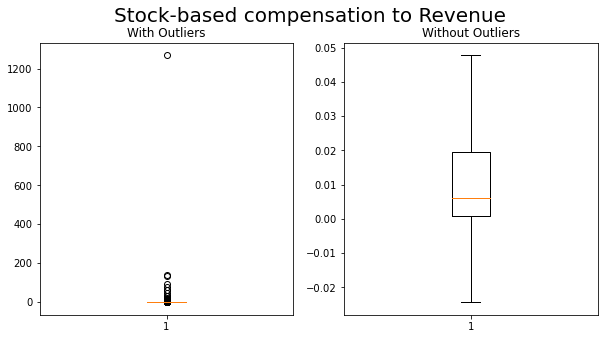

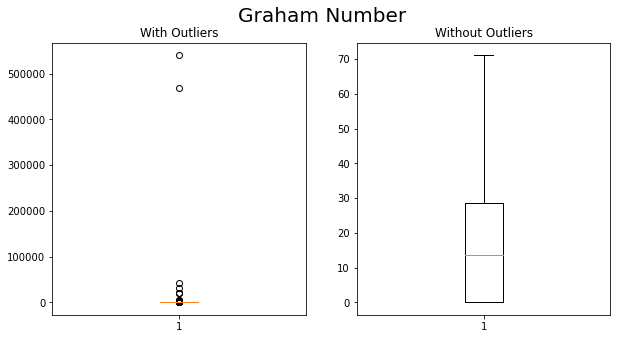

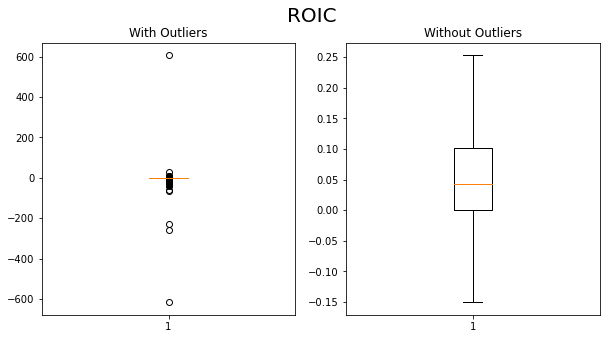

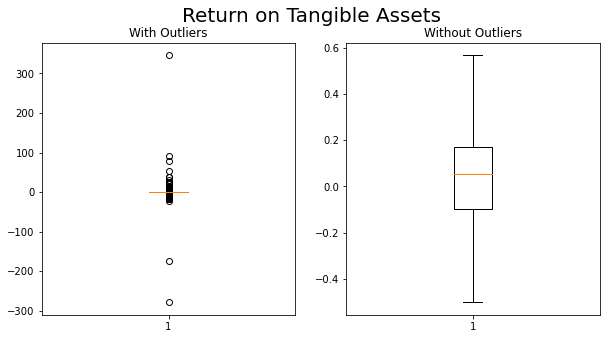

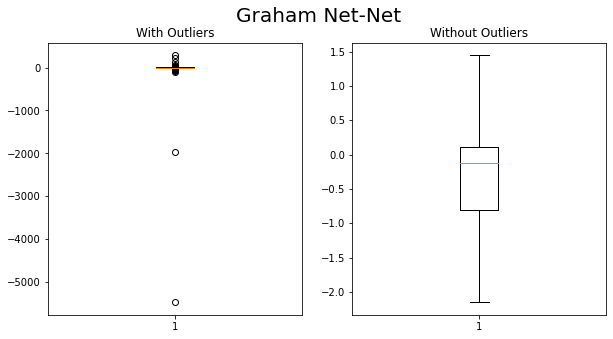

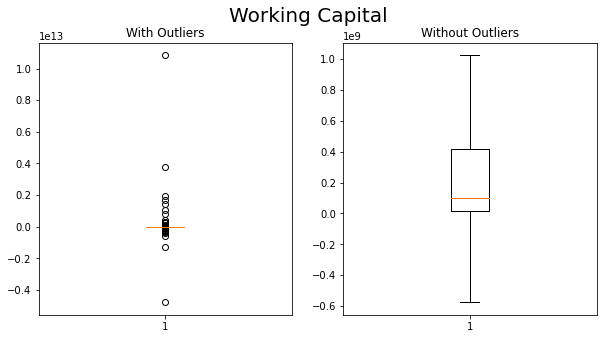

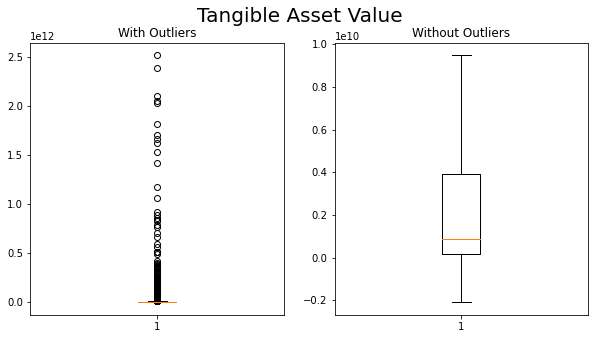

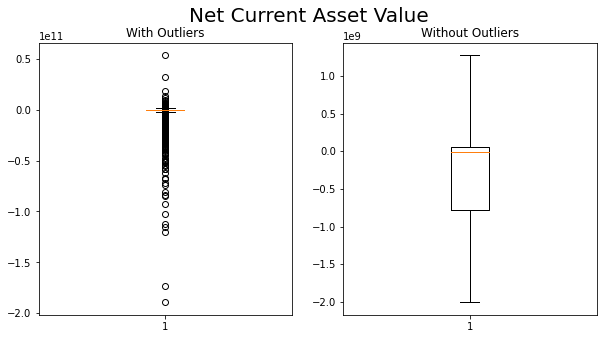

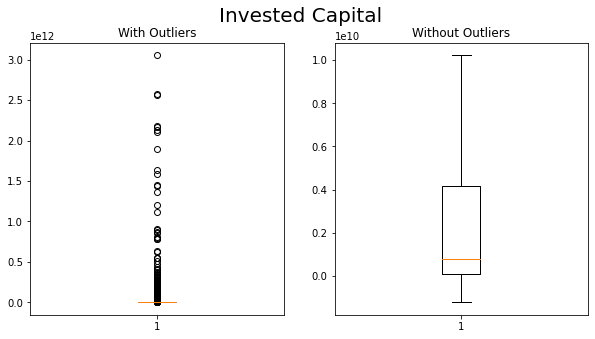

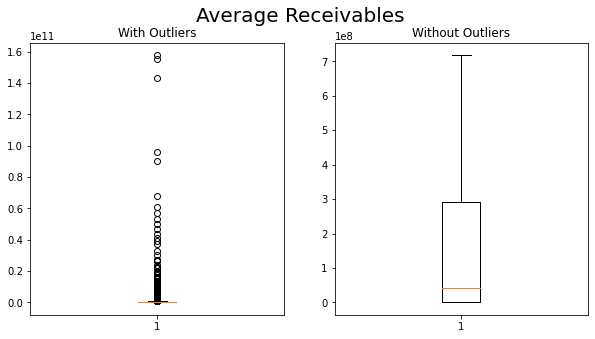

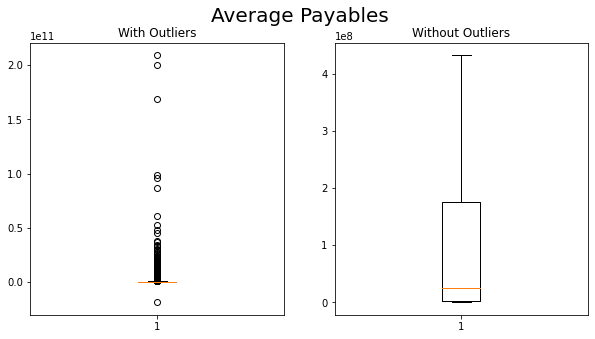

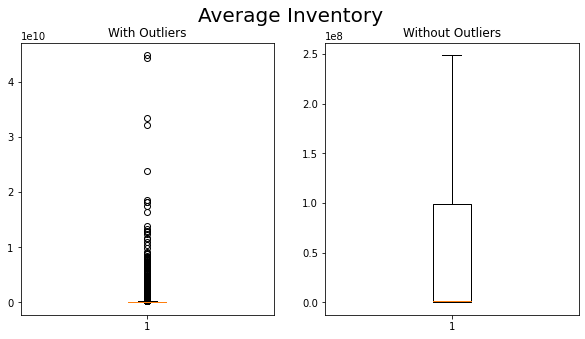

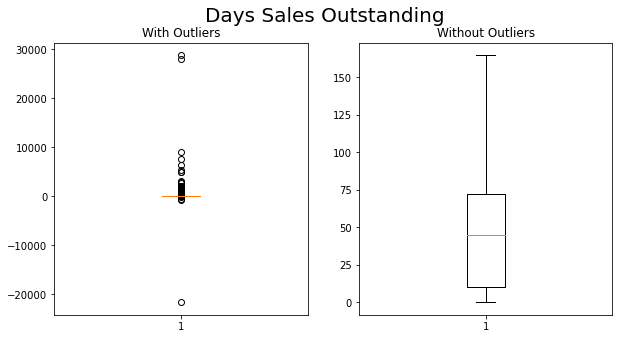

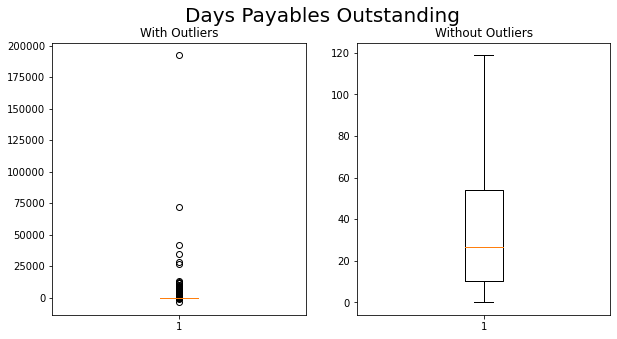

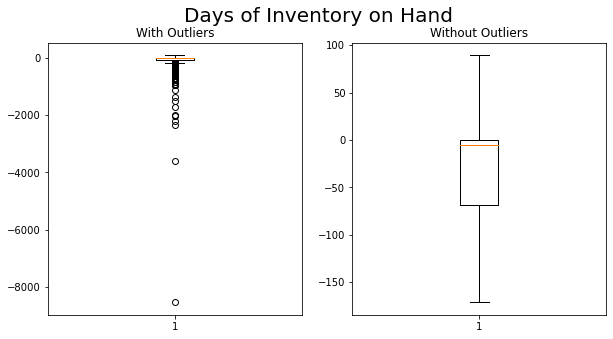

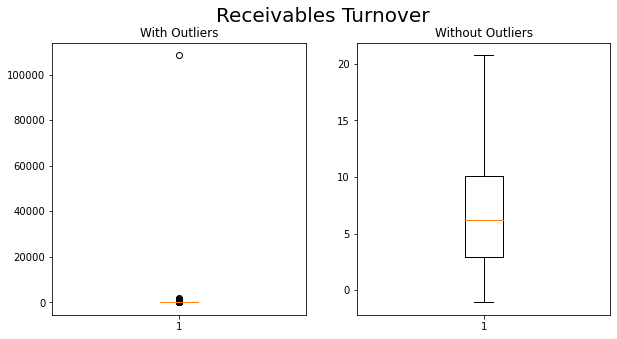

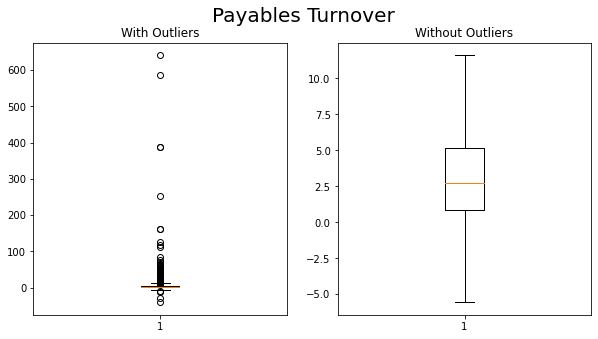

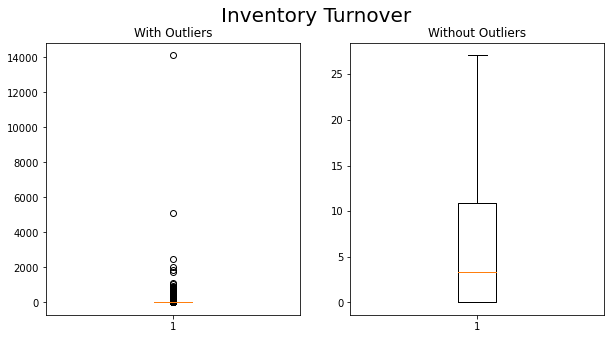

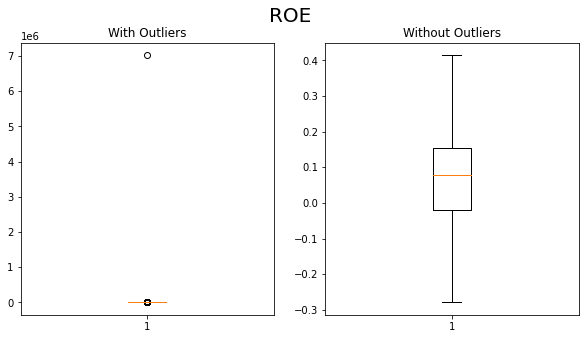

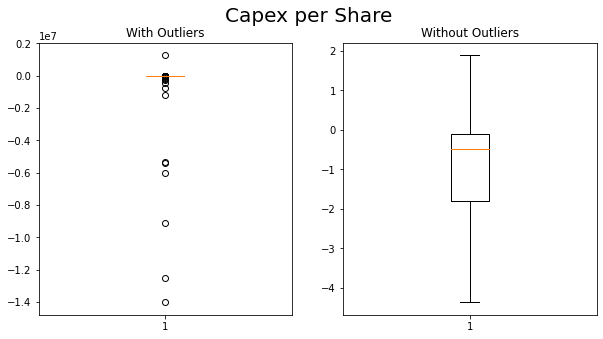

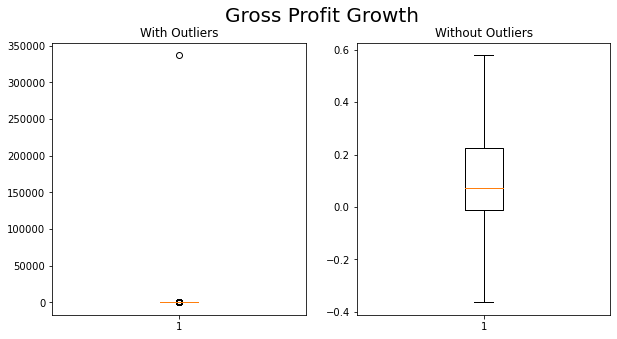

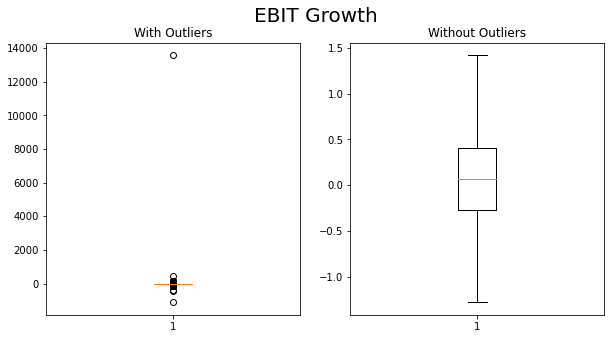

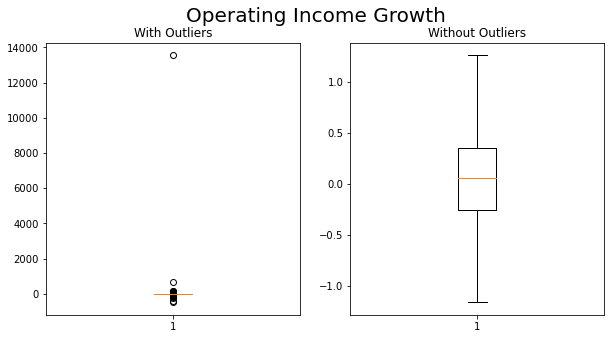

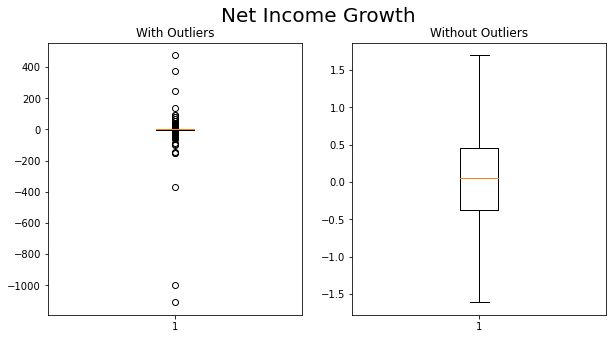

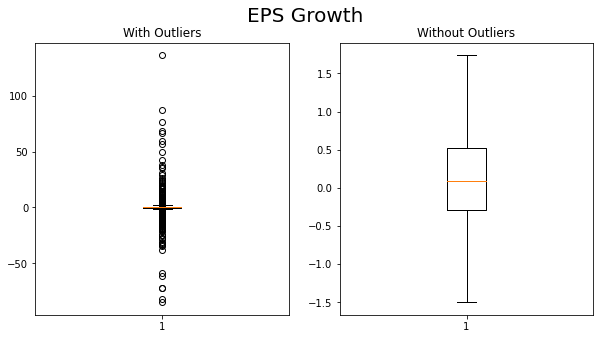

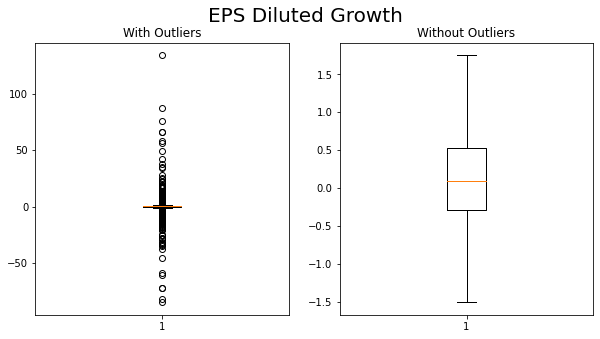

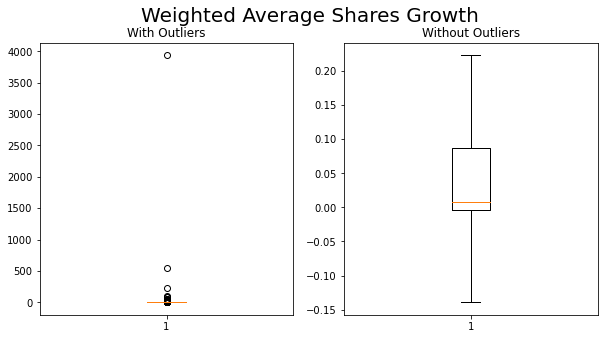

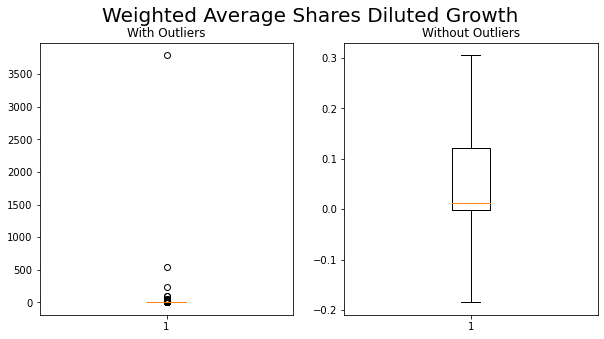

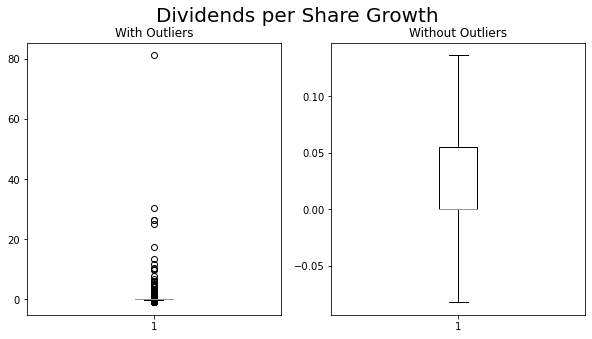

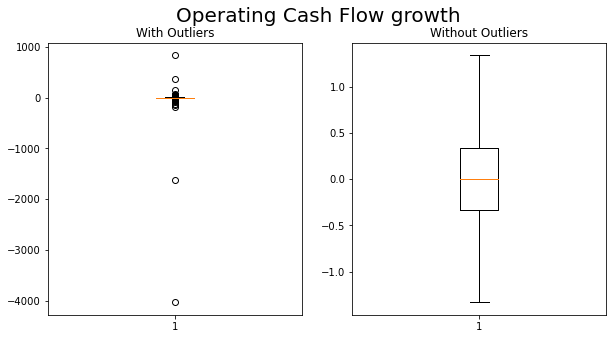

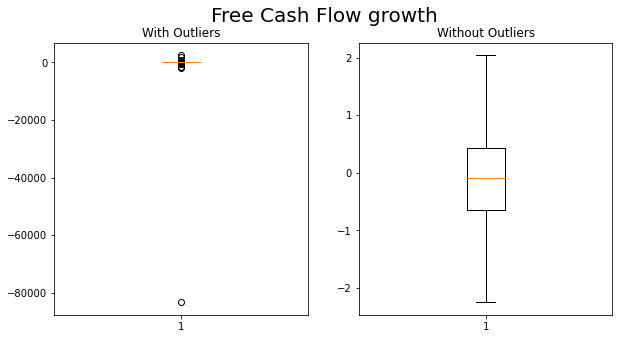

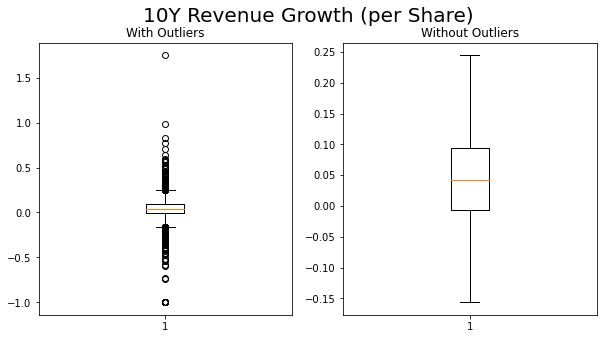

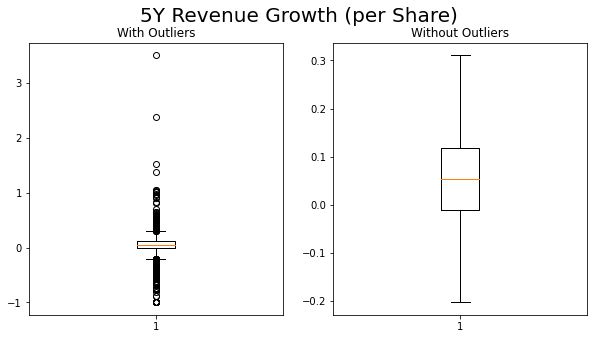

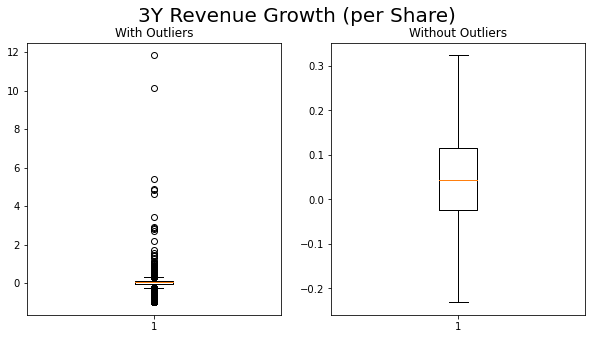

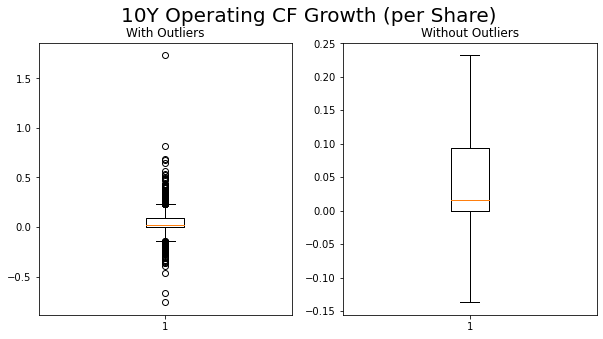

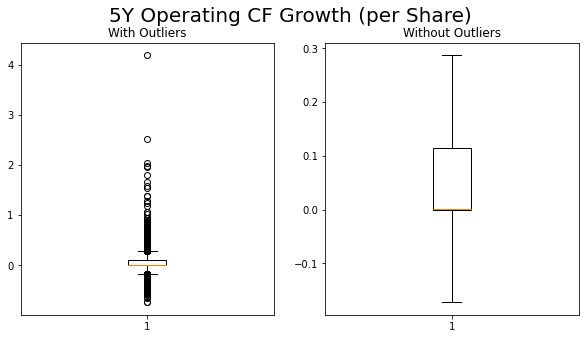

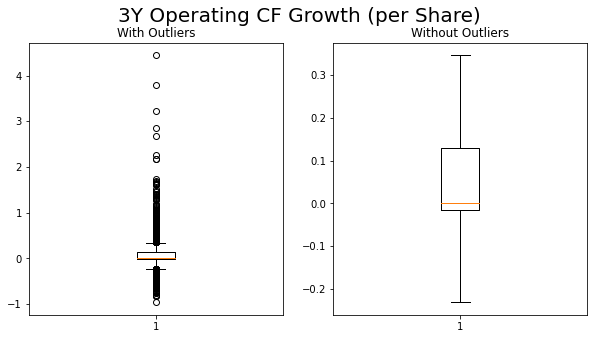

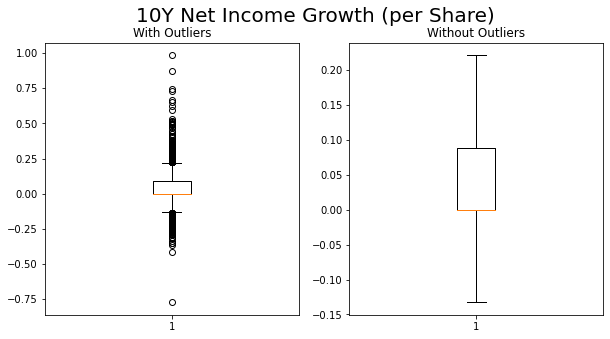

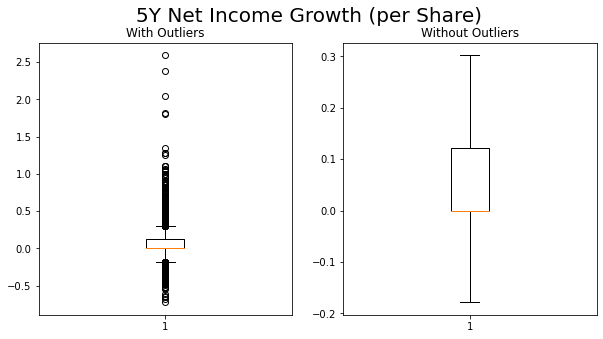

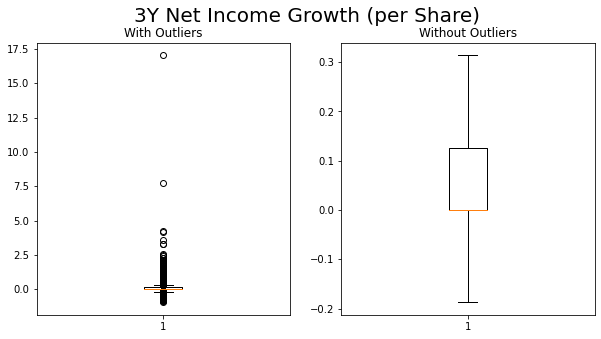

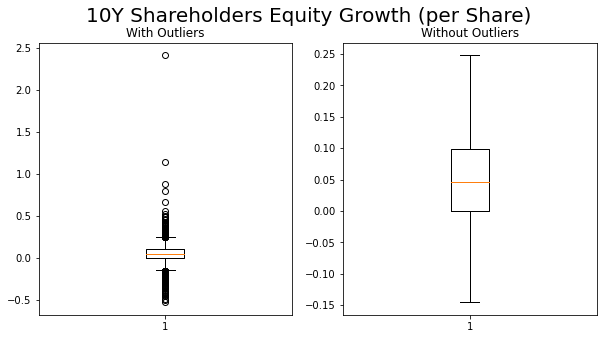

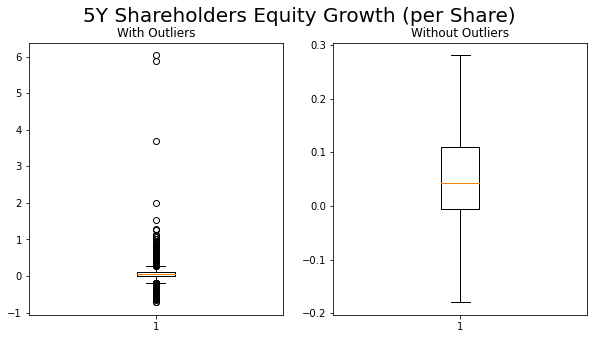

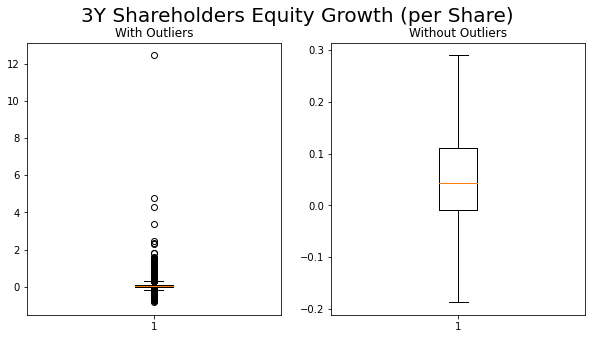

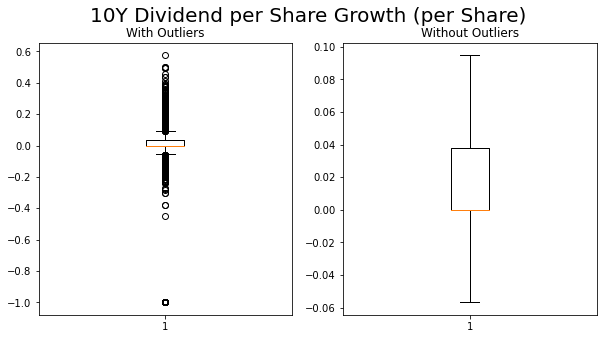

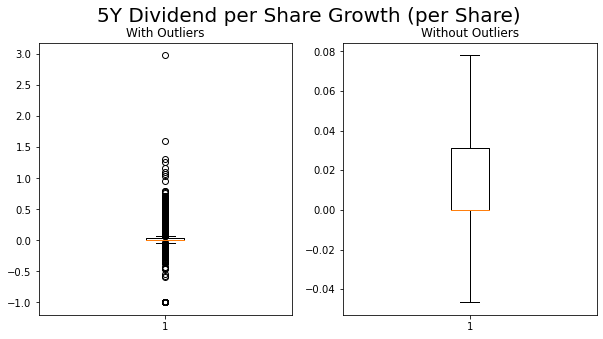

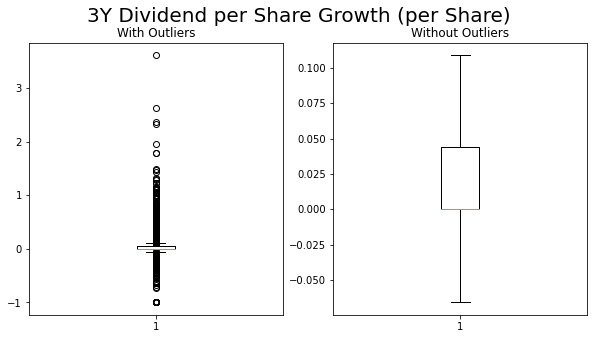

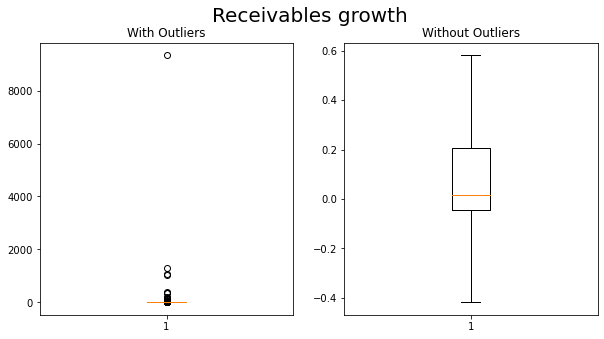

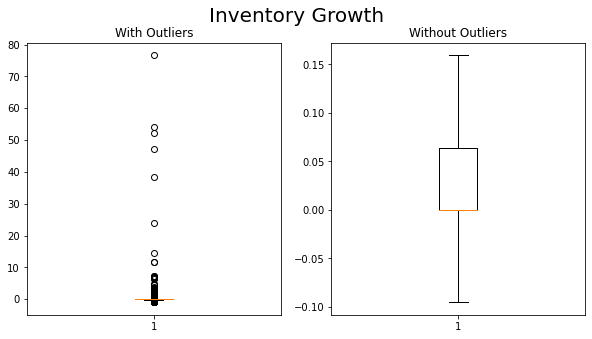

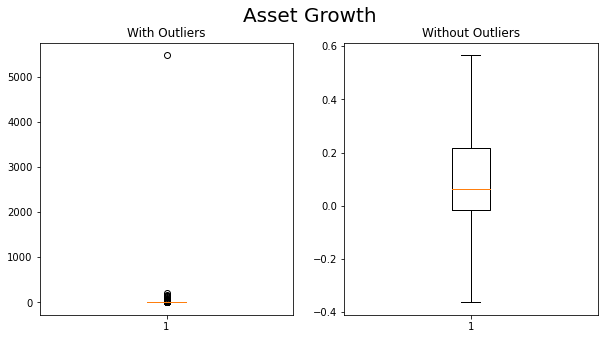

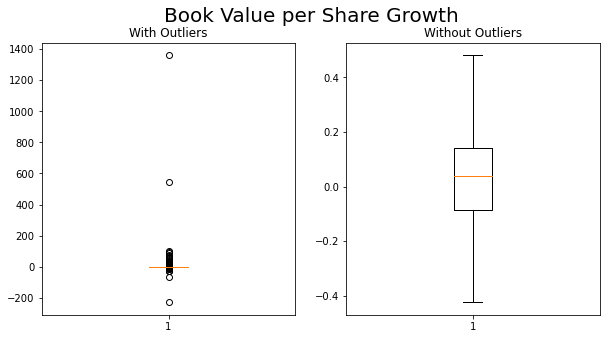

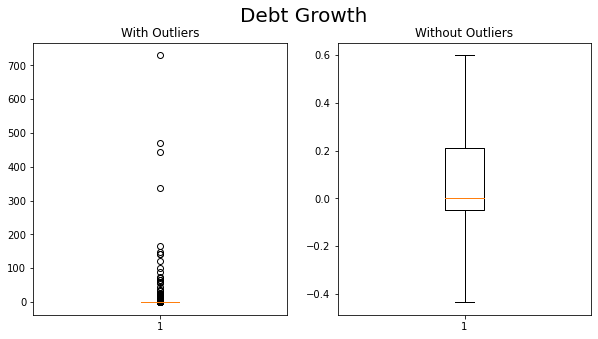

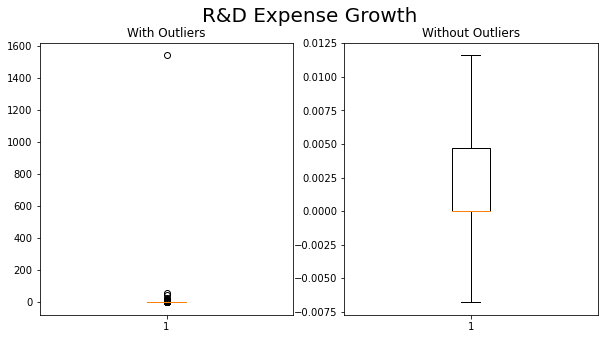

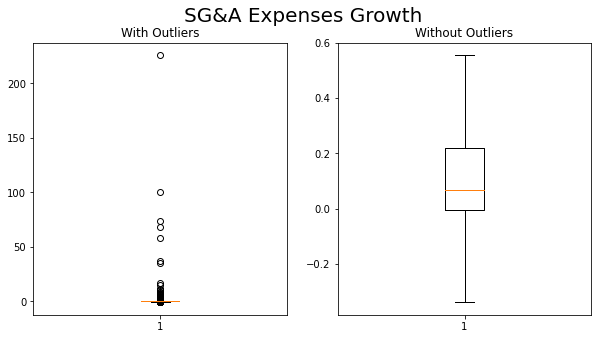

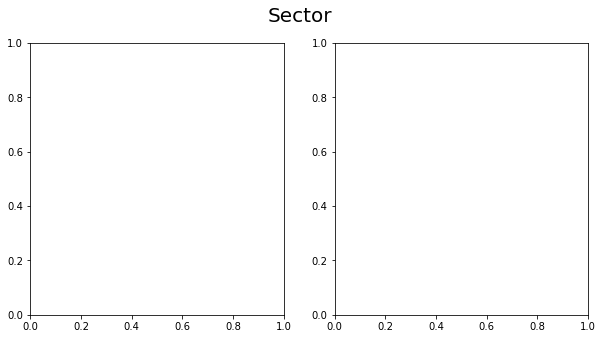

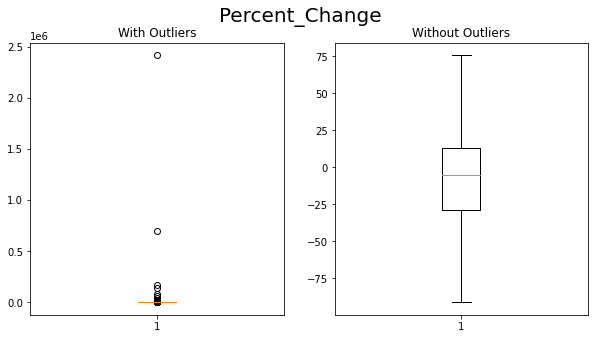

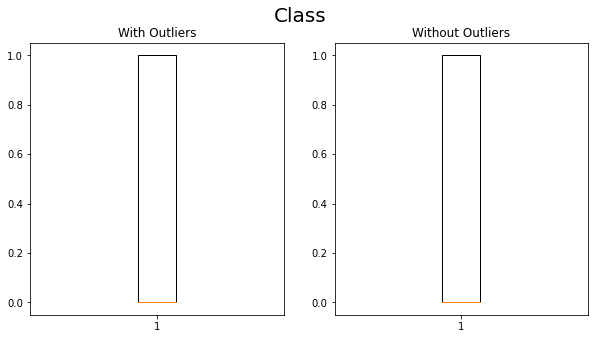

In [26]:
# SYSTEM CODE 
for i in df.columns: 
    try: 
        boxplot_dis(i)
    except: 
        print()

In [27]:
df_exclude(['Class'])

In [28]:
df = clean_IQR()

ERROR: There is a variable/s that have a IQR of 0. Increasing the IQR coefficient will not increase the range for these variables. Remove these variables or try different method to remove outliers.

The variables that have IQR of 0 are: 

Net Income - Non-Controlling int    0.0
Net Income - Discontinued ops       0.0
Preferred Dividends                 0.0
Deposit Liabilities                 0.0
operatingProfitMargin               0.0
operatingCycle                      0.0
cashConversionCycle                 0.0
dtype: float64


In [29]:
# SYSTEM CODE 
df = clean_quantiles(.005, .995)

Dropped 1600 out of 3808 rows.


<a id=2.5></a>
### 5. Handle null values 
- Use boxplots to determine distributions 
- If variable distributions are skewed use median or mode to fill null values
- If variable distributions are normal use mean to fill null values

In [30]:
reset_25 = df.copy()

In [31]:
def sim_drop_col(cut_off_list=[0, 1, 2, 5, 10, 20, 50, 75]):
    '''
    Takes in a list of numbers between 0 and 100 which represent percentages. 
    The numbers are used to determine how many columns will be dropped if they exceed the acceptable amount of missing values which will be determined by the percent specified.
    '''
    print('cut off: acceptable missing value percent per column\nsum: the sum of columns in the dataset that are above the cut off\n')
    print(f'cut off\t\tsum\n{25 * "-"}', end='')
    
    for i in cut_off_list: 
        num_dropped = ((df.isnull().sum(axis=0) / df.shape[0] * 100) > i).sum()
        print(f'\n{i}%\t\t{num_dropped}', end='')    
    
    print(f'\n{25 * "-"}\nout of {df.shape[1]} columns')

In [32]:
def drop_col(percent_cut):
    '''
    Takes a percentage that will be used to determine how many missing values in a column is acceptable. 
    The columns that exceed the number of acceptable values are dropped from the dataframe.
    The dataframe is returned.
    '''
    df_copy = df.copy()
    
    cut_off = df_copy.shape[0] * percent_cut
   
    for i in df_copy.columns: 
        if df_copy[i].isnull().sum() > cut_off: 
            df_copy.drop(i, axis=1, inplace= True)
            
    diff = df.shape[1] - df_copy.shape[1]
    print(f'With {int(percent_cut * 100)}% cut off dropped {diff} out of {df.shape[1]} columns.')
    
    return df_copy

In [33]:
def sim_drop_row(cut_off_list=[0, 1, 2, 5, 10, 20, 50, 75]):
    '''
    Takes in a list of numbers between 0 and 100 which represent percentages. 
    The numbers are used to determine how many rows will be dropped if they exceed the acceptable amount of missing values which will be determined by the percent specified..
    '''
    print('cut off: acceptable missing value percent per row\nsum: the sum of rows in the dataset that are above the cut off\n')
    print(f'cut off\t\tsum\n{25 * "-"}', end='')
    
    for i in cut_off_list: 
        num_dropped = ((df.isnull().sum(axis=1) / df.shape[1] * 100) > i).sum()
        print(f'\n{i}%\t\t{num_dropped}', end='')    
    
    print(f'\n{25 * "-"}\nout of {df.shape[0]} rows')

In [34]:
def drop_row(percent_cut):
    '''
    Takes a percentage that will be used to determine what how many missing values in a row is acceptable. 
    The rows that exceed the number of acceptable missing values are dropped from the dataframe.
    The dataframe is returned.
    '''
    df_copy = df.copy()
    
    cut_off = df_copy.shape[1] * percent_cut

    for i in df_copy.index: 
        if df_copy.loc[i].isnull().sum() > cut_off: 
            df_copy.drop(i, axis=0, inplace= True)
            
    diff = df.shape[0] - df_copy.shape[0]
    print(f'With {int(percent_cut * 100)}% cut off dropped {diff} out of {df.shape[0]} rows.')
    
    return df_copy    

In [35]:
def fill_null(method='median'): 
    '''
    Takes in a string that is "mean", "median", "mode" or an arguement of the method parameter for fillna(). 
    The null values are filled in with either the mean, median, mode or method specified. 
    A dataframe is returned with the null values filled in.
    '''
    if method == 'mean': df_copy = df.fillna(df.mean())
    elif method == 'median': df_copy = df.fillna(df.median())
    elif method == 'mode': df_copy = df.fillna(df.mode())
    else: 
        df_copy = df.fillna(method=method)
        df_copy.fillna(df.median(), inplace=True)       # for it there are left over null values (Ex. because of 'ffill' or 'bfill')                
    
    return df_copy

### _User Space_

In [36]:
# SYSTEM CODE
sim_drop_row()

cut off: acceptable missing value percent per row
sum: the sum of rows in the dataset that are above the cut off

cut off		sum
-------------------------
0%		2208
1%		1835
2%		1530
5%		1196
10%		873
20%		185
50%		110
75%		47
-------------------------
out of 2208 rows


In [37]:
# SYSTEM CODE
sim_drop_col()

cut off: acceptable missing value percent per column
sum: the sum of columns in the dataset that are above the cut off

cut off		sum
-------------------------
0%		221
1%		209
2%		184
5%		137
10%		67
20%		48
50%		3
75%		2
-------------------------
out of 225 columns


In [38]:
sim_drop_col([20, 25, 30, 40])

cut off: acceptable missing value percent per column
sum: the sum of columns in the dataset that are above the cut off

cut off		sum
-------------------------
20%		48
25%		32
30%		13
40%		5
-------------------------
out of 225 columns


In [39]:
df = drop_col(0.25)

With 25% cut off dropped 32 out of 225 columns.


In [40]:
sim_drop_row([20, 25, 30])

cut off: acceptable missing value percent per row
sum: the sum of rows in the dataset that are above the cut off

cut off		sum
-------------------------
20%		139
25%		125
30%		120
-------------------------
out of 2208 rows


In [41]:
df = drop_row(0.2)

With 20% cut off dropped 139 out of 2208 rows.


In [42]:
# SYSTEM CODE 
df = fill_null('ffill')

<a id=2.6></a>
### 6. Other
#### Some other less common tasks are: 
- transposing dataframes
- joining dataframes
- binning of continous variables 
- creating new variable from orginal variables
- filtering variables

### _User Space_

<a id=3></a>
# EDA

In [43]:
reset_3 = df.copy()

In [44]:
def feat_compared_to_feats(var='Percent_Change', figsize=(100, 100), fig_cols=10, ylim=(None, None), df=df): 
    '''
    Takes string(var) and creates scatter plots with all other variables in the dataframe. 
    Takes tuple(figsize) that defines the figure size. 
    Takes int(figs_col) that defines the number of columns of charts the figure will have. 
    Takes tuple(ylim) that defines top and bottom limits of the y axis for all plots.
    '''
    
    fig_rows = int(df.shape[1] / fig_cols) + (df.shape[1] % fig_cols > 0)

    fig, axs = plt.subplots(fig_rows, fig_cols, sharey=True, figsize=(100, 100))

    x = 0
    for i in range(fig_rows): 
        for ii in range(fig_cols):    
            
            axs[i, ii].scatter(df.iloc[:, x], df[var], alpha=0.2)
            axs[i, ii].set_title(df.columns[x])
            axs[i, ii].set_ylim(ylim)
            axs[i, ii].axhline(color='black', linewidth='1')
            plt.grid()
            x = x + 1

            if x == len(df.columns): break    
        if x == len(df.columns): break



In [45]:
def scatter_freq(x, ylim=(None, None), xlim=(None, None), alpha=0.2, figsize=(20, 20)):
    '''Creates a scatter plot with a histogram behind it. The y axis is preset to Percent_Change.'''
    fig, ax = plt.subplots(figsize=figsize)

    ax.scatter(df.loc[:, x], df['Percent_Change'], alpha=alpha)
    ax.hist(df[x], bins=1000, alpha=0.1, color='orange')
    ax.set_title(x)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    plt.grid()

### _User Space_

In [46]:
# SYSTEM CODE 
df.shape

(2069, 193)

In [47]:
# SYSTEM CODE 
df.describe()

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
count  2.069000e+03     2069.000000     2.069000e+03  2.069000e+03   
mean   2.543158e+09        0.163767     1.661769e+09  8.814198e+08   
std    7.138523e+09        0.618986     5.745355e+09  1.975065e+09   
min    0.000000e+00       -1.000000     0.000000e+00 -4.862000e+06   
25%    8.875800e+07        0.000000     1.127800e+07  4.699600e+07   
50%    4.957180e+08        0.066600     1.898814e+08  2.082174e+08   
75%    2.086194e+09        0.172800     1.118745e+09  8.032640e+08   
max    1.126400e+11       15.170300     9.845800e+10  2.156900e+10   

       R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
count  2.069000e+03  2.069000e+03        2.069000e+03      2.069000e+03   
mean   3.392382e+07  4.351534e+08        5.821241e+08      2.989560e+08   
std    1.462884e+08  1.199994e+09        1.396192e+09      7.694023e+08   
min    0.000000e+00  0.000000e+00        0.000000e+00     -4.197000e+08   
25%    0.000000e+00  2.132100e+07        4.137800e+07      4.235000e+06   
50%    0.000000e+00  8.259000e+07        1.488190e+08      5.623100e+07   
75%    8.868053e+06  3.260000e+08        5.074000e+08      2.498150e+08   
max    1.979419e+09  1.799200e+10        1.751200e+10      1.190900e+10   

       Interest Expense  Earnings before Tax  Income Tax Expense  \
count      2.069000e+03         2.069000e+03        2.069000e+03   
mean       4.944420e+07         2.559216e+08        7.605753e+07   
std        1.324416e+08         6.949761e+08        2.179989e+08   
min       -1.379000e+06        -6.079930e+08       -2.060000e+08   
25%        0.000000e+00         2.739000e+06        1.899670e+05   
50%        3.045000e+06         4.284800e+07        8.607000e+06   
75%        3.581200e+07         1.964000e+08        5.190000e+07   
max        1.451000e+09         9.580000e+09        3.053000e+09   

       Net Income - Non-Controlling int  Net Income - Discontinued ops  \
count                      2.069000e+03                   2.069000e+03   
mean                       4.406196e+06                  -1.645140e+06   
std                        2.548355e+07                   2.476030e+07   
min                       -8.089400e+07                  -4.221184e+08   
25%                        0.000000e+00                   0.000000e+00   
50%                        0.000000e+00                   0.000000e+00   
75%                        0.000000e+00                   0.000000e+00   
max                        4.020751e+08                   1.720000e+08   

         Net Income  Preferred Dividends  Net Income Com          EPS  \
count  2.069000e+03         2.069000e+03    2.069000e+03  2069.000000   
mean   1.799291e+08         1.185315e+06    1.787820e+08     0.192592   
std    4.924361e+08         7.138687e+06    4.922088e+08    13.108174   
min   -6.706590e+08         0.000000e+00   -6.706590e+08  -441.000000   
25%    1.956000e+06         0.000000e+00    1.782101e+06     0.110000   
50%    3.048400e+07         0.000000e+00    3.020000e+07     0.960000   
75%    1.476580e+08         0.000000e+00    1.454400e+08     2.040000   
max    6.527000e+09         1.382740e+08    6.527000e+09    26.160000   

       EPS Diluted  Weighted Average Shs Out  Weighted Average Shs Out (Dil)  \
count  2069.000000              2.069000e+03                    2.069000e+03   
mean      0.155217              1.119098e+08                    1.089439e+08   
std      13.119113              2.860366e+08                    2.826409e+08   
min    -441.000000              6.877800e+04                    4.592700e+04   
25%       0.110000              1.729671e+07                    1.605200e+07   
50%       0.940000              4.079964e+07                    3.933400e+07   
75%       2.020000              1.016653e+08                    9.883500e+07   
max      25.910000              5.881685e+09                    5.881685e+09   

       Dividend per Share  Gross Margin  EBITD

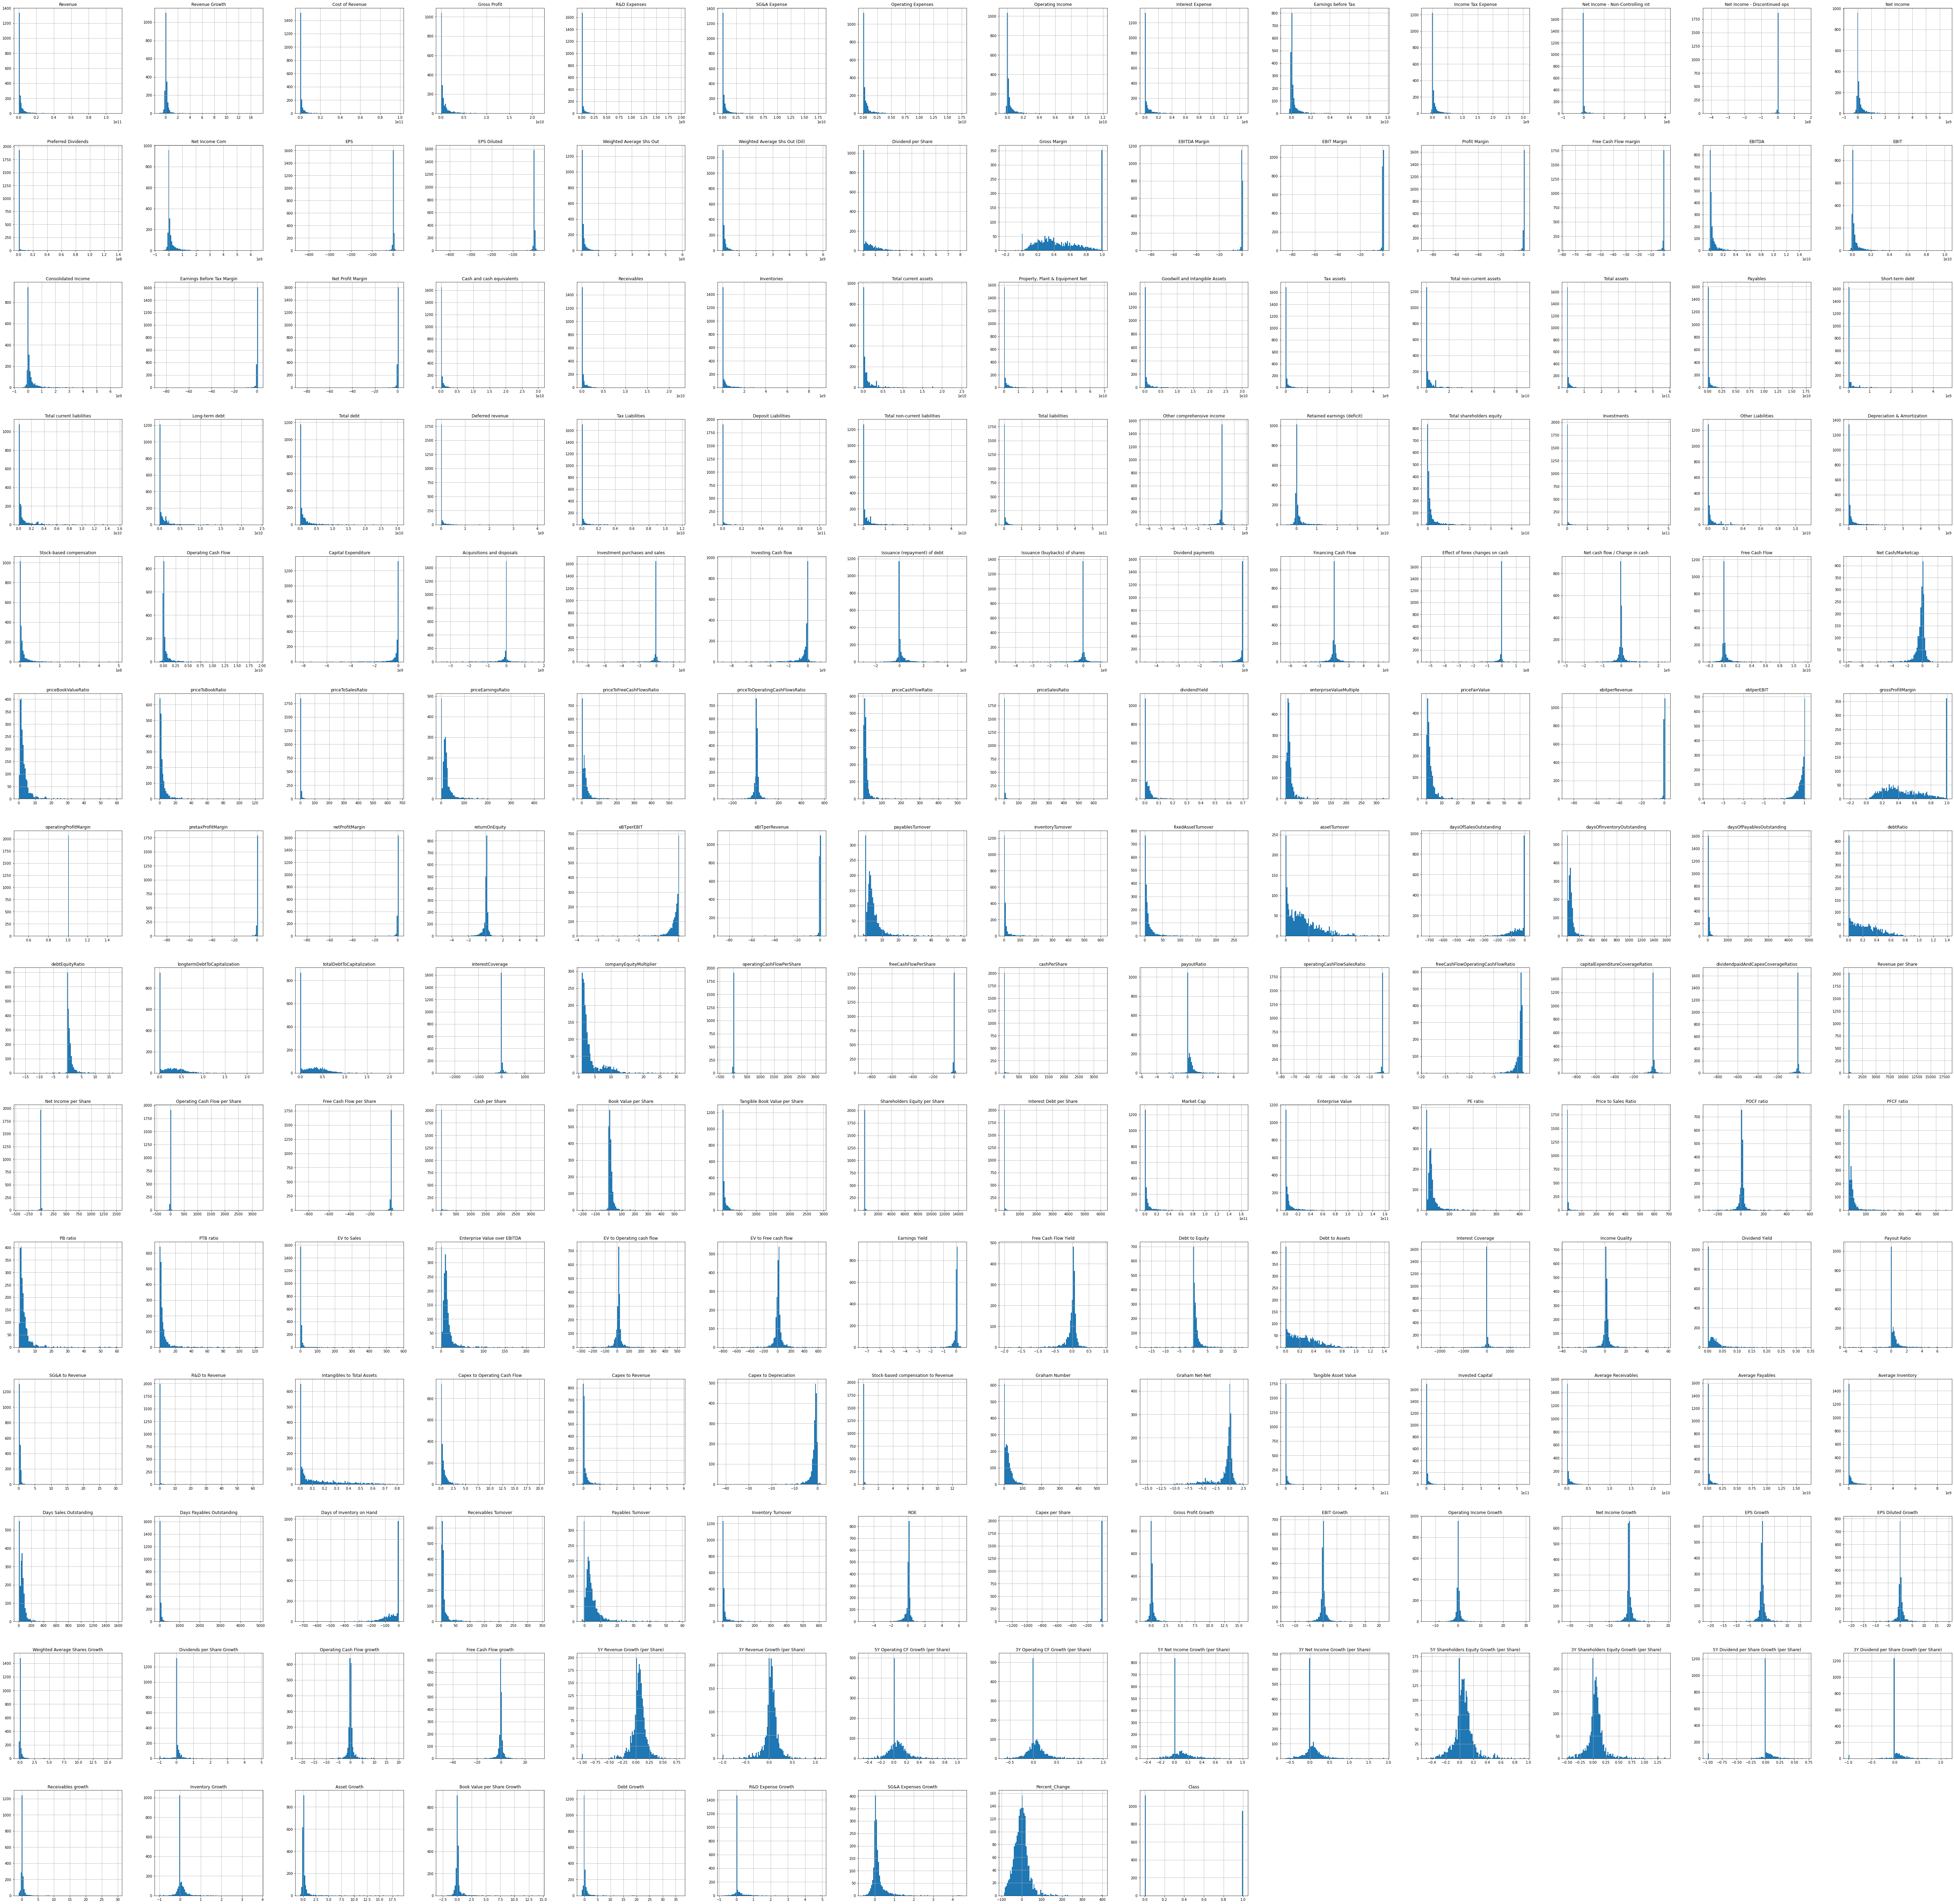

In [48]:
# SYSTEM CODE
df.hist(figsize=(100, 100), bins=100)
plt.show()

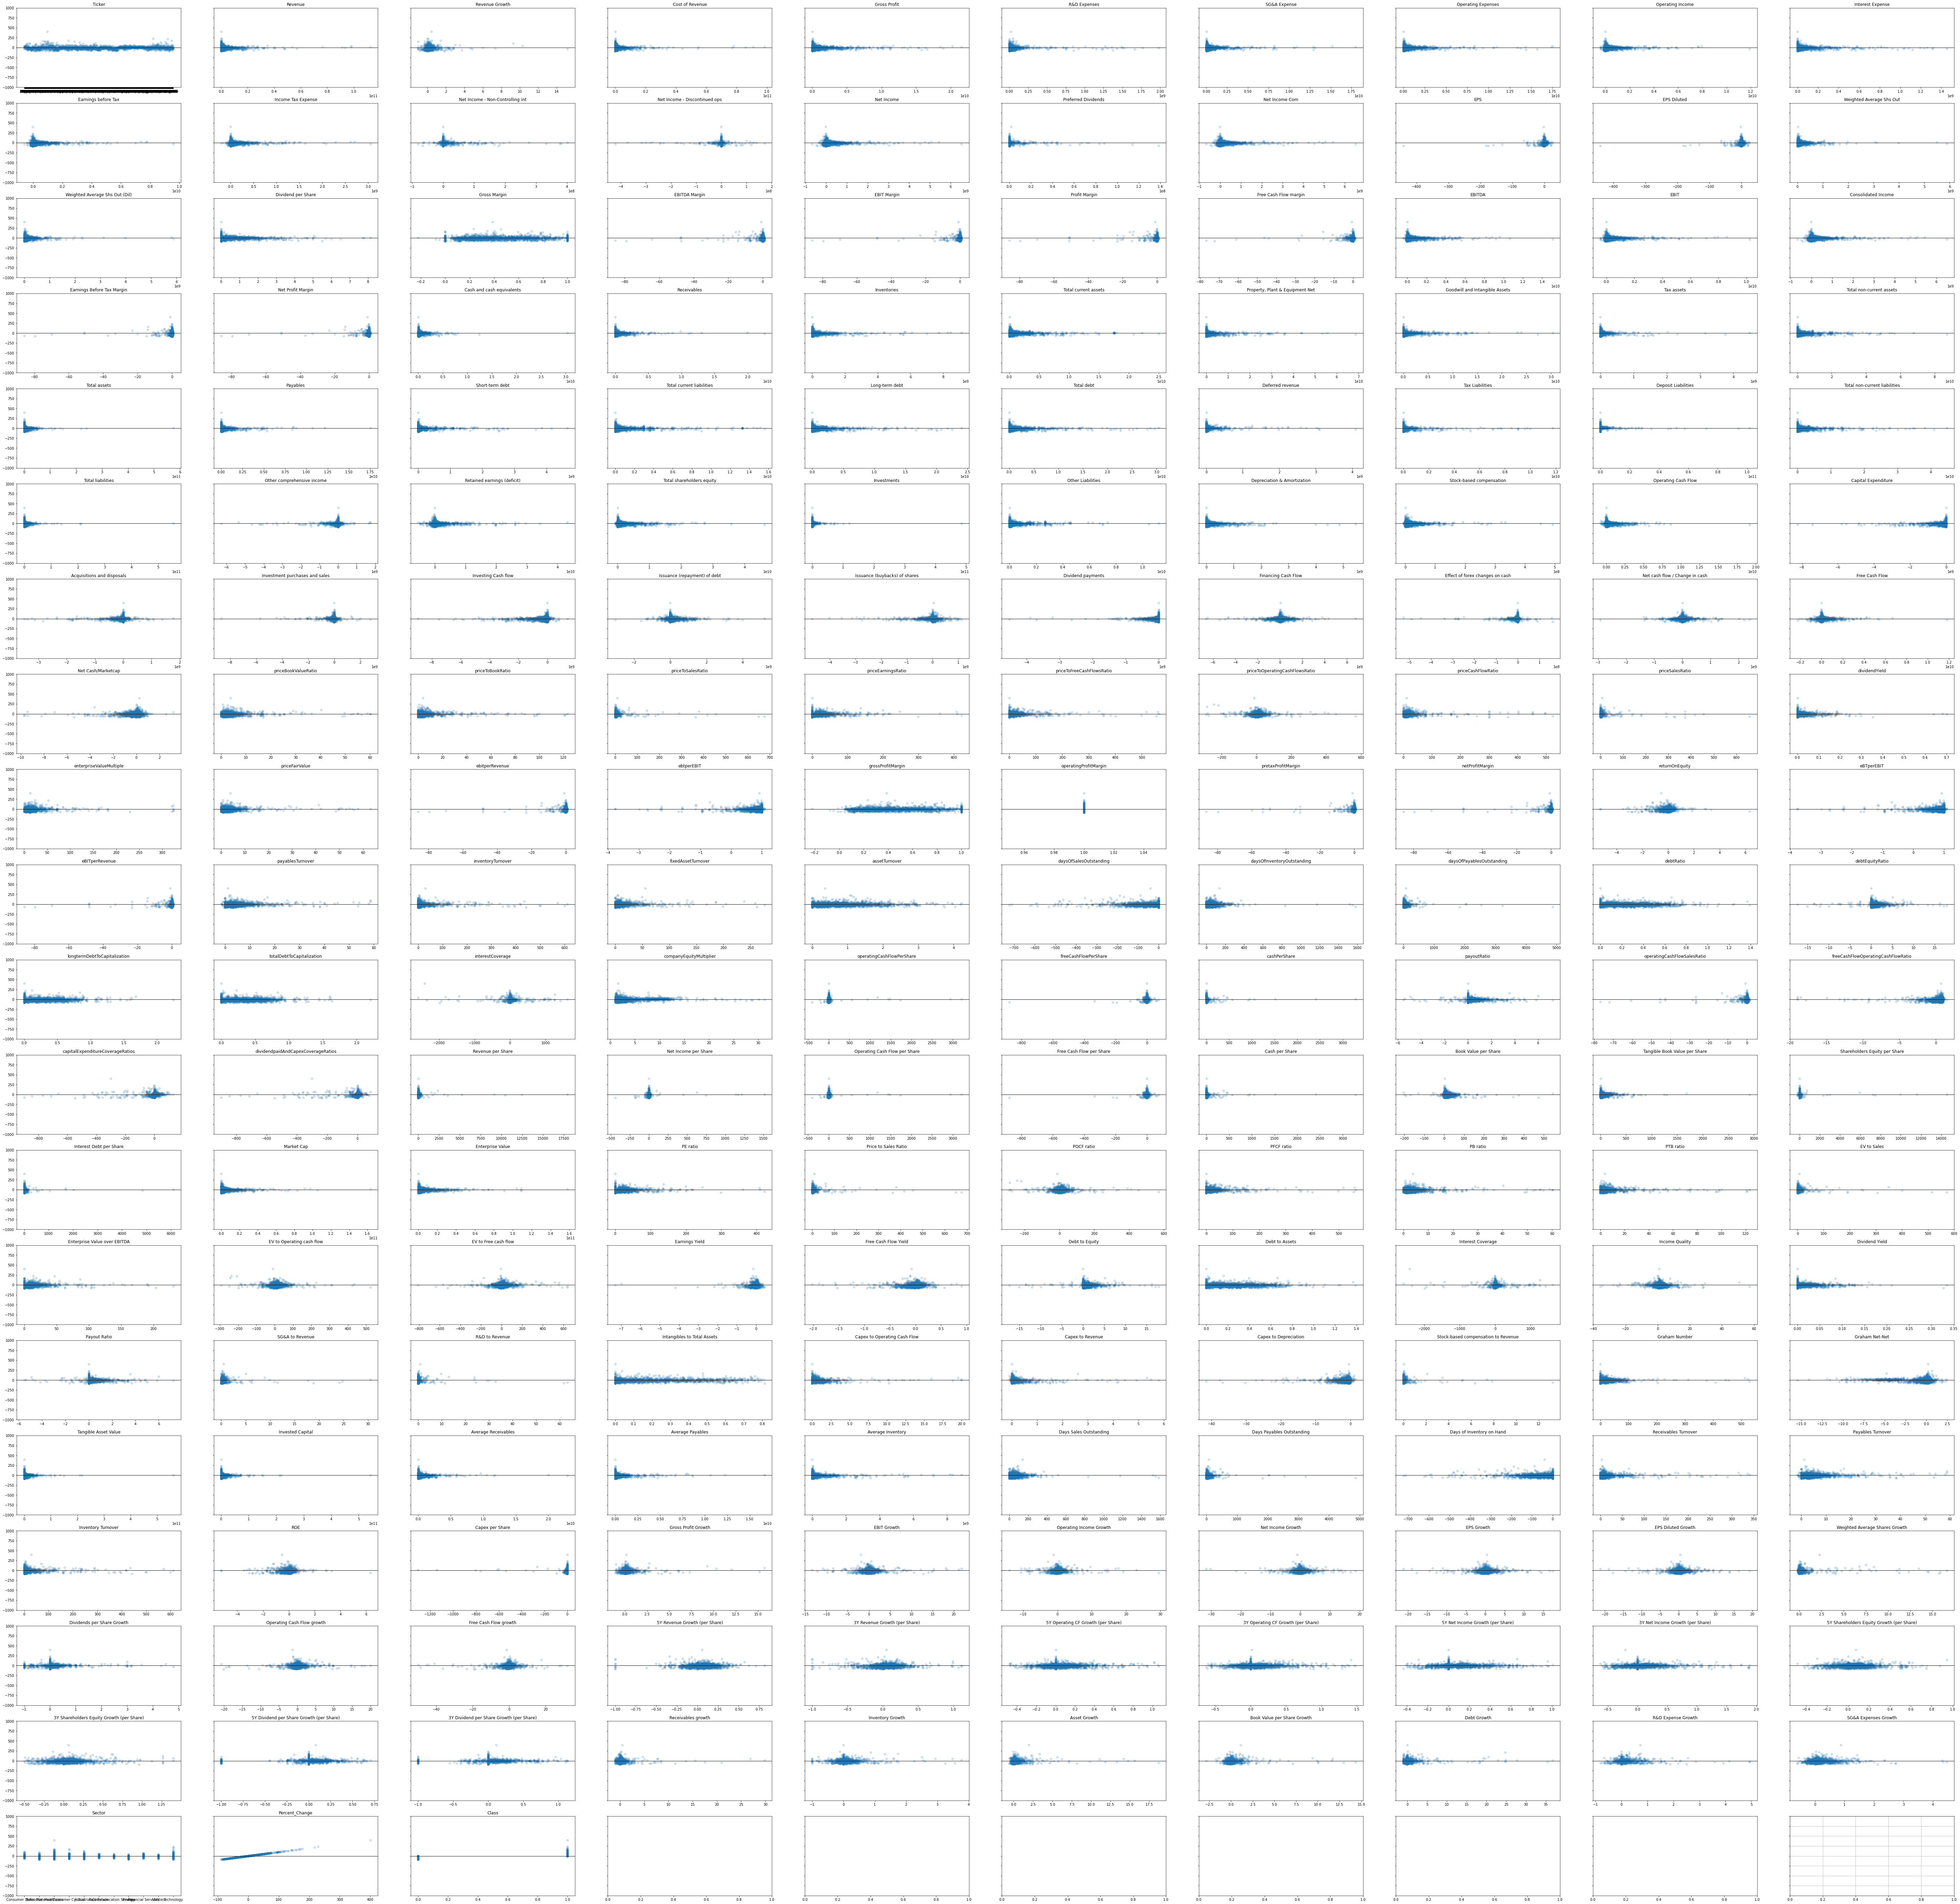

In [49]:
feat_compared_to_feats(ylim=(-1000, 1000))

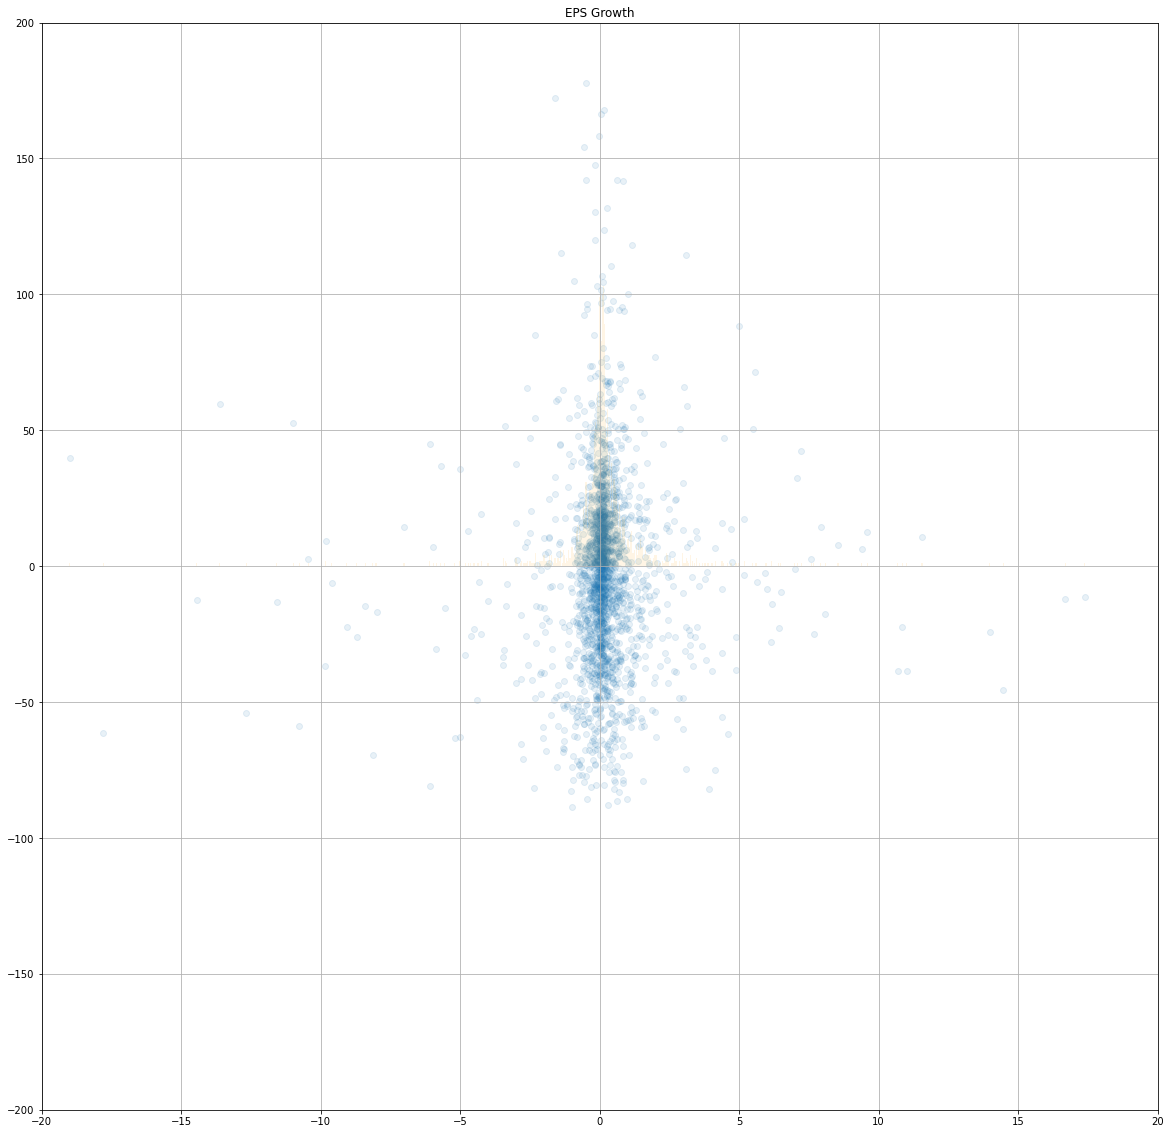

In [50]:
scatter_freq('EPS Growth', ylim=(-200, 200), xlim=(-20, 20), alpha=0.1)

In [51]:
df.Sector.value_counts()

Financial Services        370
Technology                339
Industrials               309
Consumer Cyclical         265
Healthcare                259
Basic Materials           134
Real Estate               109
Consumer Defensive         93
Energy                     93
Utilities                  64
Communication Services     34
Name: Sector, dtype: int64

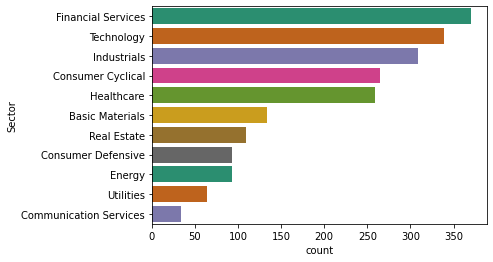

In [52]:
sns.countplot(y = df.Sector, order = df['Sector'].value_counts().index, palette='Dark2')
plt.show()

0: price change was negative
1: price change was positive


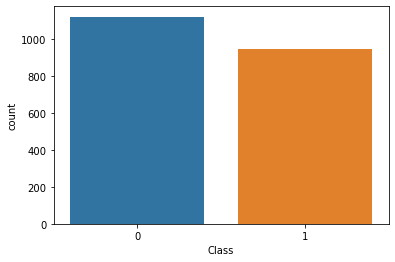

In [53]:
print('0: price change was negative\n1: price change was positive')
sns.countplot(x=df.Class)
plt.show()

In [54]:
print('Feature: Percent Change')
print('Range:', df.Percent_Change.min(),'to', df.Percent_Change.max())

Feature: Percent Change
Range: -88.6363638826638 to 400.677598829958


<a id=4></a>
# Analysis 
- There are Supervised Learning machine learning algorithms which are further divided into Classification and Regression
- A few common ones are: 
    - Linear Regression (regression algorithm) 
    - Logistic Regresion (classification algorithm) 
    - Polynomial Regression
    - SVR
- Then there is Unspervised Learning machine learning algorithms which are clustering algorithms
- A few common ones are: 
    - PCA (Principal Component Analysis) 
    - KNN (K-nearest neighbors algorithms) 
- Other algorithms can be used as either classification or regression such as RandomForest

In [55]:
reset_4 = df.copy()

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [57]:
def RandomForest_plot(pos_X, pos_y, Title=None, run_KFold=False, random_state=0): 
    '''
    Takes in X variables and y variables and then fits them to Random Forest and returns two charts and their respective R squared scores.
    Also calculates KFold score if it is changed to True.
    Takes in random_state int for train_test_split.
    '''
    global y_pred_test
    global y_test
    global results
    global X_test
    
    X_train, X_test, y_train, y_test = train_test_split(pos_X, pos_y, random_state=random_state)

    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

    regressor.fit(X_train, y_train)

    y_pred_train = regressor.predict(X_train)
    y_pred_test = regressor.predict(X_test)

    result_train = regressor.score(X_train, y_train)
    result_test = regressor.score(X_test, y_test)
    print(Title)
    print(f'R squared Score for train: {result_train}\nR squared Score for test: {result_test}')
    
    if run_KFold == True: 
        kfold_validation = KFold(9)   # the tenth is added from the previous test score 
        results=cross_val_score(regressor,X, y, cv=kfold_validation)
        results = np.append(results, result_test)
        print(f'Kfold (average of 10): {results.mean()}')
        print(results, '\n')
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    plt.suptitle(Title, fontsize=20)
    axs[0].scatter(y_train, y_pred_train, alpha=0.2)
    axs[0].set_title('Train')
    axs[0].set_xlabel('Actual Value')
    axs[0].set_ylabel('Predicted Value')
    axs[0].axhline(color='black', linewidth=1)
    axs[0].axvline(color='black', linewidth=1)
    axs[0].grid()
    axs[1].scatter(y_test, y_pred_test, alpha=0.2)
    axs[1].set_title('Test')
    axs[1].set_xlabel('Actual Value')
    axs[1].axhline(color='black', linewidth=1)
    axs[1].axvline(color='black', linewidth=1)
    axs[1].grid()

In [58]:
# run after RandomForest_plot 
def percent_made_and_actual(num_top_stocks=[5, 10, 20, 30, 40, 50, 100]):
    '''Takes in a list of numbers that will be used to determine the average predicted and actual percent change of the respective number of stocks.'''
    global avg_percents 
    global y_compare
    
    y_compare = pd.DataFrame(y_test)
    y_compare.rename(columns={'Percent_Change': 'Actual'}, inplace=True)
    y_compare['Predicted'] = y_pred_test
    
    percent_made = y_compare[y_compare['Predicted'] > 0]

    percent_made = percent_made.sort_values(by='Predicted', ascending=False)
    
    avg_percents = []
    for i in num_top_stocks: 
        avg_percents.append(percent_made.iloc[:i].mean())
    
    avg_percents = pd.DataFrame(avg_percents)
    df_index = pd.DataFrame(num_top_stocks, columns=['Top'])
    avg_percents= avg_percents.join(df_index)
    avg_percents = avg_percents[['Top', 'Predicted', 'Actual']]

    print('Shows the averages of the predicted value and the actual value of the top stocks with the highest predicted percent increase\n')
    print('\t      Averages\n\t' + '-' * 20)
    print(avg_percents)

### _User Space_

In [59]:
df.Sector.value_counts()

Financial Services        370
Technology                339
Industrials               309
Consumer Cyclical         265
Healthcare                259
Basic Materials           134
Real Estate               109
Consumer Defensive         93
Energy                     93
Utilities                  64
Communication Services     34
Name: Sector, dtype: int64

In [60]:
hot_encoded = pd.get_dummies(df['Sector'])
hot_encoded = hot_encoded.drop('Communication Services', axis=1) # Communication Services will not be examined in Sector Analysis because there are so few
df0 = df.join(hot_encoded)

None
R squared Score for train: 0.8632202869723129
R squared Score for test: 0.048124674695470215
Kfold (average of 10): 0.014276148503946807
[-0.05843247 -0.116478   -0.03381481  0.05656325  0.06239846 -0.00931723
  0.08254763  0.15208456 -0.04091459  0.04812467] 



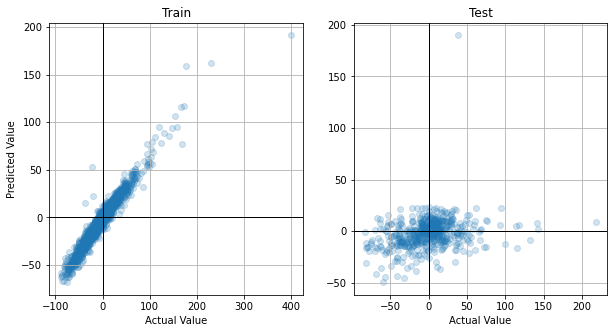

In [61]:
X = df0.drop(['Percent_Change', 'Class', 'Sector', 'Ticker'], axis=1)
y = df0['Percent_Change']

RandomForest_plot(X,y, run_KFold=True)

In [62]:
percent_made_and_actual()

Shows the averages of the predicted value and the actual value of the top stocks with the highest predicted percent increase

	      Averages
	--------------------
   Top  Predicted     Actual
0    5  56.189016  38.116311
1   10  39.127762  16.980627
2   20  29.591757  15.568295
3   30  25.175754  13.023605
4   40  22.463863  11.401698
5   50  20.491174   8.527520
6  100  15.285611  10.076593


<a id=4.1></a>
###### Scale to Feature
Some of these features such as Net Income and anything that is not a ratio would not make sense to compare. This is because the Net Income for a large cap company should be more than that of a small cap company. To fix these values can be scaled to a feature like 'Market Cap' or 'Operating Cash Flow' which would make the numbers comparable across columns.

In [63]:
scale_by = 'Operating Cash Flow'

# find scalable features of data frame
df1 = df0.copy() 
scalable = df1.iloc[: , 1:-13]
scalable.isnull().sum().sum()
scalable = scalable.loc[: , ~scalable.columns.isin(['Revenue Growth', 'EPS', 'EPS Diluted', 'Dividend per Share', 'Gross Margin', 'EBITDA Margin', 'EBIT Margin', 'Profit Margin', 'Free Cash Flow margin','Earnings Before Tax Margin', 'Net Profit Margin', 'Net cash flow / Change in cash', 'Net Cash/Marketcap'])]
exclude = scalable.loc[:, 'priceBookValueRatio': 'Interest Debt per Share']
scalable = scalable.loc[:, ~scalable.columns.isin(exclude)]
scalable.drop(scalable.loc[:, 'PE ratio': 'SG&A Expenses Growth'].columns, axis=1, inplace=True)

# scale scalable features 
scaled = scalable.div(scalable[scale_by], axis=0)
scaled = scaled * scalable[scale_by].mean()   

# replace columns with scaled columns 
for i in df1.columns:
    for ii in scaled.columns:
        if i == ii:
            df1[i] = scaled[ii]

None
R squared Score for train: 0.8659367215488731
R squared Score for test: 0.11190196377293604
Kfold (average of 10): 0.0303749091155023
[-0.05161155 -0.12510483 -0.03623272  0.01283564  0.07539367  0.04304478
  0.0975432   0.22866741 -0.05268849  0.11190196] 



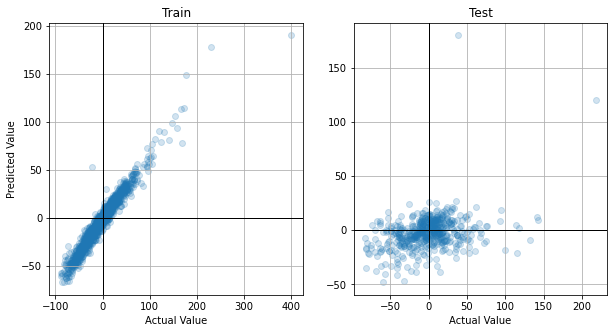

In [64]:
X = df1.drop(['Percent_Change', 'Class', 'Sector', 'Ticker'], axis=1)
y = df1['Percent_Change']

RandomForest_plot(X, y, run_KFold=True)

In [65]:
percent_made_and_actual()

Shows the averages of the predicted value and the actual value of the top stocks with the highest predicted percent increase

	      Averages
	--------------------
   Top  Predicted     Actual
0    5  75.906692  60.486081
1   10  48.910599  42.766458
2   20  33.620633  34.327995
3   30  27.610814  23.553321
4   40  24.203589  17.707763
5   50  21.896805  15.807707
6  100  15.859829  14.050545


<a id=4.2></a>
###### Sector Only (Analysis) 

In [66]:
def sector_RandomForest(sector, run_KFold=False): 
    '''Takes in a string of the sector that is to be run through a RandomForest algorithm. Can run KFold to verify results using different training and testing sets.'''
    df2 = df1[df1[sector]==1]
    df2.drop(hot_encoded.columns, axis=1, inplace=True)
    X = df2.drop(['Percent_Change', 'Class', 'Ticker', 'Sector'], axis=1)
    y = df2['Percent_Change']

    RandomForest_plot(X, y, Title=sector, run_KFold=run_KFold)

In [67]:
df.Sector.value_counts()

Financial Services        370
Technology                339
Industrials               309
Consumer Cyclical         265
Healthcare                259
Basic Materials           134
Real Estate               109
Consumer Defensive         93
Energy                     93
Utilities                  64
Communication Services     34
Name: Sector, dtype: int64

Basic Materials
R squared Score for train: 0.8790411887391028
R squared Score for test: 0.21195911129617895
Consumer Cyclical
R squared Score for train: 0.8663312742903124
R squared Score for test: -0.05041633279578983
Consumer Defensive
R squared Score for train: 0.8788630373010919
R squared Score for test: -0.36637852521827363
Energy
R squared Score for train: 0.8775246424578774
R squared Score for test: 0.15757649962070774
Financial Services
R squared Score for train: 0.8760170460167296
R squared Score for test: 0.1369255265989483
Healthcare
R squared Score for train: 0.8345859665161095
R squared Score for test: 0.0359568157798672
Industrials
R squared Score for train: 0.8560193659439493
R squared Score for test: 0.048598457595706024
Real Estate
R squared Score for train: 0.8683546032773887
R squared Score for test: -0.007099751280600808
Technology
R squared Score for train: 0.8585790011529775
R squared Score for test: 0.13405235708855145
Utilities
R squared Score for train: 0.90867

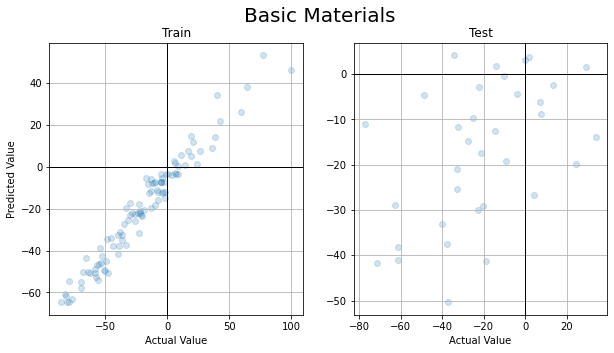

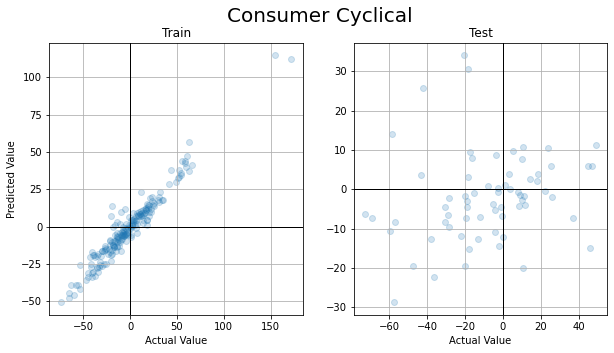

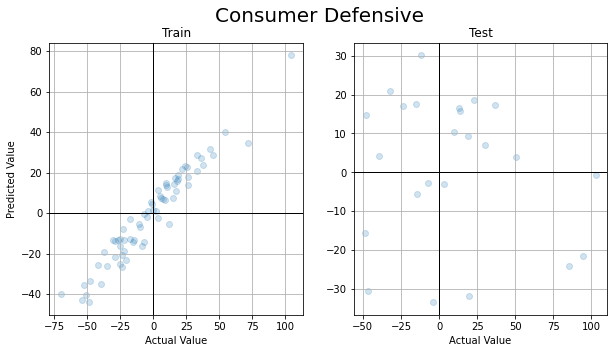

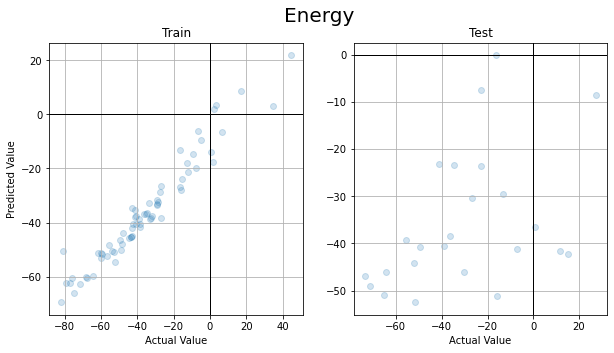

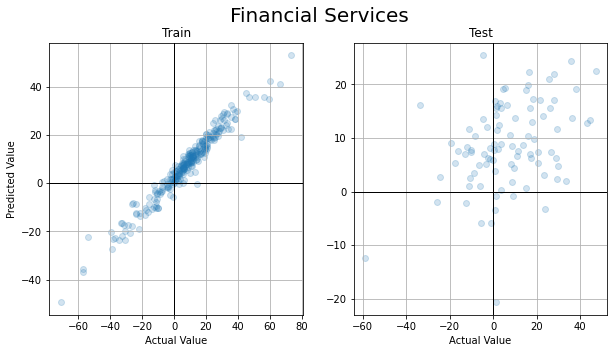

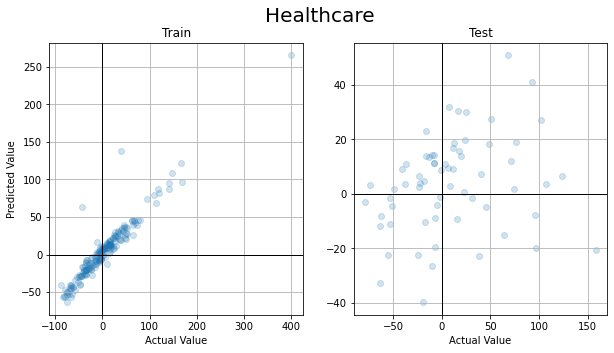

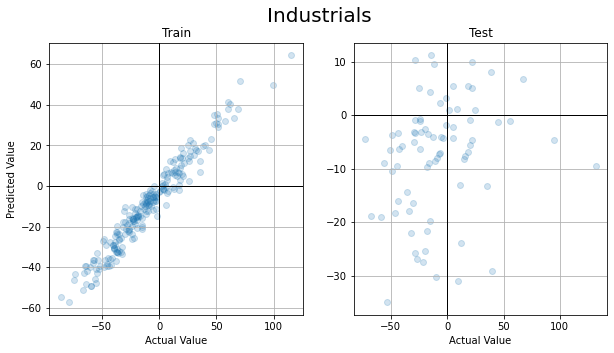

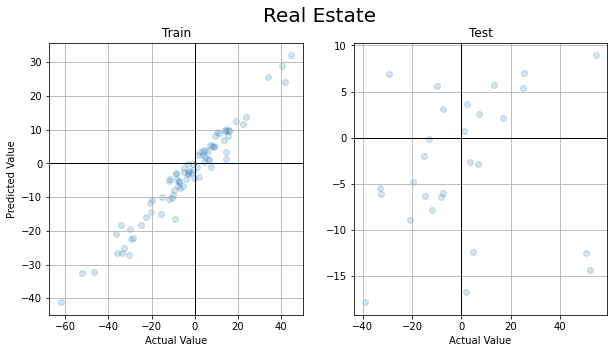

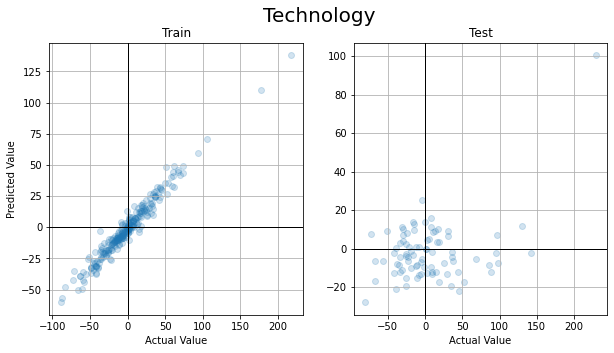

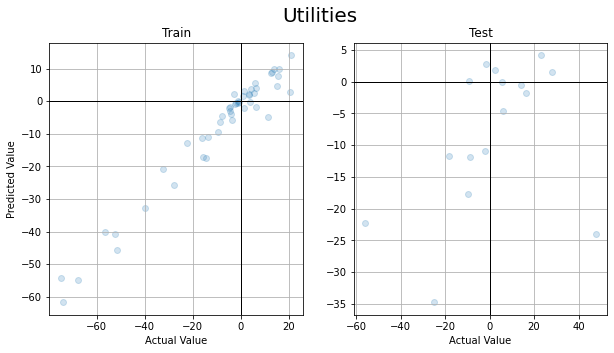

In [68]:
for sector in hot_encoded.columns: 
    sector_RandomForest(sector)

Healthcare
R squared Score for train: 0.8345859665161095
R squared Score for test: 0.0359568157798672
Kfold (average of 10): 0.02278039431619542
[-0.05161155 -0.12510483 -0.03623272  0.01283564  0.07539367  0.04304478
  0.0975432   0.22866741 -0.05268849  0.03595682] 



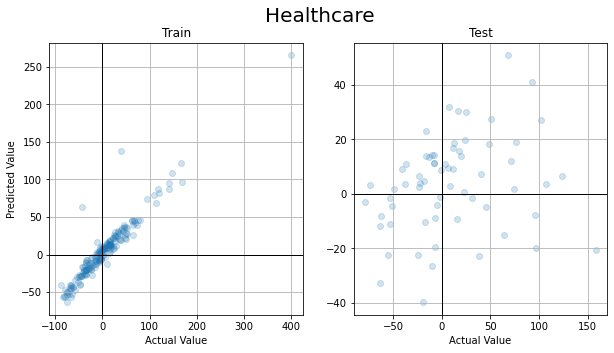

In [69]:
sector_RandomForest('Healthcare', run_KFold=True)

In [70]:
print('Healthcare\n')
percent_made_and_actual()

Healthcare

Shows the averages of the predicted value and the actual value of the top stocks with the highest predicted percent increase

	      Averages
	--------------------
   Top  Predicted     Actual
0    5  36.804121  42.093351
1   10  30.030377  44.700734
2   20  22.581045  29.076001
3   30  18.206232  22.475760
4   40  14.530819  15.447225
5   50  14.194484  15.630239
6  100  14.194484  15.630239


Financial Services
R squared Score for train: 0.8760170460167296
R squared Score for test: 0.1369255265989483
Kfold (average of 10): 0.032877265398103525
[-0.05161155 -0.12510483 -0.03623272  0.01283564  0.07539367  0.04304478
  0.0975432   0.22866741 -0.05268849  0.13692553] 



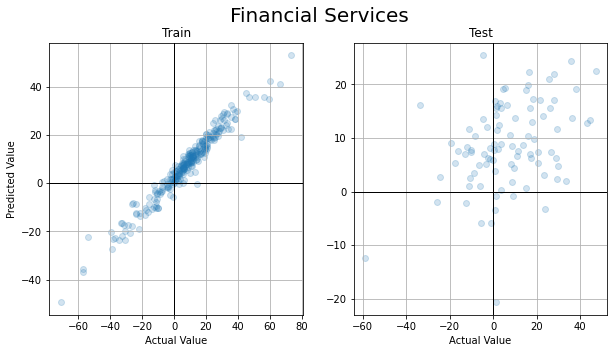

In [71]:
sector_RandomForest('Financial Services', run_KFold=True)

In [72]:
print('Financial Services\n')
percent_made_and_actual()

Financial Services

Shows the averages of the predicted value and the actual value of the top stocks with the highest predicted percent increase

	      Averages
	--------------------
   Top  Predicted     Actual
0    5  23.341942  24.621551
1   10  21.534865  21.293023
2   20  19.151227  14.596621
3   30  17.523380  15.019976
4   40  15.975221  13.711360
5   50  14.456548  10.689958
6  100  10.579804   8.602879


<a id=5></a>
# Report 
- will contain comments on analysis
- produce important statistics to determine the usefulness of analysis
- will contain visualizations for explainations

In [73]:
from sklearn.metrics import r2_score

In [74]:
# can be run on it's own 
def r2_scores(iterations=10, num_top_stocks=[5, 10, 20, 30, 50, 100], pos_X=X, pos_y=y): 
    '''
    Takes in X, y for train_test_split and number of iterations to calcualte r square score. 
    The num_top_stocks is list that indicates what averages are desired for the respective number of stocks.
    Returns dataframes with averages for the num_top_stocks list. 
    Returns the r_scores for each iteration. 
    '''
    r2_list = []
    for i in range(iterations): 

        X_train, X_test, y_train, y_test = train_test_split(pos_X, pos_y, random_state=i)
        regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
        regressor.fit(X_train, y_train)

        y_pred_train = regressor.predict(X_train)
        y_pred_test = regressor.predict(X_test)

        y_test.reset_index(drop=True, inplace=True)
        y_compare = pd.DataFrame(y_pred_test)
        y_compare = y_compare.join(y_test)
        y_compare.rename(columns={0: 'Predicted', 'Percent_Change': 'Actual'}, inplace=True)
        percent_made = y_compare[y_compare['Predicted'] > 0]
        percent_made = percent_made.sort_values(by='Predicted', ascending=False)

        avg_percents = []
        for i in num_top_stocks: 
            avg_percents.append(percent_made.iloc[:i].mean())

        avg_percents = pd.DataFrame(avg_percents)
        df_index = pd.DataFrame(num_top_stocks, columns=['Top'])
        avg_percents= avg_percents.join(df_index)
        avg_percents = avg_percents[['Top', 'Predicted', 'Actual']]
        
        r2_list.append(r2_score(avg_percents.Actual, avg_percents.Predicted))
        
        print(avg_percents, '\n')
    print(r2_list)
    return r2_list

### Comments

First it should be noted that the objective of this analysis is to find stocks to invest in that will produce a profit. This means that it is not necesary for us to predict precisely the price change of all stocks, but just some stocks so that a profitable selection of stocks can be produced. Because of this even though the R sqaured value for the majority of the analyses done indicates that the machine learning model has failed to predict the price of every stock it still has been capable of selecting stocks on the high end that produce a profit. This report will be based on the results produced by the entirety of the dataset because not all of the sectors contain enough datapoints to produce a worthwhile and trustworthy analysis even though the r squared score is better for some of them. 

None
R squared Score for train: 0.8659367215488731
R squared Score for test: 0.11190196377293604


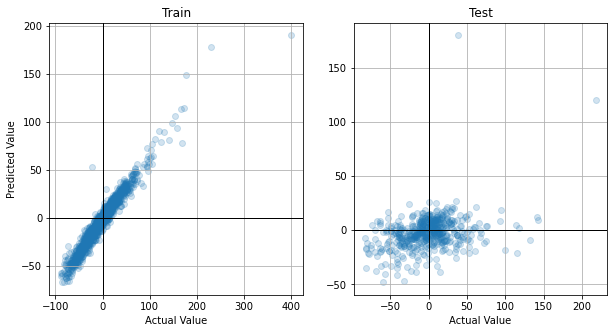

In [75]:
X = df1.drop(['Percent_Change', 'Class', 'Sector', 'Ticker'], axis=1)
y = df1['Percent_Change']

RandomForest_plot(X,y)

As already mentioned the R sqaured score appears to show that the algorithm failed to accurately predict the price percent change any better than the average of the data would. Yet when we look at the stocks that are supposed to produce the highest price percent increase we can see that it appears to have been successful. 

In [76]:
percent_made_and_actual()

Shows the averages of the predicted value and the actual value of the top stocks with the highest predicted percent increase

	      Averages
	--------------------
   Top  Predicted     Actual
0    5  75.906692  60.486081
1   10  48.910599  42.766458
2   20  33.620633  34.327995
3   30  27.610814  23.553321
4   40  24.203589  17.707763
5   50  21.896805  15.807707
6  100  15.859829  14.050545


In [77]:
print('This is the value of the average percent increase of the actual top stocks not the predicted top as seen above.\n')
print('Top\t Average')
for i in [5, 10, 20, 30, 50]:
    average = df.Percent_Change.sort_values(ascending=False)[:i].mean()
    print(i, '\t', average)

This is the value of the average percent increase of the actual top stocks not the predicted top as seen above.

Top	 Average
5 	 239.5602091351428
10 	 199.21482350177038
20 	 163.59124960397378
30 	 143.22935422297763
50 	 119.79171424916426


From this we can see that the top 5 predicted stocks from the alogrithm did not in fact chose the actual top 5 stocks. Even though that is the case the stocks that have been predicted as the top stocks still will produce a profit. It is now important to find out how consistently the algorithm can produce similar results. 

In [78]:
print('This is the R sqaured score produced by the table that shows the predicted and actual averages of the top stocks predicted.')
r2_score(avg_percents.Actual, avg_percents.Predicted)

This is the R sqaured score produced by the table that shows the predicted and actual averages of the top stocks predicted.


0.7868200716140294

Even though this score is still not that high it has much better indications for using the algorithm to find stocks to invest in. 

In [79]:
# The following code calculates the R square score for the printed tables. The scores are shown at the bottom. 
score_list = r2_scores(10)

   Top  Predicted     Actual
0    5  75.906692  60.486081
1   10  48.910599  42.766458
2   20  33.620633  34.327995
3   30  27.610814  23.553321
4   50  21.896805  15.807707
5  100  15.859829  14.050545 

   Top  Predicted     Actual
0    5  38.208383  44.050638
1   10  29.979755  21.391526
2   20  23.256559  22.568780
3   30  20.213515  19.740013
4   50  16.939648  13.864138
5  100  12.771922  12.492489 

   Top  Predicted     Actual
0    5  75.740495  27.994181
1   10  48.050410  29.538273
2   20  33.068503  20.860294
3   30  27.424924  16.168908
4   50  22.097435  16.107848
5  100  16.334803  11.482395 

   Top  Predicted     Actual
0    5  33.114782  -7.115235
1   10  26.778546  -3.551008
2   20  22.489524   9.900326
3   30  20.262928   8.061405
4   50  17.363047  10.388302
5  100  13.676041   7.142105 

   Top  Predicted     Actual
0    5  23.597505   0.831652
1   10  22.211726  17.112640
2   20  20.319960   4.259092
3   30  18.872718  10.607691
4   50  16.809395   8.515007
5  100

From the scores seen it is sometimes a hit or a miss whether algorithm is trained properly based on the training set. Further investigation should be done into stratified sampling so that the model is being trained on appropriate data and there are not holes in the data it is being trained on. It would also be beneficial to try and isolate as many variables as possible to make predictions more accurate. This has already been done for sectors, but more data is needed for a proper analysis for some of the sectors.

In [80]:
num_top = 20
df_predictions = pd.DataFrame(y_compare.Predicted.sort_values(ascending=False)[:num_top])
df_tickers = pd.DataFrame(df1.loc[y_compare.Predicted.sort_values(ascending=False)[:num_top].index, 'Ticker'])
ticker_pred = df_predictions.join(df_tickers)
ticker_pred = ticker_pred[['Ticker', 'Predicted']]

In [81]:
ticker_pred

Ticker   Predicted
467    DVAX  180.252449
3656   LPTH  120.355628
2704    TSC   26.887755
966    MLSS   26.474134
3369   VEEV   25.563496
1270   BBGI   24.123730
3590    TYL   21.963755
2815   HTBI   21.765355
2991   SBBX   21.372090
2583   PNFP   20.347598
3697   RDCM   19.783054
1736    ROL   19.640696
2858   NFBK   19.147838
3344   OLED   18.874032
2889   BWFG   18.338070
2580   KRNY   17.972868
3377   GWRE   17.851129
2791   SBCF   17.708664
3520     WK   17.005235
2935   ESSA   16.985086

In [82]:
ticker_pred.to_csv('stock_list.csv')